In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
gray_images = []
h_images = []
labels = []
path = "../data/scale_10/"
for file in os.listdir(path):
    img = cv.imread(path+file)
    gray_images.append(cv.cvtColor(img, cv.COLOR_BGR2GRAY))
    h_images.append(cv.cvtColor(img, cv.COLOR_BGR2HSV)[:,:,0])
    labels.append(file.split("_")[0])

In [3]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

In [4]:
labels = np.array(labels)
gray_images = np.array(gray_images)/255
flattened_gray = np.array([g.reshape(-1) for g in gray_images])
h_images = np.array(h_images)/255
flattened_h = np.array([h.reshape(-1) for h in h_images])

In [5]:
N_VALIDATION = 264
N_TRAIN = 792
N_TEST = 132
idx = shuffle_along_axis(np.arange(N_VALIDATION+N_TRAIN+N_TEST), 0)

X_train_gray = flattened_gray[idx[:N_TRAIN+N_VALIDATION]]
X_train_h = flattened_h[idx[:N_TRAIN+N_VALIDATION]]
y_train = labels[idx[:N_TRAIN+N_VALIDATION]]

X_test_gray = flattened_gray[idx[N_TRAIN+N_VALIDATION:]]
X_test_h = flattened_h[idx[N_TRAIN+N_VALIDATION:]]
y_test = labels[idx[N_TRAIN+N_VALIDATION:]]


# Model with gray images

In [24]:
model_SVM_gray = SGDClassifier(random_state=0, loss='hinge', max_iter=100, verbose=1, alpha=1, validation_fraction=0.2)

In [25]:
history_gray = model_SVM_gray.fit(X_train_gray, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.991944, T: 1056, Avg. loss: 0.316570
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.992347, T: 2112, Avg. loss: 0.314568
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.993597, T: 3168, Avg. loss: 0.314485
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.993824, T: 4224, Avg. loss: 0.314443
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993813, T: 5280, Avg. loss: 0.314424
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993838, T: 6336, Avg. loss: 0.314416
Total training time: 1.43 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.994150, T: 7392, Avg. loss: 0.314410
Total training time: 1.67 seconds.
Convergence after 7 epochs took 1.67 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.985956, T: 1056, Avg. loss: 0.318787
Total training time: 0.24 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.3s finished


In [26]:
model_SVM_gray.score(X_test_gray, y_test)

0.26515151515151514

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay

[learning_curve] Training set sizes: [ 95 308 522 736 950]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.991402, T: 95, Avg. loss: 0.208693
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158236, Bias: -0.990844, T: 190, Avg. loss: 0.191030
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.990621, T: 285, Avg. loss: 0.190295
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158237, Bias: -0.990543, T: 380, Avg. loss: 0.190030
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.992802, T: 475, Avg. loss: 0.189923
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.992755, T: 570, Avg. loss: 0.189833
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.992732, T: 665, Avg. loss: 0.189749
Total training time: 0.15 seconds.
Convergence after 7 epochs took 0.15 seconds
-- Epoch 1
Norm: 0.04, NNZs: 158237, Bias: -0.978959, T: 95, Avg. loss: 0.235782
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.989050, T: 308, Avg. loss: 0.319093
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.991079, T: 616, Avg. loss: 0.312395
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.990969, T: 924, Avg. loss: 0.312071
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.991784, T: 1232, Avg. loss: 0.311937
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.991749, T: 1540, Avg. loss: 0.311877
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.991777, T: 1848, Avg. loss: 0.311833
Total training time: 0.42 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.992293, T: 2156, Avg. loss: 0.311801
Total training time: 0.49 seconds.
Convergence after 7 epochs took 0.49 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.995385, T: 308, Avg. loss: 0.261101
Total training time: 0.07 seconds.
-- Epoch 2
Norm

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.02, NNZs: 158237, Bias: -0.979056, T: 522, Avg. loss: 0.305920
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.982935, T: 1044, Avg. loss: 0.299176
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.984596, T: 1566, Avg. loss: 0.299038
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.986330, T: 2088, Avg. loss: 0.298958
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.987584, T: 2610, Avg. loss: 0.298926
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.988237, T: 3132, Avg. loss: 0.298904
Total training time: 0.77 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.988519, T: 3654, Avg. loss: 0.298894
Total training time: 0.91 seconds.
Convergence after 7 epochs took 0.91 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.984066, T: 522, Avg. loss: 0.297361
Total training time: 0.15 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.10, NNZs: 158238, Bias: -0.883292, T: 736, Avg. loss: 0.317091
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 0.08, NNZs: 158238, Bias: -0.913813, T: 1472, Avg. loss: 0.309911
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 158238, Bias: -0.927554, T: 2208, Avg. loss: 0.309826
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 158238, Bias: -0.935761, T: 2944, Avg. loss: 0.309771
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 158238, Bias: -0.941829, T: 3680, Avg. loss: 0.309763
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 0.05, NNZs: 158238, Bias: -0.946263, T: 4416, Avg. loss: 0.309751
Total training time: 1.02 seconds.
-- Epoch 7
Norm: 0.05, NNZs: 158238, Bias: -0.949591, T: 5152, Avg. loss: 0.309756
Total training time: 1.20 seconds.
Convergence after 7 epochs took 1.20 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.989176, T: 736, Avg. loss: 0.284696
Total training time: 0.18 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.990198, T: 950, Avg. loss: 0.316415
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.990816, T: 1900, Avg. loss: 0.313876
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.991698, T: 2850, Avg. loss: 0.313775
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992017, T: 3800, Avg. loss: 0.313737
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.992502, T: 4750, Avg. loss: 0.313720
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.992885, T: 5700, Avg. loss: 0.313708
Total training time: 1.29 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993044, T: 6650, Avg. loss: 0.313699
Total training time: 1.50 seconds.
Convergence after 7 epochs took 1.50 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.990161, T: 950, Avg. loss: 0.317813
Total training time: 0.22 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158235, Bias: -0.991453, T: 95, Avg. loss: 0.229245
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.990975, T: 190, Avg. loss: 0.212039
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.990734, T: 285, Avg. loss: 0.211474
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158237, Bias: -0.990608, T: 380, Avg. loss: 0.211150
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.990562, T: 475, Avg. loss: 0.210992
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.992488, T: 570, Avg. loss: 0.210926
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158237, Bias: -0.990961, T: 665, Avg. loss: 0.210817
Total training time: 0.16 seconds.
Convergence after 7 epochs took 0.16 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158234, Bias: -0.962477, T: 95, Avg. loss: 0.320481
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158233, Bias: -0.989501, T: 308, Avg. loss: 0.317998
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.992355, T: 616, Avg. loss: 0.312445
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.993635, T: 924, Avg. loss: 0.312101
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992753, T: 1232, Avg. loss: 0.311955
Total training time: 0.27 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993533, T: 1540, Avg. loss: 0.311872
Total training time: 0.34 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.992966, T: 1848, Avg. loss: 0.311826
Total training time: 0.41 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993491, T: 2156, Avg. loss: 0.311804
Total training time: 0.49 seconds.
Convergence after 7 epochs took 0.49 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.992541, T: 308, Avg. loss: 0.261130
Total training time: 0.06 seconds.
-- Epoch 2
Norm

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.969367, T: 522, Avg. loss: 0.306860
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.975751, T: 1044, Avg. loss: 0.299175
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.978856, T: 1566, Avg. loss: 0.299021
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.981051, T: 2088, Avg. loss: 0.298946
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.982715, T: 2610, Avg. loss: 0.298916
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.983394, T: 3132, Avg. loss: 0.298896
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 0.02, NNZs: 158238, Bias: -0.984570, T: 3654, Avg. loss: 0.298888
Total training time: 0.81 seconds.
Convergence after 7 epochs took 0.81 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.984368, T: 522, Avg. loss: 0.297313
Total training time: 0.12 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.08, NNZs: 158238, Bias: -0.911159, T: 736, Avg. loss: 0.318314
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 158238, Bias: -0.933086, T: 1472, Avg. loss: 0.309915
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 158238, Bias: -0.943729, T: 2208, Avg. loss: 0.309833
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 158238, Bias: -0.950080, T: 2944, Avg. loss: 0.309791
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 158238, Bias: -0.954960, T: 3680, Avg. loss: 0.309776
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 158238, Bias: -0.958402, T: 4416, Avg. loss: 0.309763
Total training time: 1.12 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 158238, Bias: -0.960890, T: 5152, Avg. loss: 0.309756
Total training time: 1.29 seconds.
Convergence after 7 epochs took 1.29 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.989512, T: 736, Avg. loss: 0.284538
Total training time: 0.16 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.988392, T: 950, Avg. loss: 0.316551
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.990042, T: 1900, Avg. loss: 0.313875
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.991320, T: 2850, Avg. loss: 0.313776
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.991605, T: 3800, Avg. loss: 0.313739
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.991868, T: 4750, Avg. loss: 0.313718
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.992461, T: 5700, Avg. loss: 0.313709
Total training time: 1.30 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.992628, T: 6650, Avg. loss: 0.313700
Total training time: 1.52 seconds.
Convergence after 7 epochs took 1.52 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.991930, T: 950, Avg. loss: 0.317361
Total training time: 0.22 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158237, Bias: -0.969348, T: 95, Avg. loss: 0.210344
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978587, T: 190, Avg. loss: 0.190951
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.983081, T: 285, Avg. loss: 0.190279
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.983097, T: 380, Avg. loss: 0.190023
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.985633, T: 475, Avg. loss: 0.189877
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.987347, T: 570, Avg. loss: 0.189796
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985802, T: 665, Avg. loss: 0.189732
Total training time: 0.15 seconds.
Convergence after 7 epochs took 0.15 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.966629, T: 95, Avg. loss: 0.298532
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.989648, T: 308, Avg. loss: 0.318856
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.991062, T: 616, Avg. loss: 0.312399
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.990935, T: 924, Avg. loss: 0.312081
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.991752, T: 1232, Avg. loss: 0.311949
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.991062, T: 1540, Avg. loss: 0.311868
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.991147, T: 1848, Avg. loss: 0.311826
Total training time: 0.43 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.991263, T: 2156, Avg. loss: 0.311808
Total training time: 0.51 seconds.
Convergence after 7 epochs took 0.51 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.992575, T: 308, Avg. loss: 0.260608
Total training time: 0.08 seconds.
-- Epoch 2
Norm

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.04, NNZs: 158238, Bias: -0.956107, T: 522, Avg. loss: 0.307362
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 158238, Bias: -0.966606, T: 1044, Avg. loss: 0.299129
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 158238, Bias: -0.970563, T: 1566, Avg. loss: 0.299003
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.973997, T: 2088, Avg. loss: 0.298940
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.976165, T: 2610, Avg. loss: 0.298896
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.977915, T: 3132, Avg. loss: 0.298892
Total training time: 0.73 seconds.
-- Epoch 7
Norm: 0.02, NNZs: 158238, Bias: -0.979099, T: 3654, Avg. loss: 0.298879
Total training time: 0.85 seconds.
Convergence after 7 epochs took 0.85 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.972694, T: 522, Avg. loss: 0.298010
Total training time: 0.12 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.08, NNZs: 158238, Bias: -0.911071, T: 736, Avg. loss: 0.318638
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 158238, Bias: -0.933193, T: 1472, Avg. loss: 0.309927
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 158238, Bias: -0.943854, T: 2208, Avg. loss: 0.309845
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 158238, Bias: -0.950219, T: 2944, Avg. loss: 0.309788
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 158238, Bias: -0.955089, T: 3680, Avg. loss: 0.309776
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 158238, Bias: -0.958529, T: 4416, Avg. loss: 0.309767
Total training time: 1.11 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 158238, Bias: -0.961012, T: 5152, Avg. loss: 0.309757
Total training time: 1.29 seconds.
Convergence after 7 epochs took 1.29 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.994607, T: 736, Avg. loss: 0.283458
Total training time: 0.17 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.991022, T: 950, Avg. loss: 0.316321
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.991031, T: 1900, Avg. loss: 0.313879
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.991973, T: 2850, Avg. loss: 0.313778
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992309, T: 3800, Avg. loss: 0.313742
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.992792, T: 4750, Avg. loss: 0.313720
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993163, T: 5700, Avg. loss: 0.313709
Total training time: 1.26 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993161, T: 6650, Avg. loss: 0.313699
Total training time: 1.50 seconds.
Convergence after 7 epochs took 1.50 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.990774, T: 950, Avg. loss: 0.317678
Total training time: 0.22 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158237, Bias: -0.969348, T: 95, Avg. loss: 0.210344
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978587, T: 190, Avg. loss: 0.190951
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.983081, T: 285, Avg. loss: 0.190279
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.983097, T: 380, Avg. loss: 0.190023
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.985633, T: 475, Avg. loss: 0.189877
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.987347, T: 570, Avg. loss: 0.189796
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985802, T: 665, Avg. loss: 0.189732
Total training time: 0.15 seconds.
Convergence after 7 epochs took 0.15 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.966629, T: 95, Avg. loss: 0.298532
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Norm: 0.01, NNZs: 158236, Bias: -0.991119, T: 308, Avg. loss: 0.324602
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.990650, T: 616, Avg. loss: 0.318937
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.991992, T: 924, Avg. loss: 0.318590
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.991937, T: 1232, Avg. loss: 0.318438
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.992617, T: 1540, Avg. loss: 0.318383
Total training time: 0.35 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.992589, T: 1848, Avg. loss: 0.318326
Total training time: 0.42 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.992569, T: 2156, Avg. loss: 0.318297
Total training time: 0.50 seconds.
Convergence after 7 epochs took 0.50 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.993442, T: 308, Avg. loss: 0.292123
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.01, NNZ

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.05, NNZs: 158238, Bias: -0.944224, T: 522, Avg. loss: 0.308379
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 158238, Bias: -0.957397, T: 1044, Avg. loss: 0.299134
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 158238, Bias: -0.963690, T: 1566, Avg. loss: 0.298991
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 158238, Bias: -0.967126, T: 2088, Avg. loss: 0.298916
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 0.03, NNZs: 158238, Bias: -0.970605, T: 2610, Avg. loss: 0.298894
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.972043, T: 3132, Avg. loss: 0.298875
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 0.02, NNZs: 158238, Bias: -0.974157, T: 3654, Avg. loss: 0.298876
Total training time: 0.81 seconds.
Convergence after 7 epochs took 0.81 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.988193, T: 522, Avg. loss: 0.297208
Total training time: 0.11 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.08, NNZs: 158238, Bias: -0.906409, T: 736, Avg. loss: 0.318962
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 158238, Bias: -0.931706, T: 1472, Avg. loss: 0.309930
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 158238, Bias: -0.942230, T: 2208, Avg. loss: 0.309822
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 158238, Bias: -0.948939, T: 2944, Avg. loss: 0.309797
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 158238, Bias: -0.953787, T: 3680, Avg. loss: 0.309767
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 158238, Bias: -0.957226, T: 4416, Avg. loss: 0.309757
Total training time: 1.02 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 158238, Bias: -0.959918, T: 5152, Avg. loss: 0.309762
Total training time: 1.19 seconds.
Convergence after 7 epochs took 1.19 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.987306, T: 736, Avg. loss: 0.284718
Total training time: 0.16 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.978006, T: 950, Avg. loss: 0.318331
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.982966, T: 1900, Avg. loss: 0.313858
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.985629, T: 2850, Avg. loss: 0.313765
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.986842, T: 3800, Avg. loss: 0.313730
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.987782, T: 4750, Avg. loss: 0.313705
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.988544, T: 5700, Avg. loss: 0.313698
Total training time: 1.31 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.989024, T: 6650, Avg. loss: 0.313690
Total training time: 1.54 seconds.
Convergence after 7 epochs took 1.54 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.991633, T: 950, Avg. loss: 0.317360
Total training time: 0.22 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158237, Bias: -0.969348, T: 95, Avg. loss: 0.210344
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978587, T: 190, Avg. loss: 0.190951
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.983081, T: 285, Avg. loss: 0.190279
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.983097, T: 380, Avg. loss: 0.190023
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.985633, T: 475, Avg. loss: 0.189877
Total training time: 0.10 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.987347, T: 570, Avg. loss: 0.189796
Total training time: 0.12 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985802, T: 665, Avg. loss: 0.189732
Total training time: 0.14 seconds.
Convergence after 7 epochs took 0.14 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.966629, T: 95, Avg. loss: 0.298532
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.991077, T: 308, Avg. loss: 0.298593
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.992598, T: 616, Avg. loss: 0.292924
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.992466, T: 924, Avg. loss: 0.292571
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992407, T: 1232, Avg. loss: 0.292448
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993115, T: 1540, Avg. loss: 0.292392
Total training time: 0.35 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993090, T: 1848, Avg. loss: 0.292344
Total training time: 0.42 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993076, T: 2156, Avg. loss: 0.292311
Total training time: 0.50 seconds.
Convergence after 7 epochs took 0.50 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.994836, T: 308, Avg. loss: 0.265573
Total training time: 0.07 seconds.
-- Epoch 2
Norm

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.974250, T: 522, Avg. loss: 0.305691
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.979105, T: 1044, Avg. loss: 0.299202
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.982036, T: 1566, Avg. loss: 0.299023
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.983095, T: 2088, Avg. loss: 0.298951
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.984796, T: 2610, Avg. loss: 0.298928
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.985465, T: 3132, Avg. loss: 0.298899
Total training time: 0.73 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.986064, T: 3654, Avg. loss: 0.298894
Total training time: 0.86 seconds.
Convergence after 7 epochs took 0.86 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.988948, T: 522, Avg. loss: 0.297362
Total training time: 0.12 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.08, NNZs: 158238, Bias: -0.910350, T: 736, Avg. loss: 0.318748
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 158238, Bias: -0.933942, T: 1472, Avg. loss: 0.309932
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 158238, Bias: -0.943811, T: 2208, Avg. loss: 0.309827
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 158238, Bias: -0.949436, T: 2944, Avg. loss: 0.309797
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 158238, Bias: -0.954964, T: 3680, Avg. loss: 0.309778
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 158238, Bias: -0.958164, T: 4416, Avg. loss: 0.309763
Total training time: 1.03 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 158238, Bias: -0.960678, T: 5152, Avg. loss: 0.309760
Total training time: 1.20 seconds.
Convergence after 7 epochs took 1.20 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.966682, T: 736, Avg. loss: 0.287738
Total training time: 0.16 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.990598, T: 950, Avg. loss: 0.316021
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.991810, T: 1900, Avg. loss: 0.313887
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.992780, T: 2850, Avg. loss: 0.313784
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992839, T: 3800, Avg. loss: 0.313741
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993337, T: 4750, Avg. loss: 0.313720
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993708, T: 5700, Avg. loss: 0.313707
Total training time: 1.33 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993697, T: 6650, Avg. loss: 0.313703
Total training time: 1.56 seconds.
Convergence after 7 epochs took 1.57 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.992931, T: 950, Avg. loss: 0.317488
Total training time: 0.22 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158237, Bias: -0.969348, T: 95, Avg. loss: 0.210344
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978587, T: 190, Avg. loss: 0.190951
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.983081, T: 285, Avg. loss: 0.190279
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.983097, T: 380, Avg. loss: 0.190023
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.985633, T: 475, Avg. loss: 0.189877
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.987347, T: 570, Avg. loss: 0.189796
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985802, T: 665, Avg. loss: 0.189732
Total training time: 0.15 seconds.
Convergence after 7 epochs took 0.15 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.966629, T: 95, Avg. loss: 0.298532
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Norm: 0.01, NNZs: 158237, Bias: -0.991077, T: 308, Avg. loss: 0.298593
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.992598, T: 616, Avg. loss: 0.292924
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.992466, T: 924, Avg. loss: 0.292571
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992407, T: 1232, Avg. loss: 0.292448
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993115, T: 1540, Avg. loss: 0.292392
Total training time: 0.35 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993090, T: 1848, Avg. loss: 0.292344
Total training time: 0.41 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993076, T: 2156, Avg. loss: 0.292311
Total training time: 0.48 seconds.
Convergence after 7 epochs took 0.48 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.994836, T: 308, Avg. loss: 0.265573
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.01, NNZ

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.971418, T: 522, Avg. loss: 0.332995
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.977969, T: 1044, Avg. loss: 0.326044
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.980281, T: 1566, Avg. loss: 0.325859
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.982011, T: 2088, Avg. loss: 0.325781
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.983361, T: 2610, Avg. loss: 0.325746
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.984772, T: 3132, Avg. loss: 0.325732
Total training time: 0.74 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985361, T: 3654, Avg. loss: 0.325714
Total training time: 0.86 seconds.
Convergence after 7 epochs took 0.86 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.967071, T: 522, Avg. loss: 0.302958
Total training time: 0.13 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.08, NNZs: 158238, Bias: -0.910196, T: 736, Avg. loss: 0.318653
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 158238, Bias: -0.933749, T: 1472, Avg. loss: 0.309936
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 158238, Bias: -0.944073, T: 2208, Avg. loss: 0.309829
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 158238, Bias: -0.949248, T: 2944, Avg. loss: 0.309782
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 158238, Bias: -0.954772, T: 3680, Avg. loss: 0.309772
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 158238, Bias: -0.957972, T: 4416, Avg. loss: 0.309758
Total training time: 1.07 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 158238, Bias: -0.960487, T: 5152, Avg. loss: 0.309755
Total training time: 1.24 seconds.
Convergence after 7 epochs took 1.24 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.967827, T: 736, Avg. loss: 0.287265
Total training time: 0.18 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.988416, T: 950, Avg. loss: 0.316538
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.990096, T: 1900, Avg. loss: 0.313881
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.991400, T: 2850, Avg. loss: 0.313777
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.991416, T: 3800, Avg. loss: 0.313737
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.992142, T: 4750, Avg. loss: 0.313717
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.992332, T: 5700, Avg. loss: 0.313706
Total training time: 1.35 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.992507, T: 6650, Avg. loss: 0.313699
Total training time: 1.64 seconds.
Convergence after 7 epochs took 1.64 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.993727, T: 950, Avg. loss: 0.317219
Total training time: 0.22 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158237, Bias: -0.969348, T: 95, Avg. loss: 0.210344
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978587, T: 190, Avg. loss: 0.190951
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.983081, T: 285, Avg. loss: 0.190279
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.983097, T: 380, Avg. loss: 0.190023
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.985633, T: 475, Avg. loss: 0.189877
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.987347, T: 570, Avg. loss: 0.189796
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985802, T: 665, Avg. loss: 0.189732
Total training time: 0.15 seconds.
Convergence after 7 epochs took 0.15 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.966629, T: 95, Avg. loss: 0.298532
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.991077, T: 308, Avg. loss: 0.298593
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.992598, T: 616, Avg. loss: 0.292924
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.992466, T: 924, Avg. loss: 0.292571
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992407, T: 1232, Avg. loss: 0.292448
Total training time: 0.27 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993115, T: 1540, Avg. loss: 0.292392
Total training time: 0.34 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993090, T: 1848, Avg. loss: 0.292344
Total training time: 0.41 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993076, T: 2156, Avg. loss: 0.292311
Total training time: 0.48 seconds.
Convergence after 7 epochs took 0.48 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.994836, T: 308, Avg. loss: 0.265573
Total training time: 0.07 seconds.
-- Epoch 2
Norm

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.971624, T: 522, Avg. loss: 0.329083
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978139, T: 1044, Avg. loss: 0.322214
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.980443, T: 1566, Avg. loss: 0.322024
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.982172, T: 2088, Avg. loss: 0.321945
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.983502, T: 2610, Avg. loss: 0.321909
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.984576, T: 3132, Avg. loss: 0.321892
Total training time: 0.72 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985191, T: 3654, Avg. loss: 0.321884
Total training time: 0.84 seconds.
Convergence after 7 epochs took 0.84 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.966815, T: 522, Avg. loss: 0.299277
Total training time: 0.12 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.985378, T: 736, Avg. loss: 0.316816
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.987865, T: 1472, Avg. loss: 0.312742
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.988871, T: 2208, Avg. loss: 0.312627
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.989297, T: 2944, Avg. loss: 0.312574
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.990234, T: 3680, Avg. loss: 0.312550
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.990718, T: 4416, Avg. loss: 0.312532
Total training time: 0.99 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.990930, T: 5152, Avg. loss: 0.312528
Total training time: 1.15 seconds.
Convergence after 7 epochs took 1.15 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.967189, T: 736, Avg. loss: 0.290022
Total training time: 0.16 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.989686, T: 950, Avg. loss: 0.318444
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.991985, T: 1900, Avg. loss: 0.315994
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.992346, T: 2850, Avg. loss: 0.315883
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992376, T: 3800, Avg. loss: 0.315849
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993109, T: 4750, Avg. loss: 0.315829
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993469, T: 5700, Avg. loss: 0.315817
Total training time: 1.27 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993307, T: 6650, Avg. loss: 0.315807
Total training time: 1.48 seconds.
Convergence after 7 epochs took 1.48 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.994801, T: 950, Avg. loss: 0.318857
Total training time: 0.21 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158237, Bias: -0.969348, T: 95, Avg. loss: 0.210344
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978587, T: 190, Avg. loss: 0.190951
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.983081, T: 285, Avg. loss: 0.190279
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.983097, T: 380, Avg. loss: 0.190023
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.985633, T: 475, Avg. loss: 0.189877
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.987347, T: 570, Avg. loss: 0.189796
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985802, T: 665, Avg. loss: 0.189732
Total training time: 0.15 seconds.
Convergence after 7 epochs took 0.15 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.966629, T: 95, Avg. loss: 0.298532
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.991077, T: 308, Avg. loss: 0.298593
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.992598, T: 616, Avg. loss: 0.292924
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.992466, T: 924, Avg. loss: 0.292571
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992407, T: 1232, Avg. loss: 0.292448
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993115, T: 1540, Avg. loss: 0.292392
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993090, T: 1848, Avg. loss: 0.292344
Total training time: 0.43 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993076, T: 2156, Avg. loss: 0.292311
Total training time: 0.50 seconds.
Convergence after 7 epochs took 0.50 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.994836, T: 308, Avg. loss: 0.265573
Total training time: 0.06 seconds.
-- Epoch 2
Norm

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.971624, T: 522, Avg. loss: 0.329083
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978139, T: 1044, Avg. loss: 0.322214
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.980443, T: 1566, Avg. loss: 0.322024
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.982172, T: 2088, Avg. loss: 0.321945
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.983502, T: 2610, Avg. loss: 0.321909
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.984576, T: 3132, Avg. loss: 0.321892
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985191, T: 3654, Avg. loss: 0.321884
Total training time: 0.83 seconds.
Convergence after 7 epochs took 0.83 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.966815, T: 522, Avg. loss: 0.299277
Total training time: 0.14 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.988071, T: 736, Avg. loss: 0.316256
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.989843, T: 1472, Avg. loss: 0.312752
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.990857, T: 2208, Avg. loss: 0.312629
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.990864, T: 2944, Avg. loss: 0.312577
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.991774, T: 3680, Avg. loss: 0.312553
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.991996, T: 4416, Avg. loss: 0.312536
Total training time: 0.99 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.992001, T: 5152, Avg. loss: 0.312526
Total training time: 1.15 seconds.
Convergence after 7 epochs took 1.15 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.967513, T: 736, Avg. loss: 0.322748
Total training time: 0.17 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.991065, T: 950, Avg. loss: 0.318262
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.992838, T: 1900, Avg. loss: 0.316002
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.993262, T: 2850, Avg. loss: 0.315887
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.993296, T: 3800, Avg. loss: 0.315850
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993779, T: 4750, Avg. loss: 0.315829
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993959, T: 5700, Avg. loss: 0.315819
Total training time: 1.46 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993963, T: 6650, Avg. loss: 0.315808
Total training time: 1.72 seconds.
Convergence after 7 epochs took 1.72 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.990080, T: 950, Avg. loss: 0.319225
Total training time: 0.27 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158237, Bias: -0.969348, T: 95, Avg. loss: 0.210344
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978587, T: 190, Avg. loss: 0.190951
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.983081, T: 285, Avg. loss: 0.190279
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.983097, T: 380, Avg. loss: 0.190023
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.985633, T: 475, Avg. loss: 0.189877
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.987347, T: 570, Avg. loss: 0.189796
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985802, T: 665, Avg. loss: 0.189732
Total training time: 0.16 seconds.
Convergence after 7 epochs took 0.16 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.966629, T: 95, Avg. loss: 0.298532
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.991077, T: 308, Avg. loss: 0.298593
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.992598, T: 616, Avg. loss: 0.292924
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.992466, T: 924, Avg. loss: 0.292571
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992407, T: 1232, Avg. loss: 0.292448
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993115, T: 1540, Avg. loss: 0.292392
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993090, T: 1848, Avg. loss: 0.292344
Total training time: 0.46 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993076, T: 2156, Avg. loss: 0.292311
Total training time: 0.54 seconds.
Convergence after 7 epochs took 0.54 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.994836, T: 308, Avg. loss: 0.265573
Total training time: 0.07 seconds.
-- Epoch 2
Norm

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.971624, T: 522, Avg. loss: 0.329083
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978139, T: 1044, Avg. loss: 0.322214
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.980443, T: 1566, Avg. loss: 0.322024
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.982172, T: 2088, Avg. loss: 0.321945
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.983502, T: 2610, Avg. loss: 0.321909
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.984576, T: 3132, Avg. loss: 0.321892
Total training time: 0.84 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985191, T: 3654, Avg. loss: 0.321884
Total training time: 0.98 seconds.
Convergence after 7 epochs took 0.98 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.966815, T: 522, Avg. loss: 0.299277
Total training time: 0.15 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.988976, T: 736, Avg. loss: 0.305331
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.990604, T: 1472, Avg. loss: 0.301882
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.991100, T: 2208, Avg. loss: 0.301761
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.991538, T: 2944, Avg. loss: 0.301710
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.992151, T: 3680, Avg. loss: 0.301685
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.992391, T: 4416, Avg. loss: 0.301666
Total training time: 1.17 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.992607, T: 5152, Avg. loss: 0.301660
Total training time: 1.36 seconds.
Convergence after 7 epochs took 1.36 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.968115, T: 736, Avg. loss: 0.309060
Total training time: 0.23 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.986606, T: 950, Avg. loss: 0.318629
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.989740, T: 1900, Avg. loss: 0.315985
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.990581, T: 2850, Avg. loss: 0.315874
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.990918, T: 3800, Avg. loss: 0.315842
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.991647, T: 4750, Avg. loss: 0.315821
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.992025, T: 5700, Avg. loss: 0.315812
Total training time: 1.46 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.992195, T: 6650, Avg. loss: 0.315805
Total training time: 1.71 seconds.
Convergence after 7 epochs took 1.71 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.991165, T: 950, Avg. loss: 0.319188
Total training time: 0.25 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158237, Bias: -0.969348, T: 95, Avg. loss: 0.210344
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978587, T: 190, Avg. loss: 0.190951
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.983081, T: 285, Avg. loss: 0.190279
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.983097, T: 380, Avg. loss: 0.190023
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.985633, T: 475, Avg. loss: 0.189877
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 158238, Bias: -0.987347, T: 570, Avg. loss: 0.189796
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985802, T: 665, Avg. loss: 0.189732
Total training time: 0.15 seconds.
Convergence after 7 epochs took 0.15 seconds
-- Epoch 1
Norm: 0.02, NNZs: 158238, Bias: -0.966629, T: 95, Avg. loss: 0.298532
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.991077, T: 308, Avg. loss: 0.298593
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.992598, T: 616, Avg. loss: 0.292924
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.992466, T: 924, Avg. loss: 0.292571
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.992407, T: 1232, Avg. loss: 0.292448
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993115, T: 1540, Avg. loss: 0.292392
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993090, T: 1848, Avg. loss: 0.292344
Total training time: 0.44 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.993076, T: 2156, Avg. loss: 0.292311
Total training time: 0.51 seconds.
Convergence after 7 epochs took 0.51 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.994836, T: 308, Avg. loss: 0.265573
Total training time: 0.07 seconds.
-- Epoch 2
Norm

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.971624, T: 522, Avg. loss: 0.329083
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 158238, Bias: -0.978139, T: 1044, Avg. loss: 0.322214
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 158238, Bias: -0.980443, T: 1566, Avg. loss: 0.322024
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 158238, Bias: -0.982172, T: 2088, Avg. loss: 0.321945
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 158238, Bias: -0.983502, T: 2610, Avg. loss: 0.321909
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.984576, T: 3132, Avg. loss: 0.321892
Total training time: 0.78 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.985191, T: 3654, Avg. loss: 0.321884
Total training time: 0.90 seconds.
Convergence after 7 epochs took 0.90 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.966815, T: 522, Avg. loss: 0.299277
Total training time: 0.12 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.988976, T: 736, Avg. loss: 0.305331
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.990604, T: 1472, Avg. loss: 0.301882
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.991100, T: 2208, Avg. loss: 0.301761
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.991538, T: 2944, Avg. loss: 0.301710
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.992151, T: 3680, Avg. loss: 0.301685
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.992391, T: 4416, Avg. loss: 0.301666
Total training time: 1.18 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.992607, T: 5152, Avg. loss: 0.301660
Total training time: 1.36 seconds.
Convergence after 7 epochs took 1.36 seconds
-- Epoch 1
Norm: 0.03, NNZs: 158238, Bias: -0.968115, T: 736, Avg. loss: 0.309060
Total training time: 0.19 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 158238, Bias: -0.991414, T: 950, Avg. loss: 0.318155
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 158238, Bias: -0.993117, T: 1900, Avg. loss: 0.316001
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 158238, Bias: -0.993523, T: 2850, Avg. loss: 0.315887
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 158238, Bias: -0.993509, T: 3800, Avg. loss: 0.315845
Total training time: 1.05 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 158238, Bias: -0.993752, T: 4750, Avg. loss: 0.315828
Total training time: 1.32 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 158238, Bias: -0.993938, T: 5700, Avg. loss: 0.315817
Total training time: 1.57 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 158238, Bias: -0.994097, T: 6650, Avg. loss: 0.315809
Total training time: 1.80 seconds.
Convergence after 7 epochs took 1.80 seconds
-- Epoch 1
Norm: 0.01, NNZs: 158237, Bias: -0.991687, T: 950, Avg. loss: 0.319224
Total training time: 0.23 seconds.
-- Epoch 2
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.9min finished


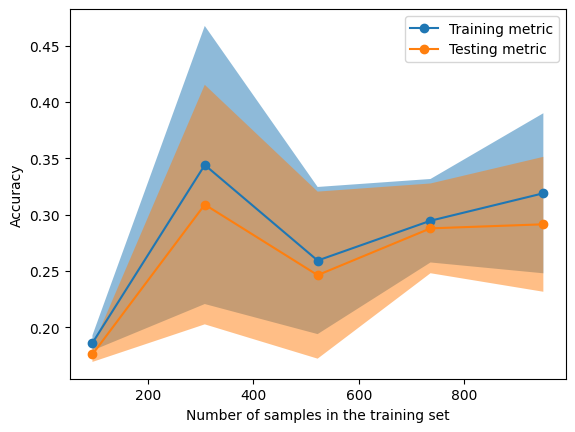

In [29]:
display = LearningCurveDisplay.from_estimator(model_SVM_gray, X_train_gray, y_train,
                                              verbose=1, random_state=0, score_name="Accuracy",
                                              score_type="both", line_kw={"marker": "o"}, 
                                              std_display_style="fill_between", cv=10)

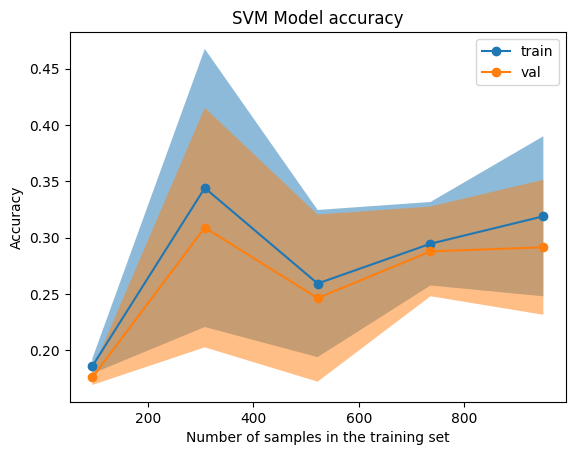

In [30]:
fig, ax = plt.subplots()
lc = LearningCurveDisplay(train_sizes=display.train_sizes, train_scores=display.train_scores,
                    test_scores=display.test_scores, score_name="Accuracy")
lc.plot(score_type="both", line_kw={"marker": "o"}, std_display_style="fill_between", ax=ax)
ax.legend(["train","val"])
ax.set_title("SVM Model accuracy with gray images")
fig.savefig("SVM_gray_accuracy.png")

# Model with hue images

In [6]:
model_SVM_hue = SGDClassifier(random_state=0, loss='hinge', max_iter=250, verbose=1, alpha=1, validation_fraction=0.2)

In [7]:
history_hue = model_SVM_hue.fit(X_train_h, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.58, NNZs: 158219, Bias: -0.930389, T: 1056, Avg. loss: 2.550754
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 0.49, NNZs: 158236, Bias: -0.926679, T: 2112, Avg. loss: 0.439904
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 0.44, NNZs: 158235, Bias: -0.924922, T: 3168, Avg. loss: 0.366550
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 0.43, NNZs: 158236, Bias: -0.923618, T: 4224, Avg. loss: 0.324594
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 0.41, NNZs: 158236, Bias: -0.922185, T: 5280, Avg. loss: 0.293570
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 0.41, NNZs: 158238, Bias: -0.921859, T: 6336, Avg. loss: 0.282949
Total training time: 1.26 seconds.
-- Epoch 7
Norm: 0.40, NNZs: 158236, Bias: -0.920975, T: 7392, Avg. loss: 0.270932
Total training time: 1.46 seconds.
-- Epoch 8
Norm: 0.40, NNZs: 158238, Bias: -0.920352, T: 8448, Avg. loss: 0.261649
Total training time: 1.67 seconds.
-- Epoch 9
Norm: 0.40, NNZs: 158238, Bias: -0.919687, T:

Norm: 0.30, NNZs: 158238, Bias: -0.844533, T: 27456, Avg. loss: 0.260285
Total training time: 5.95 seconds.
-- Epoch 27
Norm: 0.30, NNZs: 158238, Bias: -0.844536, T: 28512, Avg. loss: 0.261342
Total training time: 6.16 seconds.
-- Epoch 28
Norm: 0.30, NNZs: 158238, Bias: -0.844538, T: 29568, Avg. loss: 0.260792
Total training time: 6.37 seconds.
-- Epoch 29
Norm: 0.30, NNZs: 158238, Bias: -0.844539, T: 30624, Avg. loss: 0.260901
Total training time: 6.59 seconds.
-- Epoch 30
Norm: 0.30, NNZs: 158238, Bias: -0.844475, T: 31680, Avg. loss: 0.257188
Total training time: 6.80 seconds.
-- Epoch 31
Norm: 0.30, NNZs: 158238, Bias: -0.844475, T: 32736, Avg. loss: 0.257717
Total training time: 7.03 seconds.
-- Epoch 32
Norm: 0.30, NNZs: 158238, Bias: -0.844445, T: 33792, Avg. loss: 0.257652
Total training time: 7.24 seconds.
-- Epoch 33
Norm: 0.30, NNZs: 158238, Bias: -0.844445, T: 34848, Avg. loss: 0.255961
Total training time: 7.45 seconds.
-- Epoch 34
Norm: 0.30, NNZs: 158238, Bias: -0.84441

Norm: 0.38, NNZs: 158238, Bias: -0.971816, T: 19008, Avg. loss: 0.226638
Total training time: 3.92 seconds.
-- Epoch 19
Norm: 0.37, NNZs: 158238, Bias: -0.971967, T: 20064, Avg. loss: 0.233831
Total training time: 4.14 seconds.
-- Epoch 20
Norm: 0.37, NNZs: 158238, Bias: -0.971967, T: 21120, Avg. loss: 0.228086
Total training time: 4.35 seconds.
-- Epoch 21
Norm: 0.37, NNZs: 158238, Bias: -0.972107, T: 22176, Avg. loss: 0.229919
Total training time: 4.56 seconds.
-- Epoch 22
Norm: 0.37, NNZs: 158238, Bias: -0.972239, T: 23232, Avg. loss: 0.228556
Total training time: 4.77 seconds.
-- Epoch 23
Norm: 0.37, NNZs: 158238, Bias: -0.972406, T: 24288, Avg. loss: 0.223029
Total training time: 4.98 seconds.
-- Epoch 24
Norm: 0.37, NNZs: 158238, Bias: -0.972524, T: 25344, Avg. loss: 0.224580
Total training time: 5.20 seconds.
-- Epoch 25
Norm: 0.37, NNZs: 158238, Bias: -0.972562, T: 26400, Avg. loss: 0.225540
Total training time: 5.44 seconds.
-- Epoch 26
Norm: 0.37, NNZs: 158238, Bias: -0.97259

Norm: 0.36, NNZs: 158238, Bias: -0.820758, T: 10560, Avg. loss: 0.280477
Total training time: 2.25 seconds.
-- Epoch 11
Norm: 0.35, NNZs: 158238, Bias: -0.821290, T: 11616, Avg. loss: 0.282632
Total training time: 2.50 seconds.
-- Epoch 12
Norm: 0.35, NNZs: 158238, Bias: -0.821786, T: 12672, Avg. loss: 0.274325
Total training time: 2.71 seconds.
-- Epoch 13
Norm: 0.35, NNZs: 158238, Bias: -0.822465, T: 13728, Avg. loss: 0.268872
Total training time: 2.92 seconds.
-- Epoch 14
Norm: 0.35, NNZs: 158238, Bias: -0.822950, T: 14784, Avg. loss: 0.267752
Total training time: 3.13 seconds.
-- Epoch 15
Norm: 0.35, NNZs: 158238, Bias: -0.823338, T: 15840, Avg. loss: 0.267104
Total training time: 3.35 seconds.
-- Epoch 16
Norm: 0.35, NNZs: 158238, Bias: -0.823763, T: 16896, Avg. loss: 0.258346
Total training time: 3.58 seconds.
-- Epoch 17
Norm: 0.34, NNZs: 158238, Bias: -0.824162, T: 17952, Avg. loss: 0.258904
Total training time: 3.80 seconds.
-- Epoch 18
Norm: 0.34, NNZs: 158238, Bias: -0.82443

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   52.4s finished


In [10]:
model_SVM_hue.score(X_train_h, y_train)

0.9147727272727273

In [ ]:
model_SVM_hue.score(X_val_h, y_test)

In [8]:
model_SVM_hue.score(X_test_h, y_test)

0.5303030303030303

[learning_curve] Training set sizes: [ 95 308 522 736 950]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.75, NNZs: 158139, Bias: 0.530726, T: 95, Avg. loss: 56.502153
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 158174, Bias: 0.534315, T: 190, Avg. loss: 2.049346
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.81, NNZs: 158143, Bias: 0.539181, T: 285, Avg. loss: 0.545231
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.87, NNZs: 158196, Bias: 0.542026, T: 380, Avg. loss: 1.072446
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.81, NNZs: 158185, Bias: 0.541793, T: 475, Avg. loss: 0.486711
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 0.75, NNZs: 158169, Bias: 0.541750, T: 570, Avg. loss: 0.310975
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.78, NNZs: 158210, Bias: 0.543329, T: 665, Avg. loss: 0.420294
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 158207, Bias: 0.543263, T: 760, Avg. loss: 0.277504
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 158200, Bias: 0.543255, T: 855, Avg. loss: 

Norm: 0.72, NNZs: 158236, Bias: -0.706959, T: 1140, Avg. loss: 0.168033
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 0.68, NNZs: 158228, Bias: -0.706090, T: 1235, Avg. loss: 0.082410
Total training time: 0.29 seconds.
-- Epoch 14
Norm: 0.68, NNZs: 158236, Bias: -0.706873, T: 1330, Avg. loss: 0.173908
Total training time: 0.31 seconds.
-- Epoch 15
Norm: 0.66, NNZs: 158233, Bias: -0.706873, T: 1425, Avg. loss: 0.168309
Total training time: 0.33 seconds.
-- Epoch 16
Norm: 0.66, NNZs: 158233, Bias: -0.707568, T: 1520, Avg. loss: 0.155279
Total training time: 0.35 seconds.
-- Epoch 17
Norm: 0.63, NNZs: 158236, Bias: -0.707570, T: 1615, Avg. loss: 0.071588
Total training time: 0.37 seconds.
-- Epoch 18
Norm: 0.61, NNZs: 158237, Bias: -0.707577, T: 1710, Avg. loss: 0.066004
Total training time: 0.39 seconds.
-- Epoch 19
Norm: 0.60, NNZs: 158236, Bias: -0.708151, T: 1805, Avg. loss: 0.088628
Total training time: 0.41 seconds.
-- Epoch 20
Norm: 0.58, NNZs: 158236, Bias: -0.708149, T: 19

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.98, NNZs: 158224, Bias: -0.883117, T: 308, Avg. loss: 8.043694
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 158226, Bias: -0.878686, T: 616, Avg. loss: 1.148095
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.73, NNZs: 158236, Bias: -0.873791, T: 924, Avg. loss: 0.661576
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 0.68, NNZs: 158231, Bias: -0.875691, T: 1232, Avg. loss: 0.410906
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 0.64, NNZs: 158235, Bias: -0.873394, T: 1540, Avg. loss: 0.300110
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 0.62, NNZs: 158238, Bias: -0.872204, T: 1848, Avg. loss: 0.289374
Total training time: 0.55 seconds.
-- Epoch 7
Norm: 0.59, NNZs: 158232, Bias: -0.872179, T: 2156, Avg. loss: 0.229889
Total training time: 0.64 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 158233, Bias: -0.871721, T: 2464, Avg. loss: 0.201377
Total training time: 0.73 seconds.
-- Epoch 9
Norm: 0.56, NNZs: 158235, Bias: -0.871325, T: 27

Norm: 0.50, NNZs: 158238, Bias: -0.749906, T: 5852, Avg. loss: 0.113311
Total training time: 1.36 seconds.
-- Epoch 20
Norm: 0.50, NNZs: 158238, Bias: -0.749408, T: 6160, Avg. loss: 0.116308
Total training time: 1.43 seconds.
-- Epoch 21
Norm: 0.50, NNZs: 158236, Bias: -0.748934, T: 6468, Avg. loss: 0.111342
Total training time: 1.51 seconds.
-- Epoch 22
Norm: 0.50, NNZs: 158238, Bias: -0.748483, T: 6776, Avg. loss: 0.108269
Total training time: 1.58 seconds.
-- Epoch 23
Norm: 0.50, NNZs: 158238, Bias: -0.748052, T: 7084, Avg. loss: 0.103445
Total training time: 1.65 seconds.
-- Epoch 24
Norm: 0.50, NNZs: 158237, Bias: -0.747778, T: 7392, Avg. loss: 0.108156
Total training time: 1.72 seconds.
-- Epoch 25
Norm: 0.50, NNZs: 158238, Bias: -0.747383, T: 7700, Avg. loss: 0.098211
Total training time: 1.79 seconds.
-- Epoch 26
Norm: 0.50, NNZs: 158238, Bias: -0.747131, T: 8008, Avg. loss: 0.087301
Total training time: 1.86 seconds.
-- Epoch 27
Norm: 0.50, NNZs: 158238, Bias: -0.746767, T: 83

Norm: 0.45, NNZs: 158238, Bias: 0.190556, T: 7392, Avg. loss: 0.096501
Total training time: 1.87 seconds.
-- Epoch 25
Norm: 0.45, NNZs: 158238, Bias: 0.190421, T: 7700, Avg. loss: 0.113072
Total training time: 1.95 seconds.
-- Epoch 26
Norm: 0.45, NNZs: 158238, Bias: 0.190294, T: 8008, Avg. loss: 0.097726
Total training time: 2.03 seconds.
-- Epoch 27
Norm: 0.45, NNZs: 158238, Bias: 0.190414, T: 8316, Avg. loss: 0.100088
Total training time: 2.11 seconds.
-- Epoch 28
Norm: 0.45, NNZs: 158238, Bias: 0.190290, T: 8624, Avg. loss: 0.102480
Total training time: 2.20 seconds.
-- Epoch 29
Norm: 0.45, NNZs: 158238, Bias: 0.189948, T: 8932, Avg. loss: 0.093905
Total training time: 2.29 seconds.
-- Epoch 30
Norm: 0.45, NNZs: 158238, Bias: 0.190058, T: 9240, Avg. loss: 0.097535
Total training time: 2.38 seconds.
-- Epoch 31
Norm: 0.45, NNZs: 158238, Bias: 0.189948, T: 9548, Avg. loss: 0.089652
Total training time: 2.46 seconds.
-- Epoch 32
Norm: 0.45, NNZs: 158238, Bias: 0.189844, T: 9856, Avg. 

Norm: 0.50, NNZs: 158237, Bias: -0.962252, T: 3388, Avg. loss: 0.241264
Total training time: 0.90 seconds.
-- Epoch 12
Norm: 0.49, NNZs: 158238, Bias: -0.962821, T: 3696, Avg. loss: 0.236276
Total training time: 0.98 seconds.
-- Epoch 13
Norm: 0.49, NNZs: 158238, Bias: -0.963091, T: 4004, Avg. loss: 0.206471
Total training time: 1.06 seconds.
-- Epoch 14
Norm: 0.49, NNZs: 158238, Bias: -0.963348, T: 4312, Avg. loss: 0.200478
Total training time: 1.14 seconds.
-- Epoch 15
Norm: 0.49, NNZs: 158238, Bias: -0.963813, T: 4620, Avg. loss: 0.199871
Total training time: 1.21 seconds.
-- Epoch 16
Norm: 0.49, NNZs: 158238, Bias: -0.964236, T: 4928, Avg. loss: 0.182993
Total training time: 1.30 seconds.
-- Epoch 17
Norm: 0.48, NNZs: 158238, Bias: -0.964635, T: 5236, Avg. loss: 0.187356
Total training time: 1.38 seconds.
-- Epoch 18
Norm: 0.48, NNZs: 158238, Bias: -0.964822, T: 5544, Avg. loss: 0.156418
Total training time: 1.46 seconds.
-- Epoch 19
Norm: 0.48, NNZs: 158238, Bias: -0.965002, T: 58

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.81, NNZs: 158204, Bias: -0.452524, T: 522, Avg. loss: 11.802372
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 0.66, NNZs: 158215, Bias: -0.450307, T: 1044, Avg. loss: 0.662744
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 158231, Bias: -0.447974, T: 1566, Avg. loss: 0.417876
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 158231, Bias: -0.446829, T: 2088, Avg. loss: 0.322234
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 0.53, NNZs: 158237, Bias: -0.445558, T: 2610, Avg. loss: 0.291527
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 158236, Bias: -0.444550, T: 3132, Avg. loss: 0.269233
Total training time: 0.92 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 158238, Bias: -0.443940, T: 3654, Avg. loss: 0.231385
Total training time: 1.06 seconds.
-- Epoch 8
Norm: 0.51, NNZs: 158237, Bias: -0.443172, T: 4176, Avg. loss: 0.230529
Total training time: 1.22 seconds.
-- Epoch 9
Norm: 0.50, NNZs: 158238, Bias: -0.442712, T:

Norm: 0.40, NNZs: 158238, Bias: 0.575007, T: 13572, Avg. loss: 0.168558
Total training time: 3.41 seconds.
-- Epoch 27
Norm: 0.40, NNZs: 158238, Bias: 0.575082, T: 14094, Avg. loss: 0.167258
Total training time: 3.54 seconds.
Convergence after 27 epochs took 3.54 seconds
-- Epoch 1
Norm: 0.62, NNZs: 158229, Bias: -0.916069, T: 522, Avg. loss: 3.246436
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.53, NNZs: 158237, Bias: -0.908313, T: 1044, Avg. loss: 0.799193
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 158238, Bias: -0.904567, T: 1566, Avg. loss: 0.473289
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 0.49, NNZs: 158238, Bias: -0.901798, T: 2088, Avg. loss: 0.385424
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 0.48, NNZs: 158237, Bias: -0.898844, T: 2610, Avg. loss: 0.347366
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 0.47, NNZs: 158238, Bias: -0.897792, T: 3132, Avg. loss: 0.301599
Total training time: 0.78 seconds.
-- Epoch 7
Norm: 0.46

Norm: 0.44, NNZs: 158238, Bias: -0.946477, T: 9918, Avg. loss: 0.176200
Total training time: 2.34 seconds.
-- Epoch 20
Norm: 0.44, NNZs: 158238, Bias: -0.946677, T: 10440, Avg. loss: 0.173998
Total training time: 2.47 seconds.
-- Epoch 21
Norm: 0.44, NNZs: 158238, Bias: -0.946863, T: 10962, Avg. loss: 0.168527
Total training time: 2.59 seconds.
-- Epoch 22
Norm: 0.44, NNZs: 158238, Bias: -0.946947, T: 11484, Avg. loss: 0.166794
Total training time: 2.72 seconds.
-- Epoch 23
Norm: 0.44, NNZs: 158238, Bias: -0.946946, T: 12006, Avg. loss: 0.168093
Total training time: 2.85 seconds.
-- Epoch 24
Norm: 0.44, NNZs: 158238, Bias: -0.947109, T: 12528, Avg. loss: 0.170885
Total training time: 2.97 seconds.
-- Epoch 25
Norm: 0.44, NNZs: 158238, Bias: -0.947186, T: 13050, Avg. loss: 0.167017
Total training time: 3.09 seconds.
-- Epoch 26
Norm: 0.44, NNZs: 158237, Bias: -0.947334, T: 13572, Avg. loss: 0.161475
Total training time: 3.22 seconds.
-- Epoch 27
Norm: 0.44, NNZs: 158238, Bias: -0.947261

Norm: 0.44, NNZs: 158238, Bias: -0.965338, T: 20358, Avg. loss: 0.171080
Total training time: 5.56 seconds.
-- Epoch 40
Norm: 0.44, NNZs: 158238, Bias: -0.965580, T: 20880, Avg. loss: 0.171149
Total training time: 5.70 seconds.
-- Epoch 41
Norm: 0.44, NNZs: 158238, Bias: -0.965769, T: 21402, Avg. loss: 0.172573
Total training time: 5.82 seconds.
-- Epoch 42
Norm: 0.44, NNZs: 158238, Bias: -0.965906, T: 21924, Avg. loss: 0.170547
Total training time: 5.95 seconds.
-- Epoch 43
Norm: 0.44, NNZs: 158237, Bias: -0.966087, T: 22446, Avg. loss: 0.172441
Total training time: 6.07 seconds.
-- Epoch 44
Norm: 0.44, NNZs: 158238, Bias: -0.966307, T: 22968, Avg. loss: 0.168764
Total training time: 6.20 seconds.
-- Epoch 45
Norm: 0.44, NNZs: 158238, Bias: -0.966350, T: 23490, Avg. loss: 0.168717
Total training time: 6.33 seconds.
-- Epoch 46
Norm: 0.44, NNZs: 158238, Bias: -0.966478, T: 24012, Avg. loss: 0.171053
Total training time: 6.46 seconds.
-- Epoch 47
Norm: 0.44, NNZs: 158238, Bias: -0.96672

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   36.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.69, NNZs: 158237, Bias: -0.916059, T: 736, Avg. loss: 2.979463
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.55, NNZs: 158237, Bias: -0.912282, T: 1472, Avg. loss: 0.518604
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 158237, Bias: -0.910674, T: 2208, Avg. loss: 0.365321
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 158237, Bias: -0.909476, T: 2944, Avg. loss: 0.311514
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 158238, Bias: -0.908515, T: 3680, Avg. loss: 0.289268
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 0.44, NNZs: 158237, Bias: -0.907743, T: 4416, Avg. loss: 0.262530
Total training time: 1.05 seconds.
-- Epoch 7
Norm: 0.43, NNZs: 158237, Bias: -0.907120, T: 5152, Avg. loss: 0.241549
Total training time: 1.22 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 158238, Bias: -0.906067, T: 5888, Avg. loss: 0.239097
Total training time: 1.39 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 158238, Bias: -0.905938, T: 

Norm: 0.36, NNZs: 158238, Bias: -0.689594, T: 20608, Avg. loss: 0.231240
Total training time: 5.46 seconds.
-- Epoch 29
Norm: 0.36, NNZs: 158238, Bias: -0.689593, T: 21344, Avg. loss: 0.225333
Total training time: 5.67 seconds.
-- Epoch 30
Norm: 0.36, NNZs: 158238, Bias: -0.689500, T: 22080, Avg. loss: 0.225835
Total training time: 5.89 seconds.
-- Epoch 31
Norm: 0.36, NNZs: 158238, Bias: -0.689545, T: 22816, Avg. loss: 0.223385
Total training time: 6.11 seconds.
-- Epoch 32
Norm: 0.36, NNZs: 158238, Bias: -0.689374, T: 23552, Avg. loss: 0.222021
Total training time: 6.32 seconds.
-- Epoch 33
Norm: 0.36, NNZs: 158238, Bias: -0.689500, T: 24288, Avg. loss: 0.222039
Total training time: 6.54 seconds.
-- Epoch 34
Norm: 0.36, NNZs: 158238, Bias: -0.689417, T: 25024, Avg. loss: 0.222608
Total training time: 6.75 seconds.
-- Epoch 35
Norm: 0.36, NNZs: 158238, Bias: -0.689417, T: 25760, Avg. loss: 0.221029
Total training time: 6.97 seconds.
-- Epoch 36
Norm: 0.36, NNZs: 158238, Bias: -0.68937

Norm: 0.39, NNZs: 158238, Bias: -0.718521, T: 22080, Avg. loss: 0.187497
Total training time: 5.64 seconds.
-- Epoch 31
Norm: 0.39, NNZs: 158238, Bias: -0.718521, T: 22816, Avg. loss: 0.182086
Total training time: 5.83 seconds.
-- Epoch 32
Norm: 0.39, NNZs: 158238, Bias: -0.718737, T: 23552, Avg. loss: 0.178973
Total training time: 6.03 seconds.
-- Epoch 33
Norm: 0.39, NNZs: 158238, Bias: -0.718736, T: 24288, Avg. loss: 0.183204
Total training time: 6.22 seconds.
-- Epoch 34
Norm: 0.39, NNZs: 158238, Bias: -0.718818, T: 25024, Avg. loss: 0.179532
Total training time: 6.39 seconds.
-- Epoch 35
Norm: 0.39, NNZs: 158238, Bias: -0.718935, T: 25760, Avg. loss: 0.177902
Total training time: 6.59 seconds.
-- Epoch 36
Norm: 0.39, NNZs: 158238, Bias: -0.719011, T: 26496, Avg. loss: 0.175525
Total training time: 6.83 seconds.
-- Epoch 37
Norm: 0.39, NNZs: 158238, Bias: -0.719048, T: 27232, Avg. loss: 0.176278
Total training time: 7.04 seconds.
-- Epoch 38
Norm: 0.39, NNZs: 158238, Bias: -0.71897

Norm: 0.41, NNZs: 158238, Bias: -0.837129, T: 6624, Avg. loss: 0.291820
Total training time: 1.63 seconds.
-- Epoch 10
Norm: 0.40, NNZs: 158238, Bias: -0.837843, T: 7360, Avg. loss: 0.275855
Total training time: 1.81 seconds.
-- Epoch 11
Norm: 0.40, NNZs: 158238, Bias: -0.838611, T: 8096, Avg. loss: 0.270231
Total training time: 2.00 seconds.
-- Epoch 12
Norm: 0.40, NNZs: 158238, Bias: -0.838960, T: 8832, Avg. loss: 0.265274
Total training time: 2.20 seconds.
-- Epoch 13
Norm: 0.40, NNZs: 158238, Bias: -0.839400, T: 9568, Avg. loss: 0.252186
Total training time: 2.39 seconds.
-- Epoch 14
Norm: 0.40, NNZs: 158238, Bias: -0.840002, T: 10304, Avg. loss: 0.258595
Total training time: 2.60 seconds.
-- Epoch 15
Norm: 0.40, NNZs: 158238, Bias: -0.840189, T: 11040, Avg. loss: 0.240061
Total training time: 2.82 seconds.
-- Epoch 16
Norm: 0.40, NNZs: 158238, Bias: -0.840803, T: 11776, Avg. loss: 0.250924
Total training time: 3.04 seconds.
-- Epoch 17
Norm: 0.40, NNZs: 158238, Bias: -0.841048, T:

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   45.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.62, NNZs: 158233, Bias: -0.913567, T: 950, Avg. loss: 2.148886
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 158237, Bias: -0.909470, T: 1900, Avg. loss: 0.488359
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 158236, Bias: -0.906855, T: 2850, Avg. loss: 0.372877
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 158238, Bias: -0.905693, T: 3800, Avg. loss: 0.323712
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 0.43, NNZs: 158236, Bias: -0.904513, T: 4750, Avg. loss: 0.297426
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 0.42, NNZs: 158238, Bias: -0.903554, T: 5700, Avg. loss: 0.270290
Total training time: 1.35 seconds.
-- Epoch 7
Norm: 0.41, NNZs: 158237, Bias: -0.902446, T: 6650, Avg. loss: 0.256123
Total training time: 1.57 seconds.
-- Epoch 8
Norm: 0.41, NNZs: 158238, Bias: -0.902179, T: 7600, Avg. loss: 0.251504
Total training time: 1.80 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158238, Bias: -0.901438, T: 

Norm: 0.32, NNZs: 158238, Bias: -0.597893, T: 27550, Avg. loss: 0.248752
Total training time: 7.27 seconds.
-- Epoch 30
Norm: 0.32, NNZs: 158238, Bias: -0.597787, T: 28500, Avg. loss: 0.248866
Total training time: 7.52 seconds.
-- Epoch 31
Norm: 0.32, NNZs: 158238, Bias: -0.597857, T: 29450, Avg. loss: 0.249277
Total training time: 7.76 seconds.
-- Epoch 32
Norm: 0.32, NNZs: 158238, Bias: -0.597891, T: 30400, Avg. loss: 0.247002
Total training time: 8.01 seconds.
-- Epoch 33
Norm: 0.32, NNZs: 158238, Bias: -0.597858, T: 31350, Avg. loss: 0.246286
Total training time: 8.26 seconds.
-- Epoch 34
Norm: 0.32, NNZs: 158238, Bias: -0.597858, T: 32300, Avg. loss: 0.246028
Total training time: 8.50 seconds.
-- Epoch 35
Norm: 0.32, NNZs: 158238, Bias: -0.597827, T: 33250, Avg. loss: 0.246493
Total training time: 8.74 seconds.
-- Epoch 36
Norm: 0.32, NNZs: 158238, Bias: -0.597768, T: 34200, Avg. loss: 0.244962
Total training time: 8.98 seconds.
-- Epoch 37
Norm: 0.32, NNZs: 158238, Bias: -0.59776

Norm: 0.38, NNZs: 158238, Bias: -0.988081, T: 16150, Avg. loss: 0.233895
Total training time: 4.21 seconds.
-- Epoch 18
Norm: 0.38, NNZs: 158238, Bias: -0.988382, T: 17100, Avg. loss: 0.220715
Total training time: 4.44 seconds.
-- Epoch 19
Norm: 0.38, NNZs: 158238, Bias: -0.988607, T: 18050, Avg. loss: 0.225486
Total training time: 4.68 seconds.
-- Epoch 20
Norm: 0.38, NNZs: 158238, Bias: -0.988711, T: 19000, Avg. loss: 0.223461
Total training time: 4.92 seconds.
-- Epoch 21
Norm: 0.38, NNZs: 158238, Bias: -0.988863, T: 19950, Avg. loss: 0.223904
Total training time: 5.17 seconds.
-- Epoch 22
Norm: 0.38, NNZs: 158238, Bias: -0.989007, T: 20900, Avg. loss: 0.222448
Total training time: 5.42 seconds.
-- Epoch 23
Norm: 0.38, NNZs: 158238, Bias: -0.989098, T: 21850, Avg. loss: 0.223692
Total training time: 5.66 seconds.
Convergence after 23 epochs took 5.66 seconds
-- Epoch 1
Norm: 0.52, NNZs: 158235, Bias: -1.006966, T: 950, Avg. loss: 3.091887
Total training time: 0.25 seconds.
-- Epoch 

Norm: 0.35, NNZs: 158238, Bias: 0.424376, T: 29450, Avg. loss: 0.247684
Total training time: 7.74 seconds.
-- Epoch 32
Norm: 0.35, NNZs: 158238, Bias: 0.424076, T: 30400, Avg. loss: 0.250576
Total training time: 7.97 seconds.
-- Epoch 33
Norm: 0.35, NNZs: 158238, Bias: 0.423818, T: 31350, Avg. loss: 0.248518
Total training time: 8.21 seconds.
-- Epoch 34
Norm: 0.35, NNZs: 158238, Bias: 0.423662, T: 32300, Avg. loss: 0.248014
Total training time: 8.44 seconds.
-- Epoch 35
Norm: 0.35, NNZs: 158238, Bias: 0.423448, T: 33250, Avg. loss: 0.247511
Total training time: 8.67 seconds.
-- Epoch 36
Norm: 0.35, NNZs: 158238, Bias: 0.423270, T: 34200, Avg. loss: 0.244056
Total training time: 8.90 seconds.
-- Epoch 37
Norm: 0.35, NNZs: 158238, Bias: 0.422981, T: 35150, Avg. loss: 0.243914
Total training time: 9.14 seconds.
-- Epoch 38
Norm: 0.35, NNZs: 158238, Bias: 0.422841, T: 36100, Avg. loss: 0.244622
Total training time: 9.37 seconds.
-- Epoch 39
Norm: 0.35, NNZs: 158238, Bias: 0.422594, T: 370

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   57.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.41, NNZs: 158238, Bias: -0.619269, T: 95, Avg. loss: 49.200360
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.14, NNZs: 158237, Bias: -0.622502, T: 190, Avg. loss: 2.509787
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 158207, Bias: -0.622161, T: 285, Avg. loss: 1.455479
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.93, NNZs: 158230, Bias: -0.618785, T: 380, Avg. loss: 0.375198
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.88, NNZs: 158228, Bias: -0.618719, T: 475, Avg. loss: 0.316563
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.79, NNZs: 158231, Bias: -0.616720, T: 570, Avg. loss: 0.281136
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.72, NNZs: 158229, Bias: -0.618282, T: 665, Avg. loss: 0.125851
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 0.64, NNZs: 158229, Bias: -0.616791, T: 760, Avg. loss: 0.069388
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.59, NNZs: 158234, Bias: -0.616788, T: 855, Av

Norm: 0.51, NNZs: 158236, Bias: -1.012729, T: 1615, Avg. loss: 0.162056
Total training time: 0.35 seconds.
-- Epoch 18
Norm: 0.51, NNZs: 158237, Bias: -1.012723, T: 1710, Avg. loss: 0.119957
Total training time: 0.38 seconds.
-- Epoch 19
Norm: 0.51, NNZs: 158235, Bias: -1.012721, T: 1805, Avg. loss: 0.053232
Total training time: 0.39 seconds.
-- Epoch 20
Norm: 0.49, NNZs: 158236, Bias: -1.012725, T: 1900, Avg. loss: 0.055489
Total training time: 0.41 seconds.
Convergence after 20 epochs took 0.41 seconds
-- Epoch 1
Norm: 1.73, NNZs: 158208, Bias: -0.750071, T: 95, Avg. loss: 40.834080
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 158198, Bias: -0.749503, T: 190, Avg. loss: 3.593191
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 158226, Bias: -0.754801, T: 285, Avg. loss: 2.059904
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 158236, Bias: -0.760787, T: 380, Avg. loss: 0.978352
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 0.89,

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.95, NNZs: 158231, Bias: -0.807094, T: 308, Avg. loss: 8.907855
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.82, NNZs: 158217, Bias: -0.801325, T: 616, Avg. loss: 1.082254
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.73, NNZs: 158231, Bias: -0.799074, T: 924, Avg. loss: 0.661799
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 0.67, NNZs: 158231, Bias: -0.800039, T: 1232, Avg. loss: 0.444944
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 0.64, NNZs: 158229, Bias: -0.797831, T: 1540, Avg. loss: 0.320611
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 158235, Bias: -0.797261, T: 1848, Avg. loss: 0.260895
Total training time: 0.56 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 158237, Bias: -0.797229, T: 2156, Avg. loss: 0.251457
Total training time: 0.65 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 158235, Bias: -0.796339, T: 2464, Avg. loss: 0.224299
Total training time: 0.73 seconds.
-- Epoch 9
Norm: 0.57, NNZs: 158235, Bias: -0.795568, T: 27

Norm: 0.50, NNZs: 158238, Bias: 0.843682, T: 13860, Avg. loss: 0.080013
Total training time: 3.66 seconds.
-- Epoch 46
Norm: 0.50, NNZs: 158238, Bias: 0.843683, T: 14168, Avg. loss: 0.080613
Total training time: 3.74 seconds.
-- Epoch 47
Norm: 0.50, NNZs: 158238, Bias: 0.843684, T: 14476, Avg. loss: 0.080420
Total training time: 3.82 seconds.
-- Epoch 48
Norm: 0.50, NNZs: 158237, Bias: 0.843820, T: 14784, Avg. loss: 0.076730
Total training time: 3.90 seconds.
-- Epoch 49
Norm: 0.50, NNZs: 158238, Bias: 0.843819, T: 15092, Avg. loss: 0.075537
Total training time: 3.98 seconds.
Convergence after 49 epochs took 3.98 seconds
-- Epoch 1
Norm: 0.83, NNZs: 158204, Bias: 0.576542, T: 308, Avg. loss: 21.093923
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.71, NNZs: 158235, Bias: 0.583865, T: 616, Avg. loss: 1.105704
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.67, NNZs: 158233, Bias: 0.588220, T: 924, Avg. loss: 0.637870
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 0.62,

Norm: 0.50, NNZs: 158238, Bias: 0.313963, T: 2464, Avg. loss: 0.237351
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 0.50, NNZs: 158238, Bias: 0.313192, T: 2772, Avg. loss: 0.188840
Total training time: 0.73 seconds.
-- Epoch 10
Norm: 0.49, NNZs: 158237, Bias: 0.313184, T: 3080, Avg. loss: 0.186499
Total training time: 0.81 seconds.
-- Epoch 11
Norm: 0.49, NNZs: 158238, Bias: 0.312555, T: 3388, Avg. loss: 0.173037
Total training time: 0.90 seconds.
-- Epoch 12
Norm: 0.48, NNZs: 158238, Bias: 0.312283, T: 3696, Avg. loss: 0.150028
Total training time: 0.98 seconds.
-- Epoch 13
Norm: 0.48, NNZs: 158238, Bias: 0.312022, T: 4004, Avg. loss: 0.157522
Total training time: 1.07 seconds.
-- Epoch 14
Norm: 0.48, NNZs: 158237, Bias: 0.311782, T: 4312, Avg. loss: 0.123269
Total training time: 1.15 seconds.
-- Epoch 15
Norm: 0.47, NNZs: 158238, Bias: 0.311560, T: 4620, Avg. loss: 0.149976
Total training time: 1.23 seconds.
-- Epoch 16
Norm: 0.47, NNZs: 158238, Bias: 0.311142, T: 4928, Avg. l

Norm: 0.49, NNZs: 158238, Bias: -0.878082, T: 7084, Avg. loss: 0.151592
Total training time: 1.78 seconds.
-- Epoch 24
Norm: 0.49, NNZs: 158238, Bias: -0.878224, T: 7392, Avg. loss: 0.136651
Total training time: 1.86 seconds.
-- Epoch 25
Norm: 0.48, NNZs: 158238, Bias: -0.878494, T: 7700, Avg. loss: 0.137553
Total training time: 1.94 seconds.
-- Epoch 26
Norm: 0.48, NNZs: 158238, Bias: -0.878751, T: 8008, Avg. loss: 0.129335
Total training time: 2.02 seconds.
-- Epoch 27
Norm: 0.48, NNZs: 158238, Bias: -0.879119, T: 8316, Avg. loss: 0.134317
Total training time: 2.09 seconds.
-- Epoch 28
Norm: 0.48, NNZs: 158238, Bias: -0.879118, T: 8624, Avg. loss: 0.136039
Total training time: 2.18 seconds.
-- Epoch 29
Norm: 0.48, NNZs: 158238, Bias: -0.879346, T: 8932, Avg. loss: 0.118807
Total training time: 2.25 seconds.
-- Epoch 30
Norm: 0.48, NNZs: 158238, Bias: -0.879457, T: 9240, Avg. loss: 0.130748
Total training time: 2.33 seconds.
-- Epoch 31
Norm: 0.48, NNZs: 158238, Bias: -0.879672, T: 95

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.78, NNZs: 158164, Bias: -0.458237, T: 522, Avg. loss: 11.398191
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.65, NNZs: 158218, Bias: -0.454259, T: 1044, Avg. loss: 0.702525
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.58, NNZs: 158233, Bias: -0.451992, T: 1566, Avg. loss: 0.464769
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 158233, Bias: -0.450328, T: 2088, Avg. loss: 0.349887
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 0.54, NNZs: 158236, Bias: -0.449527, T: 2610, Avg. loss: 0.276900
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 158235, Bias: -0.448828, T: 3132, Avg. loss: 0.255315
Total training time: 0.75 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 158236, Bias: -0.448204, T: 3654, Avg. loss: 0.251181
Total training time: 0.88 seconds.
-- Epoch 8
Norm: 0.50, NNZs: 158237, Bias: -0.447179, T: 4176, Avg. loss: 0.235418
Total training time: 1.00 seconds.
-- Epoch 9
Norm: 0.50, NNZs: 158237, Bias: -0.446720, T:

Norm: 0.50, NNZs: 158238, Bias: -0.437329, T: 36540, Avg. loss: 0.099224
Total training time: 9.45 seconds.
-- Epoch 71
Norm: 0.50, NNZs: 158238, Bias: -0.437248, T: 37062, Avg. loss: 0.100035
Total training time: 9.58 seconds.
-- Epoch 72
Norm: 0.50, NNZs: 158238, Bias: -0.437248, T: 37584, Avg. loss: 0.101285
Total training time: 9.71 seconds.
-- Epoch 73
Norm: 0.50, NNZs: 158238, Bias: -0.437089, T: 38106, Avg. loss: 0.098922
Total training time: 9.84 seconds.
Convergence after 73 epochs took 9.84 seconds
-- Epoch 1
Norm: 0.62, NNZs: 158181, Bias: 0.572113, T: 522, Avg. loss: 13.036818
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 158229, Bias: 0.575219, T: 1044, Avg. loss: 0.741299
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.48, NNZs: 158237, Bias: 0.576705, T: 1566, Avg. loss: 0.470560
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 158233, Bias: 0.576126, T: 2088, Avg. loss: 0.421134
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 0

Norm: 0.46, NNZs: 158238, Bias: -0.913421, T: 15660, Avg. loss: 0.154003
Total training time: 3.72 seconds.
-- Epoch 31
Norm: 0.46, NNZs: 158238, Bias: -0.913045, T: 16182, Avg. loss: 0.149537
Total training time: 3.85 seconds.
-- Epoch 32
Norm: 0.46, NNZs: 158238, Bias: -0.912802, T: 16704, Avg. loss: 0.150086
Total training time: 3.99 seconds.
-- Epoch 33
Norm: 0.46, NNZs: 158238, Bias: -0.912448, T: 17226, Avg. loss: 0.149687
Total training time: 4.13 seconds.
-- Epoch 34
Norm: 0.46, NNZs: 158238, Bias: -0.912049, T: 17748, Avg. loss: 0.146548
Total training time: 4.27 seconds.
-- Epoch 35
Norm: 0.46, NNZs: 158238, Bias: -0.911718, T: 18270, Avg. loss: 0.145596
Total training time: 4.40 seconds.
-- Epoch 36
Norm: 0.46, NNZs: 158238, Bias: -0.911557, T: 18792, Avg. loss: 0.145616
Total training time: 4.55 seconds.
-- Epoch 37
Norm: 0.46, NNZs: 158238, Bias: -0.911189, T: 19314, Avg. loss: 0.148242
Total training time: 4.69 seconds.
-- Epoch 38
Norm: 0.46, NNZs: 158238, Bias: -0.91103

Norm: 0.43, NNZs: 158238, Bias: -0.983529, T: 9918, Avg. loss: 0.220601
Total training time: 2.64 seconds.
-- Epoch 20
Norm: 0.43, NNZs: 158238, Bias: -0.983923, T: 10440, Avg. loss: 0.211426
Total training time: 2.77 seconds.
-- Epoch 21
Norm: 0.43, NNZs: 158238, Bias: -0.984020, T: 10962, Avg. loss: 0.210447
Total training time: 2.91 seconds.
-- Epoch 22
Norm: 0.43, NNZs: 158238, Bias: -0.984646, T: 11484, Avg. loss: 0.209396
Total training time: 3.04 seconds.
-- Epoch 23
Norm: 0.43, NNZs: 158238, Bias: -0.984898, T: 12006, Avg. loss: 0.212604
Total training time: 3.18 seconds.
-- Epoch 24
Norm: 0.43, NNZs: 158238, Bias: -0.985140, T: 12528, Avg. loss: 0.209663
Total training time: 3.33 seconds.
-- Epoch 25
Norm: 0.43, NNZs: 158238, Bias: -0.985374, T: 13050, Avg. loss: 0.205726
Total training time: 3.48 seconds.
-- Epoch 26
Norm: 0.43, NNZs: 158238, Bias: -0.985677, T: 13572, Avg. loss: 0.205644
Total training time: 3.62 seconds.
-- Epoch 27
Norm: 0.43, NNZs: 158238, Bias: -0.985896

Norm: 0.44, NNZs: 158238, Bias: -0.939982, T: 20880, Avg. loss: 0.183908
Total training time: 5.50 seconds.
-- Epoch 41
Norm: 0.44, NNZs: 158238, Bias: -0.940124, T: 21402, Avg. loss: 0.174167
Total training time: 5.63 seconds.
-- Epoch 42
Norm: 0.44, NNZs: 158238, Bias: -0.940217, T: 21924, Avg. loss: 0.178808
Total training time: 5.77 seconds.
-- Epoch 43
Norm: 0.44, NNZs: 158238, Bias: -0.940443, T: 22446, Avg. loss: 0.174525
Total training time: 5.90 seconds.
-- Epoch 44
Norm: 0.44, NNZs: 158238, Bias: -0.940618, T: 22968, Avg. loss: 0.173957
Total training time: 6.04 seconds.
Convergence after 44 epochs took 6.04 seconds


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   37.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.70, NNZs: 158236, Bias: -0.663238, T: 736, Avg. loss: 8.407510
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.54, NNZs: 158237, Bias: -0.659557, T: 1472, Avg. loss: 0.541868
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 158236, Bias: -0.657503, T: 2208, Avg. loss: 0.381421
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 158237, Bias: -0.656348, T: 2944, Avg. loss: 0.311562
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 0.45, NNZs: 158237, Bias: -0.655133, T: 3680, Avg. loss: 0.301387
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 0.44, NNZs: 158238, Bias: -0.654654, T: 4416, Avg. loss: 0.278596
Total training time: 1.15 seconds.
-- Epoch 7
Norm: 0.43, NNZs: 158238, Bias: -0.654029, T: 5152, Avg. loss: 0.255748
Total training time: 1.34 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 158238, Bias: -0.652958, T: 5888, Avg. loss: 0.248566
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 158237, Bias: -0.652805, T: 

Norm: 0.36, NNZs: 158238, Bias: -0.708886, T: 30176, Avg. loss: 0.221673
Total training time: 8.54 seconds.
-- Epoch 42
Norm: 0.36, NNZs: 158238, Bias: -0.708852, T: 30912, Avg. loss: 0.221248
Total training time: 8.73 seconds.
-- Epoch 43
Norm: 0.36, NNZs: 158238, Bias: -0.708789, T: 31648, Avg. loss: 0.220729
Total training time: 8.92 seconds.
-- Epoch 44
Norm: 0.36, NNZs: 158238, Bias: -0.708759, T: 32384, Avg. loss: 0.220914
Total training time: 9.11 seconds.
Convergence after 44 epochs took 9.11 seconds
-- Epoch 1
Norm: 0.57, NNZs: 158234, Bias: -0.813951, T: 736, Avg. loss: 3.752882
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 0.50, NNZs: 158238, Bias: -0.805806, T: 1472, Avg. loss: 0.623997
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 0.47, NNZs: 158237, Bias: -0.800757, T: 2208, Avg. loss: 0.443915
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 158238, Bias: -0.797626, T: 2944, Avg. loss: 0.370196
Total training time: 0.76 seconds.
-- Epoch 5
Norm

Norm: 0.39, NNZs: 158238, Bias: -0.804950, T: 23552, Avg. loss: 0.181905
Total training time: 6.02 seconds.
-- Epoch 33
Norm: 0.39, NNZs: 158238, Bias: -0.804991, T: 24288, Avg. loss: 0.181785
Total training time: 6.30 seconds.
-- Epoch 34
Norm: 0.39, NNZs: 158238, Bias: -0.805072, T: 25024, Avg. loss: 0.180330
Total training time: 6.50 seconds.
Convergence after 34 epochs took 6.50 seconds
-- Epoch 1
Norm: 0.55, NNZs: 158236, Bias: -0.926590, T: 736, Avg. loss: 5.942132
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.45, NNZs: 158236, Bias: -0.932509, T: 1472, Avg. loss: 0.767564
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 0.42, NNZs: 158238, Bias: -0.936438, T: 2208, Avg. loss: 0.534970
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 0.41, NNZs: 158238, Bias: -0.937954, T: 2944, Avg. loss: 0.463983
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 0.40, NNZs: 158236, Bias: -0.939716, T: 3680, Avg. loss: 0.402156
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 

Norm: 0.46, NNZs: 158238, Bias: -0.980368, T: 2944, Avg. loss: 0.380268
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 0.45, NNZs: 158237, Bias: -0.981632, T: 3680, Avg. loss: 0.353153
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 0.43, NNZs: 158237, Bias: -0.983121, T: 4416, Avg. loss: 0.323210
Total training time: 1.10 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 158237, Bias: -0.984145, T: 5152, Avg. loss: 0.294869
Total training time: 1.28 seconds.
-- Epoch 8
Norm: 0.41, NNZs: 158238, Bias: -0.984682, T: 5888, Avg. loss: 0.289984
Total training time: 1.46 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158238, Bias: -0.985487, T: 6624, Avg. loss: 0.282526
Total training time: 1.64 seconds.
-- Epoch 10
Norm: 0.41, NNZs: 158238, Bias: -0.986067, T: 7360, Avg. loss: 0.264505
Total training time: 1.85 seconds.
-- Epoch 11
Norm: 0.41, NNZs: 158238, Bias: -0.986599, T: 8096, Avg. loss: 0.266972
Total training time: 2.04 seconds.
-- Epoch 12
Norm: 0.41, NNZs: 158237, Bias: -0.987309, T: 8832, A

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   47.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.63, NNZs: 158226, Bias: -0.909388, T: 950, Avg. loss: 2.561948
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 0.50, NNZs: 158238, Bias: -0.904676, T: 1900, Avg. loss: 0.513476
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 158236, Bias: -0.902530, T: 2850, Avg. loss: 0.375144
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 158236, Bias: -0.901024, T: 3800, Avg. loss: 0.337645
Total training time: 1.06 seconds.
-- Epoch 5
Norm: 0.43, NNZs: 158237, Bias: -0.899847, T: 4750, Avg. loss: 0.300663
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 0.42, NNZs: 158236, Bias: -0.899441, T: 5700, Avg. loss: 0.273094
Total training time: 1.61 seconds.
-- Epoch 7
Norm: 0.41, NNZs: 158238, Bias: -0.898150, T: 6650, Avg. loss: 0.262467
Total training time: 1.88 seconds.
-- Epoch 8
Norm: 0.41, NNZs: 158238, Bias: -0.897874, T: 7600, Avg. loss: 0.251084
Total training time: 2.16 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158238, Bias: -0.897120, T: 

Norm: 0.31, NNZs: 158238, Bias: -0.486182, T: 37050, Avg. loss: 0.246575
Total training time: 10.84 seconds.
-- Epoch 40
Norm: 0.31, NNZs: 158238, Bias: -0.486155, T: 38000, Avg. loss: 0.245957
Total training time: 11.11 seconds.
-- Epoch 41
Norm: 0.31, NNZs: 158238, Bias: -0.486129, T: 38950, Avg. loss: 0.245402
Total training time: 11.38 seconds.
-- Epoch 42
Norm: 0.31, NNZs: 158238, Bias: -0.486154, T: 39900, Avg. loss: 0.245313
Total training time: 11.63 seconds.
Convergence after 42 epochs took 11.63 seconds
-- Epoch 1
Norm: 0.52, NNZs: 158236, Bias: 0.676851, T: 950, Avg. loss: 8.638332
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 158238, Bias: 0.685706, T: 1900, Avg. loss: 0.538414
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 0.44, NNZs: 158238, Bias: 0.689095, T: 2850, Avg. loss: 0.392889
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 0.43, NNZs: 158238, Bias: 0.692198, T: 3800, Avg. loss: 0.341228
Total training time: 1.07 seconds.
-- Epoch 5
Nor

Norm: 0.44, NNZs: 158236, Bias: -0.992896, T: 1900, Avg. loss: 0.649405
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 0.40, NNZs: 158238, Bias: -0.995216, T: 2850, Avg. loss: 0.469621
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 0.39, NNZs: 158236, Bias: -0.997748, T: 3800, Avg. loss: 0.398100
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 0.37, NNZs: 158238, Bias: -0.999672, T: 4750, Avg. loss: 0.376427
Total training time: 1.15 seconds.
-- Epoch 6
Norm: 0.37, NNZs: 158237, Bias: -1.001196, T: 5700, Avg. loss: 0.351111
Total training time: 1.39 seconds.
-- Epoch 7
Norm: 0.37, NNZs: 158238, Bias: -1.002327, T: 6650, Avg. loss: 0.324160
Total training time: 1.62 seconds.
-- Epoch 8
Norm: 0.36, NNZs: 158237, Bias: -1.003307, T: 7600, Avg. loss: 0.317538
Total training time: 1.86 seconds.
-- Epoch 9
Norm: 0.36, NNZs: 158238, Bias: -1.004038, T: 8550, Avg. loss: 0.310148
Total training time: 2.09 seconds.
-- Epoch 10
Norm: 0.36, NNZs: 158238, Bias: -1.004698, T: 9500, Avg

Norm: 0.36, NNZs: 158238, Bias: 0.479727, T: 29450, Avg. loss: 0.238729
Total training time: 8.18 seconds.
-- Epoch 32
Norm: 0.36, NNZs: 158238, Bias: 0.479461, T: 30400, Avg. loss: 0.239165
Total training time: 8.44 seconds.
-- Epoch 33
Norm: 0.36, NNZs: 158238, Bias: 0.479269, T: 31350, Avg. loss: 0.237222
Total training time: 8.70 seconds.
-- Epoch 34
Norm: 0.36, NNZs: 158238, Bias: 0.479080, T: 32300, Avg. loss: 0.237696
Total training time: 8.95 seconds.
-- Epoch 35
Norm: 0.36, NNZs: 158238, Bias: 0.478866, T: 33250, Avg. loss: 0.238058
Total training time: 9.20 seconds.
-- Epoch 36
Norm: 0.36, NNZs: 158238, Bias: 0.478657, T: 34200, Avg. loss: 0.234109
Total training time: 9.46 seconds.
-- Epoch 37
Norm: 0.36, NNZs: 158238, Bias: 0.478340, T: 35150, Avg. loss: 0.234489
Total training time: 9.72 seconds.
-- Epoch 38
Norm: 0.36, NNZs: 158238, Bias: 0.478228, T: 36100, Avg. loss: 0.235725
Total training time: 9.98 seconds.
-- Epoch 39
Norm: 0.36, NNZs: 158238, Bias: 0.477982, T: 370

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   60.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.62, NNZs: 158235, Bias: -0.357743, T: 95, Avg. loss: 66.521970
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 158235, Bias: -0.360607, T: 190, Avg. loss: 2.351761
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 158230, Bias: -0.360434, T: 285, Avg. loss: 0.872943
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 158228, Bias: -0.360059, T: 380, Avg. loss: 0.655568
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 158224, Bias: -0.357453, T: 475, Avg. loss: 0.395131
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 158221, Bias: -0.355557, T: 570, Avg. loss: 0.388984
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 158231, Bias: -0.357120, T: 665, Avg. loss: 0.151374
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 158223, Bias: -0.355638, T: 760, Avg. loss: 0.146490
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 158232, Bias: -0.355630, T: 855, Av

Norm: 0.53, NNZs: 158232, Bias: -0.941963, T: 1710, Avg. loss: 0.106501
Total training time: 0.46 seconds.
-- Epoch 19
Norm: 0.51, NNZs: 158233, Bias: -0.942546, T: 1805, Avg. loss: 0.026326
Total training time: 0.49 seconds.
-- Epoch 20
Norm: 0.49, NNZs: 158233, Bias: -0.942545, T: 1900, Avg. loss: 0.014027
Total training time: 0.51 seconds.
-- Epoch 21
Norm: 0.48, NNZs: 158236, Bias: -0.942546, T: 1995, Avg. loss: 0.026254
Total training time: 0.54 seconds.
-- Epoch 22
Norm: 0.47, NNZs: 158235, Bias: -0.942546, T: 2090, Avg. loss: 0.020384
Total training time: 0.56 seconds.
-- Epoch 23
Norm: 0.45, NNZs: 158235, Bias: -0.942546, T: 2185, Avg. loss: 0.000000
Total training time: 0.58 seconds.
-- Epoch 24
Norm: 0.43, NNZs: 158232, Bias: -0.942547, T: 2280, Avg. loss: 0.022477
Total training time: 0.61 seconds.
-- Epoch 25
Norm: 0.43, NNZs: 158236, Bias: -0.942545, T: 2375, Avg. loss: 0.049682
Total training time: 0.63 seconds.
-- Epoch 26
Norm: 0.42, NNZs: 158238, Bias: -0.942952, T: 24

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.93, NNZs: 158223, Bias: -0.340508, T: 308, Avg. loss: 26.131215
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 158201, Bias: -0.336908, T: 616, Avg. loss: 1.104019
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.70, NNZs: 158225, Bias: -0.334433, T: 924, Avg. loss: 0.651628
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 0.65, NNZs: 158227, Bias: -0.332722, T: 1232, Avg. loss: 0.370134
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 0.62, NNZs: 158230, Bias: -0.332809, T: 1540, Avg. loss: 0.364040
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 158237, Bias: -0.332211, T: 1848, Avg. loss: 0.318098
Total training time: 0.50 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 158235, Bias: -0.331688, T: 2156, Avg. loss: 0.243491
Total training time: 0.58 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 158237, Bias: -0.330830, T: 2464, Avg. loss: 0.223116
Total training time: 0.66 seconds.
-- Epoch 9
Norm: 0.56, NNZs: 158238, Bias: -0.329721, T: 2

Norm: 0.51, NNZs: 158236, Bias: 0.663751, T: 4620, Avg. loss: 0.172434
Total training time: 1.35 seconds.
-- Epoch 16
Norm: 0.51, NNZs: 158234, Bias: 0.663747, T: 4928, Avg. loss: 0.145761
Total training time: 1.43 seconds.
-- Epoch 17
Norm: 0.51, NNZs: 158238, Bias: 0.663757, T: 5236, Avg. loss: 0.148711
Total training time: 1.52 seconds.
-- Epoch 18
Norm: 0.50, NNZs: 158237, Bias: 0.663942, T: 5544, Avg. loss: 0.136763
Total training time: 1.61 seconds.
-- Epoch 19
Norm: 0.50, NNZs: 158238, Bias: 0.663765, T: 5852, Avg. loss: 0.127338
Total training time: 1.70 seconds.
-- Epoch 20
Norm: 0.50, NNZs: 158238, Bias: 0.663766, T: 6160, Avg. loss: 0.125433
Total training time: 1.79 seconds.
-- Epoch 21
Norm: 0.50, NNZs: 158237, Bias: 0.663922, T: 6468, Avg. loss: 0.117838
Total training time: 1.88 seconds.
-- Epoch 22
Norm: 0.50, NNZs: 158238, Bias: 0.663773, T: 6776, Avg. loss: 0.116915
Total training time: 1.97 seconds.
-- Epoch 23
Norm: 0.50, NNZs: 158237, Bias: 0.663776, T: 7084, Avg. 

Norm: 0.49, NNZs: 158238, Bias: 0.597965, T: 9548, Avg. loss: 0.075730
Total training time: 2.92 seconds.
-- Epoch 32
Norm: 0.49, NNZs: 158238, Bias: 0.598375, T: 9856, Avg. loss: 0.078118
Total training time: 3.02 seconds.
-- Epoch 33
Norm: 0.49, NNZs: 158238, Bias: 0.598474, T: 10164, Avg. loss: 0.076637
Total training time: 3.12 seconds.
-- Epoch 34
Norm: 0.49, NNZs: 158238, Bias: 0.598669, T: 10472, Avg. loss: 0.078245
Total training time: 3.23 seconds.
-- Epoch 35
Norm: 0.49, NNZs: 158238, Bias: 0.599045, T: 10780, Avg. loss: 0.070085
Total training time: 3.32 seconds.
-- Epoch 36
Norm: 0.49, NNZs: 158238, Bias: 0.599225, T: 11088, Avg. loss: 0.068949
Total training time: 3.42 seconds.
-- Epoch 37
Norm: 0.49, NNZs: 158238, Bias: 0.599402, T: 11396, Avg. loss: 0.069427
Total training time: 3.53 seconds.
-- Epoch 38
Norm: 0.49, NNZs: 158238, Bias: 0.599661, T: 11704, Avg. loss: 0.071088
Total training time: 3.63 seconds.
-- Epoch 39
Norm: 0.49, NNZs: 158238, Bias: 0.599829, T: 12012

Norm: 0.60, NNZs: 158231, Bias: -1.000560, T: 924, Avg. loss: 0.793446
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 158234, Bias: -1.003365, T: 1232, Avg. loss: 0.564348
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 0.54, NNZs: 158235, Bias: -1.004070, T: 1540, Avg. loss: 0.489365
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 158236, Bias: -1.005837, T: 1848, Avg. loss: 0.410164
Total training time: 0.54 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 158238, Bias: -1.006340, T: 2156, Avg. loss: 0.352411
Total training time: 0.63 seconds.
-- Epoch 8
Norm: 0.51, NNZs: 158238, Bias: -1.007260, T: 2464, Avg. loss: 0.313991
Total training time: 0.71 seconds.
-- Epoch 9
Norm: 0.51, NNZs: 158236, Bias: -1.008803, T: 2772, Avg. loss: 0.292753
Total training time: 0.80 seconds.
-- Epoch 10
Norm: 0.51, NNZs: 158238, Bias: -1.009822, T: 3080, Avg. loss: 0.288115
Total training time: 0.89 seconds.
-- Epoch 11
Norm: 0.50, NNZs: 158238, Bias: -1.010436, T: 3388, Avg

Norm: 0.50, NNZs: 158238, Bias: -0.793959, T: 4312, Avg. loss: 0.179892
Total training time: 1.19 seconds.
-- Epoch 15
Norm: 0.49, NNZs: 158238, Bias: -0.794640, T: 4620, Avg. loss: 0.158200
Total training time: 1.27 seconds.
-- Epoch 16
Norm: 0.49, NNZs: 158238, Bias: -0.794844, T: 4928, Avg. loss: 0.152364
Total training time: 1.35 seconds.
-- Epoch 17
Norm: 0.49, NNZs: 158238, Bias: -0.795428, T: 5236, Avg. loss: 0.144412
Total training time: 1.43 seconds.
-- Epoch 18
Norm: 0.49, NNZs: 158238, Bias: -0.795785, T: 5544, Avg. loss: 0.148818
Total training time: 1.50 seconds.
-- Epoch 19
Norm: 0.49, NNZs: 158238, Bias: -0.795607, T: 5852, Avg. loss: 0.158360
Total training time: 1.58 seconds.
-- Epoch 20
Norm: 0.48, NNZs: 158238, Bias: -0.795947, T: 6160, Avg. loss: 0.135966
Total training time: 1.66 seconds.
-- Epoch 21
Norm: 0.48, NNZs: 158238, Bias: -0.796420, T: 6468, Avg. loss: 0.147605
Total training time: 1.74 seconds.
-- Epoch 22
Norm: 0.48, NNZs: 158238, Bias: -0.796415, T: 67

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.85, NNZs: 158224, Bias: 0.611852, T: 522, Avg. loss: 7.942808
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.68, NNZs: 158229, Bias: 0.615992, T: 1044, Avg. loss: 0.763441
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 158234, Bias: 0.617767, T: 1566, Avg. loss: 0.437748
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 158238, Bias: 0.619497, T: 2088, Avg. loss: 0.349731
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 0.54, NNZs: 158237, Bias: 0.620379, T: 2610, Avg. loss: 0.322876
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 0.53, NNZs: 158234, Bias: 0.621379, T: 3132, Avg. loss: 0.265816
Total training time: 0.80 seconds.
-- Epoch 7
Norm: 0.52, NNZs: 158236, Bias: 0.621652, T: 3654, Avg. loss: 0.248371
Total training time: 0.93 seconds.
-- Epoch 8
Norm: 0.50, NNZs: 158237, Bias: 0.622167, T: 4176, Avg. loss: 0.227355
Total training time: 1.05 seconds.
-- Epoch 9
Norm: 0.50, NNZs: 158238, Bias: 0.622404, T: 4698, Avg

Norm: 0.41, NNZs: 158237, Bias: 0.580149, T: 9396, Avg. loss: 0.188512
Total training time: 2.23 seconds.
-- Epoch 19
Norm: 0.41, NNZs: 158238, Bias: 0.580150, T: 9918, Avg. loss: 0.186044
Total training time: 2.35 seconds.
-- Epoch 20
Norm: 0.41, NNZs: 158238, Bias: 0.580150, T: 10440, Avg. loss: 0.181284
Total training time: 2.47 seconds.
-- Epoch 21
Norm: 0.41, NNZs: 158238, Bias: 0.580244, T: 10962, Avg. loss: 0.178608
Total training time: 2.60 seconds.
-- Epoch 22
Norm: 0.41, NNZs: 158238, Bias: 0.580243, T: 11484, Avg. loss: 0.178529
Total training time: 2.72 seconds.
-- Epoch 23
Norm: 0.41, NNZs: 158238, Bias: 0.580157, T: 12006, Avg. loss: 0.178953
Total training time: 2.85 seconds.
-- Epoch 24
Norm: 0.41, NNZs: 158237, Bias: 0.580239, T: 12528, Avg. loss: 0.175050
Total training time: 2.97 seconds.
-- Epoch 25
Norm: 0.41, NNZs: 158237, Bias: 0.580239, T: 13050, Avg. loss: 0.174571
Total training time: 3.09 seconds.
-- Epoch 26
Norm: 0.41, NNZs: 158237, Bias: 0.580090, T: 13572

Norm: 0.48, NNZs: 158235, Bias: -0.957278, T: 2088, Avg. loss: 0.406027
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 0.48, NNZs: 158238, Bias: -0.958553, T: 2610, Avg. loss: 0.329216
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 158238, Bias: -0.958885, T: 3132, Avg. loss: 0.314784
Total training time: 0.79 seconds.
-- Epoch 7
Norm: 0.46, NNZs: 158238, Bias: -0.959468, T: 3654, Avg. loss: 0.272246
Total training time: 0.92 seconds.
-- Epoch 8
Norm: 0.45, NNZs: 158238, Bias: -0.959728, T: 4176, Avg. loss: 0.250106
Total training time: 1.04 seconds.
-- Epoch 9
Norm: 0.45, NNZs: 158237, Bias: -0.959970, T: 4698, Avg. loss: 0.241365
Total training time: 1.17 seconds.
-- Epoch 10
Norm: 0.44, NNZs: 158238, Bias: -0.960383, T: 5220, Avg. loss: 0.238140
Total training time: 1.30 seconds.
-- Epoch 11
Norm: 0.44, NNZs: 158238, Bias: -0.960380, T: 5742, Avg. loss: 0.220008
Total training time: 1.43 seconds.
-- Epoch 12
Norm: 0.44, NNZs: 158238, Bias: -0.960546, T: 6264, A

Norm: 0.44, NNZs: 158238, Bias: -0.819066, T: 21402, Avg. loss: 0.173905
Total training time: 5.75 seconds.
-- Epoch 42
Norm: 0.44, NNZs: 158238, Bias: -0.819204, T: 21924, Avg. loss: 0.173555
Total training time: 5.89 seconds.
-- Epoch 43
Norm: 0.44, NNZs: 158238, Bias: -0.819295, T: 22446, Avg. loss: 0.177442
Total training time: 6.04 seconds.
-- Epoch 44
Norm: 0.44, NNZs: 158238, Bias: -0.819604, T: 22968, Avg. loss: 0.172510
Total training time: 6.19 seconds.
-- Epoch 45
Norm: 0.44, NNZs: 158238, Bias: -0.819732, T: 23490, Avg. loss: 0.175726
Total training time: 6.33 seconds.
-- Epoch 46
Norm: 0.44, NNZs: 158238, Bias: -0.819984, T: 24012, Avg. loss: 0.173711
Total training time: 6.49 seconds.
-- Epoch 47
Norm: 0.44, NNZs: 158238, Bias: -0.820107, T: 24534, Avg. loss: 0.172352
Total training time: 6.64 seconds.
-- Epoch 48
Norm: 0.44, NNZs: 158238, Bias: -0.820349, T: 25056, Avg. loss: 0.165864
Total training time: 6.78 seconds.
-- Epoch 49
Norm: 0.44, NNZs: 158238, Bias: -0.82046

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   34.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.68, NNZs: 158233, Bias: -0.751543, T: 736, Avg. loss: 6.149806
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 0.56, NNZs: 158231, Bias: -0.747918, T: 1472, Avg. loss: 0.548015
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 158234, Bias: -0.746397, T: 2208, Avg. loss: 0.381304
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 158237, Bias: -0.744862, T: 2944, Avg. loss: 0.311662
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 158238, Bias: -0.743899, T: 3680, Avg. loss: 0.300653
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 0.44, NNZs: 158236, Bias: -0.743125, T: 4416, Avg. loss: 0.265217
Total training time: 1.24 seconds.
-- Epoch 7
Norm: 0.44, NNZs: 158237, Bias: -0.742284, T: 5152, Avg. loss: 0.251175
Total training time: 1.45 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 158236, Bias: -0.741397, T: 5888, Avg. loss: 0.244664
Total training time: 1.65 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 158238, Bias: -0.741403, T: 

Norm: 0.36, NNZs: 158238, Bias: -0.777173, T: 19872, Avg. loss: 0.235168
Total training time: 6.04 seconds.
-- Epoch 28
Norm: 0.36, NNZs: 158238, Bias: -0.777075, T: 20608, Avg. loss: 0.232582
Total training time: 6.22 seconds.
-- Epoch 29
Norm: 0.36, NNZs: 158238, Bias: -0.777170, T: 21344, Avg. loss: 0.230142
Total training time: 6.41 seconds.
-- Epoch 30
Norm: 0.36, NNZs: 158238, Bias: -0.777077, T: 22080, Avg. loss: 0.231632
Total training time: 6.60 seconds.
-- Epoch 31
Norm: 0.36, NNZs: 158238, Bias: -0.777077, T: 22816, Avg. loss: 0.228011
Total training time: 6.79 seconds.
-- Epoch 32
Norm: 0.36, NNZs: 158238, Bias: -0.776906, T: 23552, Avg. loss: 0.228048
Total training time: 6.98 seconds.
-- Epoch 33
Norm: 0.36, NNZs: 158238, Bias: -0.776991, T: 24288, Avg. loss: 0.227734
Total training time: 7.18 seconds.
-- Epoch 34
Norm: 0.36, NNZs: 158238, Bias: -0.777031, T: 25024, Avg. loss: 0.227367
Total training time: 7.37 seconds.
-- Epoch 35
Norm: 0.36, NNZs: 158238, Bias: -0.77703

Norm: 0.39, NNZs: 158238, Bias: -0.813211, T: 16928, Avg. loss: 0.193177
Total training time: 4.62 seconds.
-- Epoch 24
Norm: 0.39, NNZs: 158238, Bias: -0.813212, T: 17664, Avg. loss: 0.187332
Total training time: 4.83 seconds.
-- Epoch 25
Norm: 0.39, NNZs: 158238, Bias: -0.813435, T: 18400, Avg. loss: 0.190273
Total training time: 5.03 seconds.
-- Epoch 26
Norm: 0.39, NNZs: 158238, Bias: -0.813486, T: 19136, Avg. loss: 0.188313
Total training time: 5.25 seconds.
-- Epoch 27
Norm: 0.39, NNZs: 158238, Bias: -0.813638, T: 19872, Avg. loss: 0.188334
Total training time: 5.46 seconds.
-- Epoch 28
Norm: 0.39, NNZs: 158238, Bias: -0.813636, T: 20608, Avg. loss: 0.188144
Total training time: 5.66 seconds.
-- Epoch 29
Norm: 0.39, NNZs: 158238, Bias: -0.813779, T: 21344, Avg. loss: 0.182067
Total training time: 5.86 seconds.
-- Epoch 30
Norm: 0.39, NNZs: 158238, Bias: -0.813869, T: 22080, Avg. loss: 0.185964
Total training time: 6.05 seconds.
-- Epoch 31
Norm: 0.39, NNZs: 158238, Bias: -0.81386

Norm: 0.39, NNZs: 158238, Bias: -0.789712, T: 10304, Avg. loss: 0.255997
Total training time: 2.67 seconds.
-- Epoch 15
Norm: 0.39, NNZs: 158238, Bias: -0.789814, T: 11040, Avg. loss: 0.243641
Total training time: 2.88 seconds.
-- Epoch 16
Norm: 0.39, NNZs: 158238, Bias: -0.790524, T: 11776, Avg. loss: 0.246920
Total training time: 3.09 seconds.
-- Epoch 17
Norm: 0.39, NNZs: 158238, Bias: -0.791097, T: 12512, Avg. loss: 0.240460
Total training time: 3.31 seconds.
-- Epoch 18
Norm: 0.39, NNZs: 158238, Bias: -0.791326, T: 13248, Avg. loss: 0.234565
Total training time: 3.53 seconds.
-- Epoch 19
Norm: 0.39, NNZs: 158238, Bias: -0.791695, T: 13984, Avg. loss: 0.232723
Total training time: 3.75 seconds.
-- Epoch 20
Norm: 0.39, NNZs: 158238, Bias: -0.791909, T: 14720, Avg. loss: 0.231848
Total training time: 3.98 seconds.
-- Epoch 21
Norm: 0.39, NNZs: 158238, Bias: -0.792573, T: 15456, Avg. loss: 0.223008
Total training time: 4.21 seconds.
-- Epoch 22
Norm: 0.39, NNZs: 158238, Bias: -0.79282

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   48.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.63, NNZs: 158234, Bias: -0.917663, T: 950, Avg. loss: 2.240555
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 158232, Bias: -0.913284, T: 1900, Avg. loss: 0.524264
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 158234, Bias: -0.911148, T: 2850, Avg. loss: 0.368491
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 158238, Bias: -0.909686, T: 3800, Avg. loss: 0.339893
Total training time: 1.06 seconds.
-- Epoch 5
Norm: 0.43, NNZs: 158237, Bias: -0.908542, T: 4750, Avg. loss: 0.304937
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 0.42, NNZs: 158236, Bias: -0.907767, T: 5700, Avg. loss: 0.280922
Total training time: 1.63 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 158237, Bias: -0.906807, T: 6650, Avg. loss: 0.267643
Total training time: 1.90 seconds.
-- Epoch 8
Norm: 0.41, NNZs: 158237, Bias: -0.906534, T: 7600, Avg. loss: 0.253699
Total training time: 2.19 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158237, Bias: -0.905778, T: 

Norm: 0.40, NNZs: 158238, Bias: -0.291408, T: 7600, Avg. loss: 0.273040
Total training time: 2.01 seconds.
-- Epoch 9
Norm: 0.40, NNZs: 158238, Bias: -0.290047, T: 8550, Avg. loss: 0.260782
Total training time: 2.28 seconds.
-- Epoch 10
Norm: 0.39, NNZs: 158238, Bias: -0.289051, T: 9500, Avg. loss: 0.251445
Total training time: 2.59 seconds.
-- Epoch 11
Norm: 0.39, NNZs: 158238, Bias: -0.288247, T: 10450, Avg. loss: 0.250924
Total training time: 2.86 seconds.
-- Epoch 12
Norm: 0.39, NNZs: 158237, Bias: -0.287326, T: 11400, Avg. loss: 0.241882
Total training time: 3.12 seconds.
-- Epoch 13
Norm: 0.39, NNZs: 158238, Bias: -0.286565, T: 12350, Avg. loss: 0.242352
Total training time: 3.38 seconds.
-- Epoch 14
Norm: 0.39, NNZs: 158238, Bias: -0.285711, T: 13300, Avg. loss: 0.238148
Total training time: 3.65 seconds.
-- Epoch 15
Norm: 0.38, NNZs: 158238, Bias: -0.285204, T: 14250, Avg. loss: 0.237831
Total training time: 3.91 seconds.
-- Epoch 16
Norm: 0.38, NNZs: 158238, Bias: -0.284525, T

Norm: 0.36, NNZs: 158238, Bias: -1.028145, T: 13300, Avg. loss: 0.267550
Total training time: 3.25 seconds.
-- Epoch 15
Norm: 0.36, NNZs: 158238, Bias: -1.028797, T: 14250, Avg. loss: 0.266106
Total training time: 3.48 seconds.
-- Epoch 16
Norm: 0.36, NNZs: 158237, Bias: -1.029202, T: 15200, Avg. loss: 0.263913
Total training time: 3.71 seconds.
-- Epoch 17
Norm: 0.36, NNZs: 158238, Bias: -1.029587, T: 16150, Avg. loss: 0.261511
Total training time: 3.95 seconds.
-- Epoch 18
Norm: 0.36, NNZs: 158238, Bias: -1.030012, T: 17100, Avg. loss: 0.261715
Total training time: 4.18 seconds.
-- Epoch 19
Norm: 0.36, NNZs: 158238, Bias: -1.030468, T: 18050, Avg. loss: 0.257052
Total training time: 4.42 seconds.
-- Epoch 20
Norm: 0.36, NNZs: 158238, Bias: -1.030899, T: 19000, Avg. loss: 0.258336
Total training time: 4.66 seconds.
-- Epoch 21
Norm: 0.36, NNZs: 158237, Bias: -1.031206, T: 19950, Avg. loss: 0.250967
Total training time: 4.89 seconds.
-- Epoch 22
Norm: 0.36, NNZs: 158238, Bias: -1.03159

Norm: 0.36, NNZs: 158238, Bias: 0.439923, T: 34200, Avg. loss: 0.237895
Total training time: 9.65 seconds.
-- Epoch 37
Norm: 0.36, NNZs: 158238, Bias: 0.439607, T: 35150, Avg. loss: 0.235525
Total training time: 9.89 seconds.
-- Epoch 38
Norm: 0.36, NNZs: 158238, Bias: 0.439467, T: 36100, Avg. loss: 0.238016
Total training time: 10.14 seconds.
-- Epoch 39
Norm: 0.36, NNZs: 158238, Bias: 0.439276, T: 37050, Avg. loss: 0.235411
Total training time: 10.39 seconds.
-- Epoch 40
Norm: 0.36, NNZs: 158238, Bias: 0.439064, T: 38000, Avg. loss: 0.236674
Total training time: 10.63 seconds.
-- Epoch 41
Norm: 0.36, NNZs: 158238, Bias: 0.438805, T: 38950, Avg. loss: 0.237874
Total training time: 10.87 seconds.
-- Epoch 42
Norm: 0.36, NNZs: 158238, Bias: 0.438729, T: 39900, Avg. loss: 0.237903
Total training time: 11.12 seconds.
Convergence after 42 epochs took 11.12 seconds


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   55.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.62, NNZs: 158235, Bias: -0.357743, T: 95, Avg. loss: 66.521970
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 158235, Bias: -0.360607, T: 190, Avg. loss: 2.351761
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 158230, Bias: -0.360434, T: 285, Avg. loss: 0.872943
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 158228, Bias: -0.360059, T: 380, Avg. loss: 0.655568
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 158224, Bias: -0.357453, T: 475, Avg. loss: 0.395131
Total training time: 0.13 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 158221, Bias: -0.355557, T: 570, Avg. loss: 0.388984
Total training time: 0.16 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 158231, Bias: -0.357120, T: 665, Avg. loss: 0.151374
Total training time: 0.18 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 158223, Bias: -0.355638, T: 760, Avg. loss: 0.146490
Total training time: 0.21 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 158232, Bias: -0.355630, T: 855, Av

-- Epoch 19
Norm: 0.51, NNZs: 158233, Bias: -0.942546, T: 1805, Avg. loss: 0.026326
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.49, NNZs: 158233, Bias: -0.942545, T: 1900, Avg. loss: 0.014027
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.48, NNZs: 158236, Bias: -0.942546, T: 1995, Avg. loss: 0.026254
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.47, NNZs: 158235, Bias: -0.942546, T: 2090, Avg. loss: 0.020384
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.45, NNZs: 158235, Bias: -0.942546, T: 2185, Avg. loss: 0.000000
Total training time: 0.52 seconds.
-- Epoch 24
Norm: 0.43, NNZs: 158232, Bias: -0.942547, T: 2280, Avg. loss: 0.022477
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.43, NNZs: 158236, Bias: -0.942545, T: 2375, Avg. loss: 0.049682
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 0.42, NNZs: 158238, Bias: -0.942952, T: 2470, Avg. loss: 0.015671
Total training time: 0.59 seconds.
-- Epoch 27
Norm: 0.43, NNZs: 158236, Bias: -0.9

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.92, NNZs: 158178, Bias: -0.385135, T: 308, Avg. loss: 26.721945
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.75, NNZs: 158200, Bias: -0.379774, T: 616, Avg. loss: 1.041319
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.69, NNZs: 158222, Bias: -0.375903, T: 924, Avg. loss: 0.557507
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 0.63, NNZs: 158231, Bias: -0.375088, T: 1232, Avg. loss: 0.393792
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 158229, Bias: -0.374427, T: 1540, Avg. loss: 0.285398
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 158231, Bias: -0.374420, T: 1848, Avg. loss: 0.236503
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 0.55, NNZs: 158233, Bias: -0.373898, T: 2156, Avg. loss: 0.238031
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 0.55, NNZs: 158238, Bias: -0.373011, T: 2464, Avg. loss: 0.200706
Total training time: 0.66 seconds.
-- Epoch 9
Norm: 0.54, NNZs: 158237, Bias: -0.372263, T: 2

Norm: 0.49, NNZs: 158238, Bias: 0.558445, T: 8008, Avg. loss: 0.105854
Total training time: 2.03 seconds.
-- Epoch 27
Norm: 0.49, NNZs: 158238, Bias: 0.558568, T: 8316, Avg. loss: 0.104580
Total training time: 2.11 seconds.
-- Epoch 28
Norm: 0.49, NNZs: 158237, Bias: 0.558686, T: 8624, Avg. loss: 0.101308
Total training time: 2.19 seconds.
-- Epoch 29
Norm: 0.49, NNZs: 158238, Bias: 0.558574, T: 8932, Avg. loss: 0.102697
Total training time: 2.26 seconds.
-- Epoch 30
Norm: 0.49, NNZs: 158238, Bias: 0.558904, T: 9240, Avg. loss: 0.099136
Total training time: 2.34 seconds.
-- Epoch 31
Norm: 0.49, NNZs: 158238, Bias: 0.558902, T: 9548, Avg. loss: 0.090625
Total training time: 2.41 seconds.
-- Epoch 32
Norm: 0.49, NNZs: 158238, Bias: 0.559004, T: 9856, Avg. loss: 0.091175
Total training time: 2.49 seconds.
-- Epoch 33
Norm: 0.49, NNZs: 158238, Bias: 0.559101, T: 10164, Avg. loss: 0.093053
Total training time: 2.56 seconds.
-- Epoch 34
Norm: 0.49, NNZs: 158238, Bias: 0.559099, T: 10472, Avg

Norm: 0.66, NNZs: 158233, Bias: -0.922790, T: 924, Avg. loss: 0.507363
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 158235, Bias: -0.923737, T: 1232, Avg. loss: 0.449317
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 158235, Bias: -0.923746, T: 1540, Avg. loss: 0.344493
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 0.56, NNZs: 158238, Bias: -0.924965, T: 1848, Avg. loss: 0.259003
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 0.53, NNZs: 158237, Bias: -0.924972, T: 2156, Avg. loss: 0.244820
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 0.51, NNZs: 158238, Bias: -0.924594, T: 2464, Avg. loss: 0.232208
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 0.51, NNZs: 158238, Bias: -0.925765, T: 2772, Avg. loss: 0.201307
Total training time: 0.72 seconds.
-- Epoch 10
Norm: 0.51, NNZs: 158238, Bias: -0.925748, T: 3080, Avg. loss: 0.200521
Total training time: 0.81 seconds.
-- Epoch 11
Norm: 0.50, NNZs: 158237, Bias: -0.925757, T: 3388, Avg

Norm: 0.50, NNZs: 158238, Bias: -1.020879, T: 10780, Avg. loss: 0.127859
Total training time: 2.70 seconds.
-- Epoch 36
Norm: 0.50, NNZs: 158238, Bias: -1.021153, T: 11088, Avg. loss: 0.127156
Total training time: 2.78 seconds.
Convergence after 36 epochs took 2.78 seconds
-- Epoch 1
Norm: 0.98, NNZs: 158206, Bias: -0.797029, T: 308, Avg. loss: 21.688193
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.73, NNZs: 158220, Bias: -0.799181, T: 616, Avg. loss: 1.242746
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 158233, Bias: -0.802103, T: 924, Avg. loss: 0.728213
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 158235, Bias: -0.804922, T: 1232, Avg. loss: 0.511963
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 0.56, NNZs: 158237, Bias: -0.805649, T: 1540, Avg. loss: 0.420848
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 0.54, NNZs: 158237, Bias: -0.806828, T: 1848, Avg. loss: 0.357785
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 0.5

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.89, NNZs: 158235, Bias: -0.553977, T: 522, Avg. loss: 10.905678
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.67, NNZs: 158227, Bias: -0.551530, T: 1044, Avg. loss: 0.672637
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 158232, Bias: -0.549124, T: 1566, Avg. loss: 0.459175
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 158235, Bias: -0.547964, T: 2088, Avg. loss: 0.339747
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 0.54, NNZs: 158238, Bias: -0.546281, T: 2610, Avg. loss: 0.302801
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 158236, Bias: -0.545970, T: 3132, Avg. loss: 0.250021
Total training time: 0.79 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 158238, Bias: -0.545381, T: 3654, Avg. loss: 0.249280
Total training time: 0.92 seconds.
-- Epoch 8
Norm: 0.50, NNZs: 158237, Bias: -0.544626, T: 4176, Avg. loss: 0.221328
Total training time: 1.05 seconds.
-- Epoch 9
Norm: 0.49, NNZs: 158236, Bias: -0.544409, T:

Norm: 0.41, NNZs: 158238, Bias: -0.858605, T: 16704, Avg. loss: 0.158239
Total training time: 4.20 seconds.
-- Epoch 33
Norm: 0.41, NNZs: 158238, Bias: -0.858430, T: 17226, Avg. loss: 0.158725
Total training time: 4.33 seconds.
-- Epoch 34
Norm: 0.41, NNZs: 158238, Bias: -0.858488, T: 17748, Avg. loss: 0.155097
Total training time: 4.46 seconds.
-- Epoch 35
Norm: 0.41, NNZs: 158238, Bias: -0.858376, T: 18270, Avg. loss: 0.155015
Total training time: 4.59 seconds.
-- Epoch 36
Norm: 0.41, NNZs: 158238, Bias: -0.858268, T: 18792, Avg. loss: 0.151877
Total training time: 4.72 seconds.
-- Epoch 37
Norm: 0.41, NNZs: 158238, Bias: -0.858164, T: 19314, Avg. loss: 0.151619
Total training time: 4.85 seconds.
-- Epoch 38
Norm: 0.41, NNZs: 158238, Bias: -0.858113, T: 19836, Avg. loss: 0.150632
Total training time: 4.99 seconds.
-- Epoch 39
Norm: 0.41, NNZs: 158238, Bias: -0.858013, T: 20358, Avg. loss: 0.147990
Total training time: 5.12 seconds.
-- Epoch 40
Norm: 0.41, NNZs: 158238, Bias: -0.85791

Norm: 0.44, NNZs: 158238, Bias: 0.488579, T: 15138, Avg. loss: 0.149834
Total training time: 3.82 seconds.
-- Epoch 30
Norm: 0.44, NNZs: 158238, Bias: 0.488451, T: 15660, Avg. loss: 0.150805
Total training time: 3.96 seconds.
-- Epoch 31
Norm: 0.44, NNZs: 158238, Bias: 0.488452, T: 16182, Avg. loss: 0.142898
Total training time: 4.10 seconds.
-- Epoch 32
Norm: 0.44, NNZs: 158238, Bias: 0.488328, T: 16704, Avg. loss: 0.145328
Total training time: 4.24 seconds.
-- Epoch 33
Norm: 0.44, NNZs: 158238, Bias: 0.488151, T: 17226, Avg. loss: 0.144302
Total training time: 4.38 seconds.
-- Epoch 34
Norm: 0.44, NNZs: 158238, Bias: 0.488039, T: 17748, Avg. loss: 0.144432
Total training time: 4.53 seconds.
-- Epoch 35
Norm: 0.44, NNZs: 158238, Bias: 0.488095, T: 18270, Avg. loss: 0.141016
Total training time: 4.67 seconds.
-- Epoch 36
Norm: 0.44, NNZs: 158238, Bias: 0.488092, T: 18792, Avg. loss: 0.142255
Total training time: 4.83 seconds.
-- Epoch 37
Norm: 0.44, NNZs: 158238, Bias: 0.487829, T: 193

Norm: 0.44, NNZs: 158237, Bias: -0.923544, T: 5220, Avg. loss: 0.278106
Total training time: 1.47 seconds.
-- Epoch 11
Norm: 0.44, NNZs: 158237, Bias: -0.924089, T: 5742, Avg. loss: 0.269828
Total training time: 1.64 seconds.
-- Epoch 12
Norm: 0.44, NNZs: 158238, Bias: -0.924756, T: 6264, Avg. loss: 0.270860
Total training time: 1.82 seconds.
-- Epoch 13
Norm: 0.44, NNZs: 158238, Bias: -0.924916, T: 6786, Avg. loss: 0.256506
Total training time: 1.98 seconds.
-- Epoch 14
Norm: 0.43, NNZs: 158237, Bias: -0.925772, T: 7308, Avg. loss: 0.245660
Total training time: 2.15 seconds.
-- Epoch 15
Norm: 0.43, NNZs: 158238, Bias: -0.926161, T: 7830, Avg. loss: 0.238118
Total training time: 2.32 seconds.
-- Epoch 16
Norm: 0.43, NNZs: 158238, Bias: -0.926646, T: 8352, Avg. loss: 0.223528
Total training time: 2.51 seconds.
-- Epoch 17
Norm: 0.43, NNZs: 158238, Bias: -0.926757, T: 8874, Avg. loss: 0.232066
Total training time: 2.67 seconds.
-- Epoch 18
Norm: 0.43, NNZs: 158238, Bias: -0.927092, T: 93

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   34.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.73, NNZs: 158236, Bias: -0.854903, T: 736, Avg. loss: 5.584116
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 0.58, NNZs: 158235, Bias: -0.849860, T: 1472, Avg. loss: 0.545848
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 0.52, NNZs: 158236, Bias: -0.847678, T: 2208, Avg. loss: 0.380972
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 0.48, NNZs: 158236, Bias: -0.846523, T: 2944, Avg. loss: 0.314995
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 0.47, NNZs: 158237, Bias: -0.845869, T: 3680, Avg. loss: 0.287902
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 0.45, NNZs: 158237, Bias: -0.844841, T: 4416, Avg. loss: 0.259243
Total training time: 1.45 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 158237, Bias: -0.843820, T: 5152, Avg. loss: 0.238069
Total training time: 1.63 seconds.
-- Epoch 8
Norm: 0.44, NNZs: 158236, Bias: -0.842785, T: 5888, Avg. loss: 0.234061
Total training time: 1.81 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 158238, Bias: -0.842972, T: 

Norm: 0.36, NNZs: 158238, Bias: -0.410542, T: 32384, Avg. loss: 0.216497
Total training time: 8.44 seconds.
-- Epoch 45
Norm: 0.36, NNZs: 158238, Bias: -0.410604, T: 33120, Avg. loss: 0.219400
Total training time: 8.63 seconds.
-- Epoch 46
Norm: 0.36, NNZs: 158238, Bias: -0.410515, T: 33856, Avg. loss: 0.216145
Total training time: 8.83 seconds.
-- Epoch 47
Norm: 0.36, NNZs: 158238, Bias: -0.410515, T: 34592, Avg. loss: 0.217173
Total training time: 9.06 seconds.
-- Epoch 48
Norm: 0.36, NNZs: 158238, Bias: -0.410458, T: 35328, Avg. loss: 0.216211
Total training time: 9.24 seconds.
-- Epoch 49
Norm: 0.36, NNZs: 158238, Bias: -0.410431, T: 36064, Avg. loss: 0.216464
Total training time: 9.44 seconds.
Convergence after 49 epochs took 9.44 seconds
-- Epoch 1
Norm: 0.58, NNZs: 158236, Bias: -0.804826, T: 736, Avg. loss: 3.715786
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.50, NNZs: 158238, Bias: -0.797170, T: 1472, Avg. loss: 0.651354
Total training time: 0.36 seconds.
-- Epoch 3


Norm: 0.39, NNZs: 158238, Bias: -0.818671, T: 22816, Avg. loss: 0.179466
Total training time: 5.42 seconds.
-- Epoch 32
Norm: 0.39, NNZs: 158238, Bias: -0.818800, T: 23552, Avg. loss: 0.178161
Total training time: 5.59 seconds.
-- Epoch 33
Norm: 0.39, NNZs: 158238, Bias: -0.818841, T: 24288, Avg. loss: 0.175234
Total training time: 5.77 seconds.
-- Epoch 34
Norm: 0.39, NNZs: 158238, Bias: -0.818882, T: 25024, Avg. loss: 0.174130
Total training time: 5.94 seconds.
-- Epoch 35
Norm: 0.39, NNZs: 158238, Bias: -0.819038, T: 25760, Avg. loss: 0.175258
Total training time: 6.12 seconds.
-- Epoch 36
Norm: 0.39, NNZs: 158238, Bias: -0.819038, T: 26496, Avg. loss: 0.176563
Total training time: 6.30 seconds.
-- Epoch 37
Norm: 0.39, NNZs: 158238, Bias: -0.819112, T: 27232, Avg. loss: 0.172423
Total training time: 6.48 seconds.
-- Epoch 38
Norm: 0.39, NNZs: 158238, Bias: -0.819113, T: 27968, Avg. loss: 0.172386
Total training time: 6.65 seconds.
-- Epoch 39
Norm: 0.39, NNZs: 158238, Bias: -0.81925

Norm: 0.41, NNZs: 158237, Bias: -0.790947, T: 5152, Avg. loss: 0.303665
Total training time: 1.35 seconds.
-- Epoch 8
Norm: 0.41, NNZs: 158236, Bias: -0.791853, T: 5888, Avg. loss: 0.298600
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 0.40, NNZs: 158237, Bias: -0.792649, T: 6624, Avg. loss: 0.282549
Total training time: 1.74 seconds.
-- Epoch 10
Norm: 0.40, NNZs: 158238, Bias: -0.792943, T: 7360, Avg. loss: 0.276296
Total training time: 1.96 seconds.
-- Epoch 11
Norm: 0.40, NNZs: 158237, Bias: -0.793848, T: 8096, Avg. loss: 0.270060
Total training time: 2.18 seconds.
-- Epoch 12
Norm: 0.40, NNZs: 158238, Bias: -0.794195, T: 8832, Avg. loss: 0.259562
Total training time: 2.41 seconds.
-- Epoch 13
Norm: 0.40, NNZs: 158238, Bias: -0.794632, T: 9568, Avg. loss: 0.255003
Total training time: 2.64 seconds.
-- Epoch 14
Norm: 0.40, NNZs: 158238, Bias: -0.795239, T: 10304, Avg. loss: 0.253664
Total training time: 2.86 seconds.
-- Epoch 15
Norm: 0.40, NNZs: 158238, Bias: -0.795435, T: 110

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   44.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.63, NNZs: 158223, Bias: -0.915334, T: 950, Avg. loss: 2.341656
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 0.52, NNZs: 158235, Bias: -0.911548, T: 1900, Avg. loss: 0.499797
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 158236, Bias: -0.909702, T: 2850, Avg. loss: 0.370452
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 158237, Bias: -0.908205, T: 3800, Avg. loss: 0.315978
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 0.43, NNZs: 158235, Bias: -0.907031, T: 4750, Avg. loss: 0.297382
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 0.42, NNZs: 158238, Bias: -0.906248, T: 5700, Avg. loss: 0.276425
Total training time: 1.61 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 158238, Bias: -0.905282, T: 6650, Avg. loss: 0.257837
Total training time: 1.86 seconds.
-- Epoch 8
Norm: 0.41, NNZs: 158237, Bias: -0.904734, T: 7600, Avg. loss: 0.249444
Total training time: 2.12 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158238, Bias: -0.904238, T: 

Norm: 0.54, NNZs: 158236, Bias: -0.391093, T: 950, Avg. loss: 8.144906
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 0.45, NNZs: 158237, Bias: -0.383041, T: 1900, Avg. loss: 0.533081
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 0.43, NNZs: 158238, Bias: -0.378800, T: 2850, Avg. loss: 0.407528
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 0.42, NNZs: 158237, Bias: -0.376046, T: 3800, Avg. loss: 0.345497
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 0.41, NNZs: 158238, Bias: -0.373652, T: 4750, Avg. loss: 0.304854
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 0.41, NNZs: 158237, Bias: -0.371744, T: 5700, Avg. loss: 0.292135
Total training time: 1.36 seconds.
-- Epoch 7
Norm: 0.40, NNZs: 158238, Bias: -0.370272, T: 6650, Avg. loss: 0.282040
Total training time: 1.59 seconds.
-- Epoch 8
Norm: 0.40, NNZs: 158238, Bias: -0.368999, T: 7600, Avg. loss: 0.268446
Total training time: 1.83 seconds.
-- Epoch 9
Norm: 0.39, NNZs: 158238, Bias: -0.367759, T: 8550, Avg. 

Norm: 0.38, NNZs: 158238, Bias: -1.010922, T: 35150, Avg. loss: 0.203221
Total training time: 8.92 seconds.
-- Epoch 38
Norm: 0.38, NNZs: 158238, Bias: -1.011120, T: 36100, Avg. loss: 0.203129
Total training time: 9.16 seconds.
-- Epoch 39
Norm: 0.38, NNZs: 158238, Bias: -1.011202, T: 37050, Avg. loss: 0.203072
Total training time: 9.41 seconds.
Convergence after 39 epochs took 9.41 seconds
-- Epoch 1
Norm: 0.49, NNZs: 158232, Bias: -0.954703, T: 950, Avg. loss: 4.598088
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.43, NNZs: 158234, Bias: -0.960425, T: 1900, Avg. loss: 0.645492
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 0.39, NNZs: 158238, Bias: -0.963156, T: 2850, Avg. loss: 0.486010
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 0.38, NNZs: 158237, Bias: -0.965702, T: 3800, Avg. loss: 0.416921
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 0.37, NNZs: 158237, Bias: -0.967857, T: 4750, Avg. loss: 0.378633
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 

Norm: 0.36, NNZs: 158238, Bias: 0.459678, T: 29450, Avg. loss: 0.244683
Total training time: 7.63 seconds.
-- Epoch 32
Norm: 0.36, NNZs: 158238, Bias: 0.459446, T: 30400, Avg. loss: 0.241160
Total training time: 7.86 seconds.
-- Epoch 33
Norm: 0.36, NNZs: 158238, Bias: 0.459221, T: 31350, Avg. loss: 0.243993
Total training time: 8.09 seconds.
-- Epoch 34
Norm: 0.36, NNZs: 158238, Bias: 0.459096, T: 32300, Avg. loss: 0.243844
Total training time: 8.33 seconds.
-- Epoch 35
Norm: 0.36, NNZs: 158238, Bias: 0.458851, T: 33250, Avg. loss: 0.242453
Total training time: 8.56 seconds.
-- Epoch 36
Norm: 0.36, NNZs: 158238, Bias: 0.458613, T: 34200, Avg. loss: 0.239526
Total training time: 8.79 seconds.
-- Epoch 37
Norm: 0.36, NNZs: 158238, Bias: 0.458325, T: 35150, Avg. loss: 0.240077
Total training time: 9.03 seconds.
-- Epoch 38
Norm: 0.35, NNZs: 158238, Bias: 0.458158, T: 36100, Avg. loss: 0.239567
Total training time: 9.26 seconds.
-- Epoch 39
Norm: 0.35, NNZs: 158238, Bias: 0.457967, T: 370

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   57.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.62, NNZs: 158235, Bias: -0.357743, T: 95, Avg. loss: 66.521970
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 158235, Bias: -0.360607, T: 190, Avg. loss: 2.351761
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 158230, Bias: -0.360434, T: 285, Avg. loss: 0.872943
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 158228, Bias: -0.360059, T: 380, Avg. loss: 0.655568
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 158224, Bias: -0.357453, T: 475, Avg. loss: 0.395131
Total training time: 0.14 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 158221, Bias: -0.355557, T: 570, Avg. loss: 0.388984
Total training time: 0.17 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 158231, Bias: -0.357120, T: 665, Avg. loss: 0.151374
Total training time: 0.19 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 158223, Bias: -0.355638, T: 760, Avg. loss: 0.146490
Total training time: 0.21 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 158232, Bias: -0.355630, T: 855, Av

Norm: 0.53, NNZs: 158233, Bias: -0.942561, T: 1520, Avg. loss: 0.135052
Total training time: 0.34 seconds.
-- Epoch 17
Norm: 0.53, NNZs: 158234, Bias: -0.942553, T: 1615, Avg. loss: 0.092055
Total training time: 0.37 seconds.
-- Epoch 18
Norm: 0.53, NNZs: 158232, Bias: -0.941963, T: 1710, Avg. loss: 0.106501
Total training time: 0.39 seconds.
-- Epoch 19
Norm: 0.51, NNZs: 158233, Bias: -0.942546, T: 1805, Avg. loss: 0.026326
Total training time: 0.41 seconds.
-- Epoch 20
Norm: 0.49, NNZs: 158233, Bias: -0.942545, T: 1900, Avg. loss: 0.014027
Total training time: 0.43 seconds.
-- Epoch 21
Norm: 0.48, NNZs: 158236, Bias: -0.942546, T: 1995, Avg. loss: 0.026254
Total training time: 0.45 seconds.
-- Epoch 22
Norm: 0.47, NNZs: 158235, Bias: -0.942546, T: 2090, Avg. loss: 0.020384
Total training time: 0.47 seconds.
-- Epoch 23
Norm: 0.45, NNZs: 158235, Bias: -0.942546, T: 2185, Avg. loss: 0.000000
Total training time: 0.49 seconds.
-- Epoch 24
Norm: 0.43, NNZs: 158232, Bias: -0.942547, T: 22

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Norm: 0.98, NNZs: 158197, Bias: -0.382663, T: 308, Avg. loss: 26.770301
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 158201, Bias: -0.375353, T: 616, Avg. loss: 1.002076
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.74, NNZs: 158224, Bias: -0.372976, T: 924, Avg. loss: 0.589296
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 0.66, NNZs: 158227, Bias: -0.373009, T: 1232, Avg. loss: 0.368448
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 0.62, NNZs: 158226, Bias: -0.372227, T: 1540, Avg. loss: 0.265702
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 158233, Bias: -0.371601, T: 1848, Avg. loss: 0.277431
Total training time: 0.51 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 158235, Bias: -0.371084, T: 2156, Avg. loss: 0.217930
Total training time: 0.60 seconds.
-- Epoch 8
Norm: 0.56, NNZs: 158237, Bias: -0.370629, T: 2464, Avg. loss: 0.179920
Total training time: 0.68 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 158238, Bias: -0.369852, T: 2772, Avg. l

Norm: 0.47, NNZs: 158235, Bias: 0.589779, T: 7392, Avg. loss: 0.100090
Total training time: 1.90 seconds.
-- Epoch 25
Norm: 0.47, NNZs: 158238, Bias: 0.589777, T: 7700, Avg. loss: 0.104310
Total training time: 1.97 seconds.
-- Epoch 26
Norm: 0.47, NNZs: 158238, Bias: 0.589778, T: 8008, Avg. loss: 0.094162
Total training time: 2.05 seconds.
-- Epoch 27
Norm: 0.47, NNZs: 158237, Bias: 0.589903, T: 8316, Avg. loss: 0.101195
Total training time: 2.13 seconds.
-- Epoch 28
Norm: 0.48, NNZs: 158238, Bias: 0.590137, T: 8624, Avg. loss: 0.098902
Total training time: 2.21 seconds.
-- Epoch 29
Norm: 0.48, NNZs: 158238, Bias: 0.590023, T: 8932, Avg. loss: 0.088924
Total training time: 2.28 seconds.
-- Epoch 30
Norm: 0.48, NNZs: 158238, Bias: 0.590243, T: 9240, Avg. loss: 0.088851
Total training time: 2.36 seconds.
-- Epoch 31
Norm: 0.47, NNZs: 158237, Bias: 0.590240, T: 9548, Avg. loss: 0.082320
Total training time: 2.44 seconds.
-- Epoch 32
Norm: 0.47, NNZs: 158238, Bias: 0.590138, T: 9856, Avg. 

Norm: 0.58, NNZs: 158235, Bias: -0.975856, T: 1232, Avg. loss: 0.448841
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 0.56, NNZs: 158237, Bias: -0.976521, T: 1540, Avg. loss: 0.334442
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 0.55, NNZs: 158238, Bias: -0.977098, T: 1848, Avg. loss: 0.256998
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 0.53, NNZs: 158233, Bias: -0.977097, T: 2156, Avg. loss: 0.241290
Total training time: 0.55 seconds.
-- Epoch 8
Norm: 0.52, NNZs: 158238, Bias: -0.977140, T: 2464, Avg. loss: 0.226119
Total training time: 0.63 seconds.
-- Epoch 9
Norm: 0.51, NNZs: 158238, Bias: -0.978294, T: 2772, Avg. loss: 0.202714
Total training time: 0.71 seconds.
-- Epoch 10
Norm: 0.50, NNZs: 158237, Bias: -0.978251, T: 3080, Avg. loss: 0.193254
Total training time: 0.79 seconds.
-- Epoch 11
Norm: 0.49, NNZs: 158238, Bias: -0.977945, T: 3388, Avg. loss: 0.165555
Total training time: 0.88 seconds.
-- Epoch 12
Norm: 0.49, NNZs: 158238, Bias: -0.977976, T: 3696, A

Norm: 0.49, NNZs: 158238, Bias: -1.020764, T: 10780, Avg. loss: 0.122951
Total training time: 2.80 seconds.
-- Epoch 36
Norm: 0.49, NNZs: 158237, Bias: -1.020947, T: 11088, Avg. loss: 0.131602
Total training time: 2.88 seconds.
-- Epoch 37
Norm: 0.49, NNZs: 158238, Bias: -1.021213, T: 11396, Avg. loss: 0.118266
Total training time: 2.95 seconds.
-- Epoch 38
Norm: 0.49, NNZs: 158238, Bias: -1.021470, T: 11704, Avg. loss: 0.122026
Total training time: 3.03 seconds.
-- Epoch 39
Norm: 0.49, NNZs: 158237, Bias: -1.021470, T: 12012, Avg. loss: 0.123311
Total training time: 3.12 seconds.
-- Epoch 40
Norm: 0.49, NNZs: 158238, Bias: -1.021718, T: 12320, Avg. loss: 0.116987
Total training time: 3.20 seconds.
-- Epoch 41
Norm: 0.49, NNZs: 158238, Bias: -1.021878, T: 12628, Avg. loss: 0.127111
Total training time: 3.29 seconds.
-- Epoch 42
Norm: 0.49, NNZs: 158238, Bias: -1.022035, T: 12936, Avg. loss: 0.118815
Total training time: 3.37 seconds.
-- Epoch 43
Norm: 0.49, NNZs: 158238, Bias: -1.02234

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.84, NNZs: 158237, Bias: -0.724864, T: 522, Avg. loss: 7.928732
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.66, NNZs: 158237, Bias: -0.722123, T: 1044, Avg. loss: 0.672540
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 0.58, NNZs: 158237, Bias: -0.719856, T: 1566, Avg. loss: 0.475664
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 158237, Bias: -0.718296, T: 2088, Avg. loss: 0.352972
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 0.54, NNZs: 158238, Bias: -0.717495, T: 2610, Avg. loss: 0.313708
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 158237, Bias: -0.717157, T: 3132, Avg. loss: 0.272921
Total training time: 0.74 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 158238, Bias: -0.715960, T: 3654, Avg. loss: 0.250440
Total training time: 0.87 seconds.
-- Epoch 8
Norm: 0.50, NNZs: 158238, Bias: -0.715216, T: 4176, Avg. loss: 0.209645
Total training time: 0.99 seconds.
-- Epoch 9
Norm: 0.50, NNZs: 158238, Bias: -0.714994, T: 

Norm: 0.41, NNZs: 158238, Bias: -0.906188, T: 24012, Avg. loss: 0.146943
Total training time: 5.85 seconds.
-- Epoch 47
Norm: 0.41, NNZs: 158237, Bias: -0.906105, T: 24534, Avg. loss: 0.146959
Total training time: 5.97 seconds.
-- Epoch 48
Norm: 0.41, NNZs: 158238, Bias: -0.906065, T: 25056, Avg. loss: 0.147590
Total training time: 6.10 seconds.
-- Epoch 49
Norm: 0.41, NNZs: 158238, Bias: -0.906065, T: 25578, Avg. loss: 0.149069
Total training time: 6.22 seconds.
-- Epoch 50
Norm: 0.41, NNZs: 158238, Bias: -0.906027, T: 26100, Avg. loss: 0.147468
Total training time: 6.34 seconds.
-- Epoch 51
Norm: 0.41, NNZs: 158238, Bias: -0.906028, T: 26622, Avg. loss: 0.144314
Total training time: 6.47 seconds.
-- Epoch 52
Norm: 0.41, NNZs: 158238, Bias: -0.905990, T: 27144, Avg. loss: 0.145404
Total training time: 6.61 seconds.
-- Epoch 53
Norm: 0.41, NNZs: 158238, Bias: -0.905917, T: 27666, Avg. loss: 0.145696
Total training time: 6.74 seconds.
-- Epoch 54
Norm: 0.41, NNZs: 158238, Bias: -0.90595

Norm: 0.46, NNZs: 158238, Bias: 0.295176, T: 5220, Avg. loss: 0.222628
Total training time: 1.43 seconds.
-- Epoch 11
Norm: 0.46, NNZs: 158238, Bias: 0.294990, T: 5742, Avg. loss: 0.214877
Total training time: 1.57 seconds.
-- Epoch 12
Norm: 0.45, NNZs: 158238, Bias: 0.294487, T: 6264, Avg. loss: 0.199999
Total training time: 1.71 seconds.
-- Epoch 13
Norm: 0.45, NNZs: 158238, Bias: 0.294190, T: 6786, Avg. loss: 0.195387
Total training time: 1.86 seconds.
-- Epoch 14
Norm: 0.45, NNZs: 158238, Bias: 0.294188, T: 7308, Avg. loss: 0.197196
Total training time: 2.01 seconds.
-- Epoch 15
Norm: 0.45, NNZs: 158237, Bias: 0.293785, T: 7830, Avg. loss: 0.187248
Total training time: 2.16 seconds.
-- Epoch 16
Norm: 0.45, NNZs: 158238, Bias: 0.293659, T: 8352, Avg. loss: 0.182105
Total training time: 2.30 seconds.
-- Epoch 17
Norm: 0.44, NNZs: 158237, Bias: 0.293422, T: 8874, Avg. loss: 0.179802
Total training time: 2.44 seconds.
-- Epoch 18
Norm: 0.44, NNZs: 158238, Bias: 0.293201, T: 9396, Avg. 

Norm: 0.42, NNZs: 158238, Bias: -0.956278, T: 22446, Avg. loss: 0.194347
Total training time: 5.98 seconds.
-- Epoch 44
Norm: 0.42, NNZs: 158238, Bias: -0.956410, T: 22968, Avg. loss: 0.194464
Total training time: 6.11 seconds.
-- Epoch 45
Norm: 0.42, NNZs: 158238, Bias: -0.956624, T: 23490, Avg. loss: 0.193229
Total training time: 6.24 seconds.
-- Epoch 46
Norm: 0.43, NNZs: 158238, Bias: -0.956792, T: 24012, Avg. loss: 0.188824
Total training time: 6.37 seconds.
-- Epoch 47
Norm: 0.43, NNZs: 158238, Bias: -0.956875, T: 24534, Avg. loss: 0.188407
Total training time: 6.50 seconds.
-- Epoch 48
Norm: 0.43, NNZs: 158238, Bias: -0.957117, T: 25056, Avg. loss: 0.186939
Total training time: 6.63 seconds.
-- Epoch 49
Norm: 0.43, NNZs: 158238, Bias: -0.957235, T: 25578, Avg. loss: 0.184984
Total training time: 6.76 seconds.
-- Epoch 50
Norm: 0.43, NNZs: 158238, Bias: -0.957390, T: 26100, Avg. loss: 0.186428
Total training time: 6.90 seconds.
-- Epoch 51
Norm: 0.43, NNZs: 158238, Bias: -0.95758

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   36.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.72, NNZs: 158225, Bias: -0.847547, T: 736, Avg. loss: 4.790137
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 158235, Bias: -0.844319, T: 1472, Avg. loss: 0.517825
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 158234, Bias: -0.842009, T: 2208, Avg. loss: 0.410368
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 0.48, NNZs: 158235, Bias: -0.840524, T: 2944, Avg. loss: 0.315471
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 158238, Bias: -0.839643, T: 3680, Avg. loss: 0.305474
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 0.45, NNZs: 158238, Bias: -0.839383, T: 4416, Avg. loss: 0.269709
Total training time: 1.04 seconds.
-- Epoch 7
Norm: 0.44, NNZs: 158238, Bias: -0.838327, T: 5152, Avg. loss: 0.249228
Total training time: 1.22 seconds.
-- Epoch 8
Norm: 0.44, NNZs: 158235, Bias: -0.837269, T: 5888, Avg. loss: 0.235083
Total training time: 1.39 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 158237, Bias: -0.837131, T: 

Norm: 0.36, NNZs: 158238, Bias: -0.792599, T: 24288, Avg. loss: 0.223049
Total training time: 6.36 seconds.
-- Epoch 34
Norm: 0.36, NNZs: 158238, Bias: -0.792639, T: 25024, Avg. loss: 0.226638
Total training time: 6.54 seconds.
-- Epoch 35
Norm: 0.36, NNZs: 158238, Bias: -0.792599, T: 25760, Avg. loss: 0.226549
Total training time: 6.74 seconds.
-- Epoch 36
Norm: 0.36, NNZs: 158238, Bias: -0.792598, T: 26496, Avg. loss: 0.224062
Total training time: 6.94 seconds.
-- Epoch 37
Norm: 0.36, NNZs: 158238, Bias: -0.792560, T: 27232, Avg. loss: 0.221305
Total training time: 7.13 seconds.
-- Epoch 38
Norm: 0.36, NNZs: 158238, Bias: -0.792523, T: 27968, Avg. loss: 0.224247
Total training time: 7.30 seconds.
-- Epoch 39
Norm: 0.36, NNZs: 158238, Bias: -0.792452, T: 28704, Avg. loss: 0.220480
Total training time: 7.48 seconds.
-- Epoch 40
Norm: 0.36, NNZs: 158238, Bias: -0.792418, T: 29440, Avg. loss: 0.222717
Total training time: 7.66 seconds.
-- Epoch 41
Norm: 0.36, NNZs: 158238, Bias: -0.79238

Norm: 0.39, NNZs: 158238, Bias: -0.780943, T: 19136, Avg. loss: 0.187739
Total training time: 4.78 seconds.
-- Epoch 27
Norm: 0.39, NNZs: 158238, Bias: -0.780995, T: 19872, Avg. loss: 0.186864
Total training time: 4.96 seconds.
-- Epoch 28
Norm: 0.39, NNZs: 158238, Bias: -0.781144, T: 20608, Avg. loss: 0.184948
Total training time: 5.13 seconds.
-- Epoch 29
Norm: 0.39, NNZs: 158238, Bias: -0.781240, T: 21344, Avg. loss: 0.183345
Total training time: 5.31 seconds.
-- Epoch 30
Norm: 0.39, NNZs: 158238, Bias: -0.781333, T: 22080, Avg. loss: 0.184279
Total training time: 5.48 seconds.
-- Epoch 31
Norm: 0.39, NNZs: 158238, Bias: -0.781422, T: 22816, Avg. loss: 0.178605
Total training time: 5.65 seconds.
-- Epoch 32
Norm: 0.39, NNZs: 158237, Bias: -0.781508, T: 23552, Avg. loss: 0.183203
Total training time: 5.85 seconds.
-- Epoch 33
Norm: 0.39, NNZs: 158238, Bias: -0.781591, T: 24288, Avg. loss: 0.180482
Total training time: 6.04 seconds.
-- Epoch 34
Norm: 0.39, NNZs: 158238, Bias: -0.78155

Norm: 0.40, NNZs: 158238, Bias: -0.799803, T: 15456, Avg. loss: 0.219151
Total training time: 4.42 seconds.
-- Epoch 22
Norm: 0.40, NNZs: 158238, Bias: -0.800114, T: 16192, Avg. loss: 0.229058
Total training time: 4.64 seconds.
-- Epoch 23
Norm: 0.40, NNZs: 158238, Bias: -0.800234, T: 16928, Avg. loss: 0.222249
Total training time: 4.85 seconds.
-- Epoch 24
Norm: 0.40, NNZs: 158238, Bias: -0.800524, T: 17664, Avg. loss: 0.219498
Total training time: 5.06 seconds.
-- Epoch 25
Norm: 0.40, NNZs: 158238, Bias: -0.800746, T: 18400, Avg. loss: 0.219630
Total training time: 5.29 seconds.
-- Epoch 26
Norm: 0.40, NNZs: 158238, Bias: -0.800907, T: 19136, Avg. loss: 0.219880
Total training time: 5.50 seconds.
Convergence after 26 epochs took 5.50 seconds


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   40.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.63, NNZs: 158224, Bias: -0.948866, T: 950, Avg. loss: 2.293347
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 158235, Bias: -0.945723, T: 1900, Avg. loss: 0.520803
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 158236, Bias: -0.943639, T: 2850, Avg. loss: 0.390275
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 0.43, NNZs: 158234, Bias: -0.942166, T: 3800, Avg. loss: 0.327847
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 0.43, NNZs: 158238, Bias: -0.940787, T: 4750, Avg. loss: 0.305049
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 0.42, NNZs: 158235, Bias: -0.940028, T: 5700, Avg. loss: 0.276861
Total training time: 1.81 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 158238, Bias: -0.938925, T: 6650, Avg. loss: 0.255031
Total training time: 2.09 seconds.
-- Epoch 8
Norm: 0.42, NNZs: 158238, Bias: -0.938511, T: 7600, Avg. loss: 0.250160
Total training time: 2.38 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158235, Bias: -0.938015, T: 

Norm: 0.32, NNZs: 158238, Bias: -0.400918, T: 40850, Avg. loss: 0.243936
Total training time: 10.27 seconds.
-- Epoch 44
Norm: 0.32, NNZs: 158238, Bias: -0.400919, T: 41800, Avg. loss: 0.244040
Total training time: 10.55 seconds.
-- Epoch 45
Norm: 0.31, NNZs: 158238, Bias: -0.400895, T: 42750, Avg. loss: 0.242639
Total training time: 10.82 seconds.
-- Epoch 46
Norm: 0.31, NNZs: 158238, Bias: -0.400895, T: 43700, Avg. loss: 0.243826
Total training time: 11.09 seconds.
-- Epoch 47
Norm: 0.31, NNZs: 158238, Bias: -0.400918, T: 44650, Avg. loss: 0.242367
Total training time: 11.35 seconds.
Convergence after 47 epochs took 11.35 seconds
-- Epoch 1
Norm: 0.51, NNZs: 158234, Bias: -0.296966, T: 950, Avg. loss: 8.532740
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 0.45, NNZs: 158238, Bias: -0.289518, T: 1900, Avg. loss: 0.514805
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 0.43, NNZs: 158237, Bias: -0.285203, T: 2850, Avg. loss: 0.412587
Total training time: 0.73 seconds.
-- Epoc

Norm: 0.38, NNZs: 158238, Bias: -1.009866, T: 23750, Avg. loss: 0.217261
Total training time: 6.19 seconds.
-- Epoch 26
Norm: 0.38, NNZs: 158238, Bias: -1.009990, T: 24700, Avg. loss: 0.216629
Total training time: 6.43 seconds.
-- Epoch 27
Norm: 0.38, NNZs: 158238, Bias: -1.010069, T: 25650, Avg. loss: 0.216341
Total training time: 6.67 seconds.
-- Epoch 28
Norm: 0.38, NNZs: 158238, Bias: -1.010108, T: 26600, Avg. loss: 0.217273
Total training time: 6.92 seconds.
-- Epoch 29
Norm: 0.38, NNZs: 158238, Bias: -1.010221, T: 27550, Avg. loss: 0.216437
Total training time: 7.18 seconds.
-- Epoch 30
Norm: 0.38, NNZs: 158238, Bias: -1.010329, T: 28500, Avg. loss: 0.215605
Total training time: 7.44 seconds.
Convergence after 30 epochs took 7.44 seconds
-- Epoch 1
Norm: 0.49, NNZs: 158227, Bias: -0.947708, T: 950, Avg. loss: 4.674752
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 0.42, NNZs: 158237, Bias: -0.952633, T: 1900, Avg. loss: 0.666226
Total training time: 0.52 seconds.
-- Epoch 3


Norm: 0.37, NNZs: 158238, Bias: 0.472363, T: 11400, Avg. loss: 0.277731
Total training time: 3.53 seconds.
-- Epoch 13
Norm: 0.37, NNZs: 158238, Bias: 0.471690, T: 12350, Avg. loss: 0.272245
Total training time: 3.83 seconds.
-- Epoch 14
Norm: 0.37, NNZs: 158238, Bias: 0.471376, T: 13300, Avg. loss: 0.267923
Total training time: 4.13 seconds.
-- Epoch 15
Norm: 0.37, NNZs: 158238, Bias: 0.470793, T: 14250, Avg. loss: 0.261482
Total training time: 4.43 seconds.
-- Epoch 16
Norm: 0.37, NNZs: 158238, Bias: 0.470317, T: 15200, Avg. loss: 0.259826
Total training time: 4.74 seconds.
-- Epoch 17
Norm: 0.37, NNZs: 158238, Bias: 0.469680, T: 16150, Avg. loss: 0.263297
Total training time: 5.01 seconds.
-- Epoch 18
Norm: 0.36, NNZs: 158238, Bias: 0.469263, T: 17100, Avg. loss: 0.256333
Total training time: 5.27 seconds.
-- Epoch 19
Norm: 0.36, NNZs: 158238, Bias: 0.468867, T: 18050, Avg. loss: 0.258351
Total training time: 5.51 seconds.
-- Epoch 20
Norm: 0.36, NNZs: 158237, Bias: 0.468489, T: 190

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.62, NNZs: 158235, Bias: -0.357743, T: 95, Avg. loss: 66.521970
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 158235, Bias: -0.360607, T: 190, Avg. loss: 2.351761
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 158230, Bias: -0.360434, T: 285, Avg. loss: 0.872943
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 158228, Bias: -0.360059, T: 380, Avg. loss: 0.655568
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 158224, Bias: -0.357453, T: 475, Avg. loss: 0.395131
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 158221, Bias: -0.355557, T: 570, Avg. loss: 0.388984
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 158231, Bias: -0.357120, T: 665, Avg. loss: 0.151374
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 158223, Bias: -0.355638, T: 760, Avg. loss: 0.146490
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 158232, Bias: -0.355630, T: 855, Av

Norm: 0.43, NNZs: 158232, Bias: -0.942547, T: 2280, Avg. loss: 0.022477
Total training time: 0.52 seconds.
-- Epoch 25
Norm: 0.43, NNZs: 158236, Bias: -0.942545, T: 2375, Avg. loss: 0.049682
Total training time: 0.54 seconds.
-- Epoch 26
Norm: 0.42, NNZs: 158238, Bias: -0.942952, T: 2470, Avg. loss: 0.015671
Total training time: 0.56 seconds.
-- Epoch 27
Norm: 0.43, NNZs: 158236, Bias: -0.942946, T: 2565, Avg. loss: 0.095888
Total training time: 0.58 seconds.
-- Epoch 28
Norm: 0.44, NNZs: 158237, Bias: -0.942943, T: 2660, Avg. loss: 0.079040
Total training time: 0.60 seconds.
Convergence after 28 epochs took 0.60 seconds
-- Epoch 1
Norm: 1.52, NNZs: 158224, Bias: -0.964795, T: 95, Avg. loss: 26.375348
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.29, NNZs: 158123, Bias: -0.974761, T: 190, Avg. loss: 5.131513
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 158207, Bias: -0.983832, T: 285, Avg. loss: 2.046769
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.1

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.98, NNZs: 158197, Bias: -0.382663, T: 308, Avg. loss: 26.770301
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 158201, Bias: -0.375353, T: 616, Avg. loss: 1.002076
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.74, NNZs: 158224, Bias: -0.372976, T: 924, Avg. loss: 0.589296
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 0.66, NNZs: 158227, Bias: -0.373009, T: 1232, Avg. loss: 0.368448
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 0.62, NNZs: 158226, Bias: -0.372227, T: 1540, Avg. loss: 0.265702
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 158233, Bias: -0.371601, T: 1848, Avg. loss: 0.277431
Total training time: 0.50 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 158235, Bias: -0.371084, T: 2156, Avg. loss: 0.217930
Total training time: 0.58 seconds.
-- Epoch 8
Norm: 0.56, NNZs: 158237, Bias: -0.370629, T: 2464, Avg. loss: 0.179920
Total training time: 0.66 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 158238, Bias: -0.369852, T: 2

Norm: 0.47, NNZs: 158238, Bias: 0.589778, T: 8008, Avg. loss: 0.094162
Total training time: 1.86 seconds.
-- Epoch 27
Norm: 0.47, NNZs: 158237, Bias: 0.589903, T: 8316, Avg. loss: 0.101195
Total training time: 1.93 seconds.
-- Epoch 28
Norm: 0.48, NNZs: 158238, Bias: 0.590137, T: 8624, Avg. loss: 0.098902
Total training time: 2.00 seconds.
-- Epoch 29
Norm: 0.48, NNZs: 158238, Bias: 0.590023, T: 8932, Avg. loss: 0.088924
Total training time: 2.07 seconds.
-- Epoch 30
Norm: 0.48, NNZs: 158238, Bias: 0.590243, T: 9240, Avg. loss: 0.088851
Total training time: 2.14 seconds.
-- Epoch 31
Norm: 0.47, NNZs: 158237, Bias: 0.590240, T: 9548, Avg. loss: 0.082320
Total training time: 2.21 seconds.
-- Epoch 32
Norm: 0.47, NNZs: 158238, Bias: 0.590138, T: 9856, Avg. loss: 0.083801
Total training time: 2.28 seconds.
-- Epoch 33
Norm: 0.47, NNZs: 158238, Bias: 0.590437, T: 10164, Avg. loss: 0.083352
Total training time: 2.35 seconds.
-- Epoch 34
Norm: 0.47, NNZs: 158238, Bias: 0.590434, T: 10472, Avg

Norm: 0.55, NNZs: 158238, Bias: -0.977098, T: 1848, Avg. loss: 0.256998
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 0.53, NNZs: 158233, Bias: -0.977097, T: 2156, Avg. loss: 0.241290
Total training time: 0.55 seconds.
-- Epoch 8
Norm: 0.52, NNZs: 158238, Bias: -0.977140, T: 2464, Avg. loss: 0.226119
Total training time: 0.63 seconds.
-- Epoch 9
Norm: 0.51, NNZs: 158238, Bias: -0.978294, T: 2772, Avg. loss: 0.202714
Total training time: 0.71 seconds.
-- Epoch 10
Norm: 0.50, NNZs: 158237, Bias: -0.978251, T: 3080, Avg. loss: 0.193254
Total training time: 0.78 seconds.
-- Epoch 11
Norm: 0.49, NNZs: 158238, Bias: -0.977945, T: 3388, Avg. loss: 0.165555
Total training time: 0.85 seconds.
-- Epoch 12
Norm: 0.49, NNZs: 158238, Bias: -0.977976, T: 3696, Avg. loss: 0.158143
Total training time: 0.93 seconds.
-- Epoch 13
Norm: 0.49, NNZs: 158238, Bias: -0.978511, T: 4004, Avg. loss: 0.158720
Total training time: 1.00 seconds.
-- Epoch 14
Norm: 0.48, NNZs: 158237, Bias: -0.978750, T: 4312,

Norm: 0.49, NNZs: 158238, Bias: -1.021213, T: 11396, Avg. loss: 0.118266
Total training time: 2.78 seconds.
-- Epoch 38
Norm: 0.49, NNZs: 158238, Bias: -1.021470, T: 11704, Avg. loss: 0.122026
Total training time: 2.86 seconds.
-- Epoch 39
Norm: 0.49, NNZs: 158237, Bias: -1.021470, T: 12012, Avg. loss: 0.123311
Total training time: 2.93 seconds.
-- Epoch 40
Norm: 0.49, NNZs: 158238, Bias: -1.021718, T: 12320, Avg. loss: 0.116987
Total training time: 3.01 seconds.
-- Epoch 41
Norm: 0.49, NNZs: 158238, Bias: -1.021878, T: 12628, Avg. loss: 0.127111
Total training time: 3.09 seconds.
-- Epoch 42
Norm: 0.49, NNZs: 158238, Bias: -1.022035, T: 12936, Avg. loss: 0.118815
Total training time: 3.17 seconds.
-- Epoch 43
Norm: 0.49, NNZs: 158238, Bias: -1.022340, T: 13244, Avg. loss: 0.114201
Total training time: 3.25 seconds.
-- Epoch 44
Norm: 0.49, NNZs: 158238, Bias: -1.022414, T: 13552, Avg. loss: 0.117733
Total training time: 3.33 seconds.
-- Epoch 45
Norm: 0.49, NNZs: 158238, Bias: -1.02248

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.77, NNZs: 158230, Bias: -0.731459, T: 522, Avg. loss: 7.368456
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.62, NNZs: 158236, Bias: -0.728814, T: 1044, Avg. loss: 0.687211
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.55, NNZs: 158237, Bias: -0.726534, T: 1566, Avg. loss: 0.449642
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 0.53, NNZs: 158237, Bias: -0.724979, T: 2088, Avg. loss: 0.339286
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 0.51, NNZs: 158238, Bias: -0.723809, T: 2610, Avg. loss: 0.294748
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 0.50, NNZs: 158235, Bias: -0.723506, T: 3132, Avg. loss: 0.287561
Total training time: 0.74 seconds.
-- Epoch 7
Norm: 0.50, NNZs: 158236, Bias: -0.722335, T: 3654, Avg. loss: 0.260440
Total training time: 0.86 seconds.
-- Epoch 8
Norm: 0.49, NNZs: 158238, Bias: -0.722096, T: 4176, Avg. loss: 0.224367
Total training time: 0.99 seconds.
-- Epoch 9
Norm: 0.49, NNZs: 158238, Bias: -0.721645, T: 

Norm: 0.44, NNZs: 158238, Bias: -0.905108, T: 19836, Avg. loss: 0.167787
Total training time: 5.63 seconds.
-- Epoch 39
Norm: 0.44, NNZs: 158238, Bias: -0.905058, T: 20358, Avg. loss: 0.163272
Total training time: 5.79 seconds.
-- Epoch 40
Norm: 0.44, NNZs: 158238, Bias: -0.905010, T: 20880, Avg. loss: 0.165755
Total training time: 5.95 seconds.
-- Epoch 41
Norm: 0.44, NNZs: 158238, Bias: -0.904963, T: 21402, Avg. loss: 0.161391
Total training time: 6.11 seconds.
-- Epoch 42
Norm: 0.44, NNZs: 158238, Bias: -0.904917, T: 21924, Avg. loss: 0.164117
Total training time: 6.26 seconds.
-- Epoch 43
Norm: 0.44, NNZs: 158238, Bias: -0.904827, T: 22446, Avg. loss: 0.164741
Total training time: 6.41 seconds.
-- Epoch 44
Norm: 0.44, NNZs: 158238, Bias: -0.904826, T: 22968, Avg. loss: 0.161566
Total training time: 6.56 seconds.
-- Epoch 45
Norm: 0.44, NNZs: 158238, Bias: -0.904697, T: 23490, Avg. loss: 0.162569
Total training time: 6.71 seconds.
-- Epoch 46
Norm: 0.44, NNZs: 158238, Bias: -0.90465

Norm: 0.47, NNZs: 158238, Bias: 0.248298, T: 4176, Avg. loss: 0.235761
Total training time: 1.19 seconds.
-- Epoch 9
Norm: 0.46, NNZs: 158237, Bias: 0.247362, T: 4698, Avg. loss: 0.245633
Total training time: 1.36 seconds.
-- Epoch 10
Norm: 0.46, NNZs: 158238, Bias: 0.247147, T: 5220, Avg. loss: 0.235921
Total training time: 1.53 seconds.
-- Epoch 11
Norm: 0.45, NNZs: 158238, Bias: 0.246594, T: 5742, Avg. loss: 0.221706
Total training time: 1.71 seconds.
-- Epoch 12
Norm: 0.45, NNZs: 158238, Bias: 0.246259, T: 6264, Avg. loss: 0.206553
Total training time: 1.89 seconds.
-- Epoch 13
Norm: 0.45, NNZs: 158238, Bias: 0.245803, T: 6786, Avg. loss: 0.211085
Total training time: 2.04 seconds.
-- Epoch 14
Norm: 0.44, NNZs: 158238, Bias: 0.245803, T: 7308, Avg. loss: 0.198918
Total training time: 2.19 seconds.
-- Epoch 15
Norm: 0.44, NNZs: 158238, Bias: 0.245400, T: 7830, Avg. loss: 0.193052
Total training time: 2.34 seconds.
-- Epoch 16
Norm: 0.44, NNZs: 158238, Bias: 0.245394, T: 8352, Avg. l

Norm: 0.42, NNZs: 158238, Bias: -1.004410, T: 20358, Avg. loss: 0.189127
Total training time: 5.47 seconds.
-- Epoch 40
Norm: 0.42, NNZs: 158238, Bias: -1.004556, T: 20880, Avg. loss: 0.185030
Total training time: 5.60 seconds.
-- Epoch 41
Norm: 0.42, NNZs: 158238, Bias: -1.004744, T: 21402, Avg. loss: 0.182594
Total training time: 5.74 seconds.
-- Epoch 42
Norm: 0.43, NNZs: 158238, Bias: -1.004883, T: 21924, Avg. loss: 0.188023
Total training time: 5.87 seconds.
-- Epoch 43
Norm: 0.42, NNZs: 158238, Bias: -1.005108, T: 22446, Avg. loss: 0.183991
Total training time: 6.01 seconds.
-- Epoch 44
Norm: 0.42, NNZs: 158238, Bias: -1.005284, T: 22968, Avg. loss: 0.184352
Total training time: 6.14 seconds.
-- Epoch 45
Norm: 0.42, NNZs: 158238, Bias: -1.005455, T: 23490, Avg. loss: 0.178456
Total training time: 6.27 seconds.
-- Epoch 46
Norm: 0.42, NNZs: 158238, Bias: -1.005665, T: 24012, Avg. loss: 0.180234
Total training time: 6.41 seconds.
-- Epoch 47
Norm: 0.42, NNZs: 158238, Bias: -1.00570

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   37.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.69, NNZs: 158225, Bias: -0.888643, T: 736, Avg. loss: 3.836633
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.56, NNZs: 158232, Bias: -0.884435, T: 1472, Avg. loss: 0.550303
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 158232, Bias: -0.882591, T: 2208, Avg. loss: 0.406450
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 158237, Bias: -0.880989, T: 2944, Avg. loss: 0.342381
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 158234, Bias: -0.880081, T: 3680, Avg. loss: 0.316954
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 0.45, NNZs: 158235, Bias: -0.879565, T: 4416, Avg. loss: 0.275326
Total training time: 1.05 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 158235, Bias: -0.878518, T: 5152, Avg. loss: 0.262887
Total training time: 1.23 seconds.
-- Epoch 8
Norm: 0.44, NNZs: 158236, Bias: -0.877632, T: 5888, Avg. loss: 0.239966
Total training time: 1.41 seconds.
-- Epoch 9
Norm: 0.44, NNZs: 158238, Bias: -0.877337, T: 

Norm: 0.37, NNZs: 158238, Bias: -0.787243, T: 23552, Avg. loss: 0.222020
Total training time: 5.86 seconds.
-- Epoch 33
Norm: 0.37, NNZs: 158238, Bias: -0.787160, T: 24288, Avg. loss: 0.220612
Total training time: 6.05 seconds.
-- Epoch 34
Norm: 0.37, NNZs: 158238, Bias: -0.787120, T: 25024, Avg. loss: 0.221900
Total training time: 6.24 seconds.
-- Epoch 35
Norm: 0.37, NNZs: 158238, Bias: -0.787120, T: 25760, Avg. loss: 0.221662
Total training time: 6.43 seconds.
-- Epoch 36
Norm: 0.37, NNZs: 158238, Bias: -0.787081, T: 26496, Avg. loss: 0.219009
Total training time: 6.62 seconds.
-- Epoch 37
Norm: 0.37, NNZs: 158238, Bias: -0.787006, T: 27232, Avg. loss: 0.217712
Total training time: 6.80 seconds.
-- Epoch 38
Norm: 0.37, NNZs: 158238, Bias: -0.786970, T: 27968, Avg. loss: 0.219606
Total training time: 6.99 seconds.
-- Epoch 39
Norm: 0.37, NNZs: 158238, Bias: -0.786935, T: 28704, Avg. loss: 0.215734
Total training time: 7.18 seconds.
-- Epoch 40
Norm: 0.37, NNZs: 158238, Bias: -0.78686

Norm: 0.45, NNZs: 158237, Bias: -0.768979, T: 2944, Avg. loss: 0.349321
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 0.44, NNZs: 158238, Bias: -0.770247, T: 3680, Avg. loss: 0.316241
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 0.43, NNZs: 158237, Bias: -0.770534, T: 4416, Avg. loss: 0.288148
Total training time: 1.22 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 158238, Bias: -0.771386, T: 5152, Avg. loss: 0.277498
Total training time: 1.43 seconds.
-- Epoch 8
Norm: 0.41, NNZs: 158237, Bias: -0.771559, T: 5888, Avg. loss: 0.256547
Total training time: 1.64 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158238, Bias: -0.772041, T: 6624, Avg. loss: 0.236980
Total training time: 1.84 seconds.
-- Epoch 10
Norm: 0.40, NNZs: 158238, Bias: -0.772464, T: 7360, Avg. loss: 0.236117
Total training time: 2.05 seconds.
-- Epoch 11
Norm: 0.40, NNZs: 158238, Bias: -0.772469, T: 8096, Avg. loss: 0.230836
Total training time: 2.24 seconds.
-- Epoch 12
Norm: 0.40, NNZs: 158238, Bias: -0.772838, T: 8832, A

Norm: 0.38, NNZs: 158238, Bias: -1.026126, T: 32384, Avg. loss: 0.221394
Total training time: 8.71 seconds.
-- Epoch 45
Norm: 0.38, NNZs: 158238, Bias: -1.026247, T: 33120, Avg. loss: 0.222142
Total training time: 8.91 seconds.
-- Epoch 46
Norm: 0.38, NNZs: 158238, Bias: -1.026337, T: 33856, Avg. loss: 0.221459
Total training time: 9.11 seconds.
-- Epoch 47
Norm: 0.38, NNZs: 158238, Bias: -1.026541, T: 34592, Avg. loss: 0.220545
Total training time: 9.33 seconds.
-- Epoch 48
Norm: 0.38, NNZs: 158238, Bias: -1.026684, T: 35328, Avg. loss: 0.221976
Total training time: 9.54 seconds.
Convergence after 48 epochs took 9.54 seconds
-- Epoch 1
Norm: 0.63, NNZs: 158232, Bias: -0.799911, T: 736, Avg. loss: 9.982183
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 158237, Bias: -0.803232, T: 1472, Avg. loss: 0.647076
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 0.47, NNZs: 158236, Bias: -0.805446, T: 2208, Avg. loss: 0.481411
Total training time: 0.57 seconds.
-- Epoch 4
No

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   49.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.62, NNZs: 158235, Bias: -0.846291, T: 950, Avg. loss: 3.353767
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 0.50, NNZs: 158236, Bias: -0.844433, T: 1900, Avg. loss: 0.489647
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 158237, Bias: -0.841934, T: 2850, Avg. loss: 0.393077
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 158237, Bias: -0.840790, T: 3800, Avg. loss: 0.334834
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 0.43, NNZs: 158237, Bias: -0.839635, T: 4750, Avg. loss: 0.306256
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 0.42, NNZs: 158237, Bias: -0.839224, T: 5700, Avg. loss: 0.285678
Total training time: 1.50 seconds.
-- Epoch 7
Norm: 0.41, NNZs: 158237, Bias: -0.837918, T: 6650, Avg. loss: 0.262258
Total training time: 1.74 seconds.
-- Epoch 8
Norm: 0.41, NNZs: 158238, Bias: -0.837371, T: 7600, Avg. loss: 0.255482
Total training time: 1.99 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158238, Bias: -0.837001, T: 

Norm: 0.41, NNZs: 158238, Bias: -0.267014, T: 4750, Avg. loss: 0.304290
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 0.41, NNZs: 158238, Bias: -0.265282, T: 5700, Avg. loss: 0.290363
Total training time: 1.62 seconds.
-- Epoch 7
Norm: 0.40, NNZs: 158238, Bias: -0.263799, T: 6650, Avg. loss: 0.269143
Total training time: 1.91 seconds.
-- Epoch 8
Norm: 0.40, NNZs: 158238, Bias: -0.262383, T: 7600, Avg. loss: 0.261946
Total training time: 2.20 seconds.
-- Epoch 9
Norm: 0.40, NNZs: 158238, Bias: -0.261141, T: 8550, Avg. loss: 0.258948
Total training time: 2.49 seconds.
-- Epoch 10
Norm: 0.39, NNZs: 158238, Bias: -0.260134, T: 9500, Avg. loss: 0.254733
Total training time: 2.76 seconds.
-- Epoch 11
Norm: 0.39, NNZs: 158238, Bias: -0.259230, T: 10450, Avg. loss: 0.247047
Total training time: 3.03 seconds.
-- Epoch 12
Norm: 0.39, NNZs: 158238, Bias: -0.258223, T: 11400, Avg. loss: 0.241960
Total training time: 3.30 seconds.
-- Epoch 13
Norm: 0.39, NNZs: 158238, Bias: -0.257548, T: 1235

Norm: 0.38, NNZs: 158238, Bias: -0.994551, T: 33250, Avg. loss: 0.213589
Total training time: 8.40 seconds.
-- Epoch 36
Norm: 0.38, NNZs: 158238, Bias: -0.994641, T: 34200, Avg. loss: 0.213082
Total training time: 8.64 seconds.
-- Epoch 37
Norm: 0.38, NNZs: 158238, Bias: -0.994642, T: 35150, Avg. loss: 0.214266
Total training time: 8.87 seconds.
-- Epoch 38
Norm: 0.38, NNZs: 158238, Bias: -0.994782, T: 36100, Avg. loss: 0.213201
Total training time: 9.10 seconds.
-- Epoch 39
Norm: 0.38, NNZs: 158238, Bias: -0.994891, T: 37050, Avg. loss: 0.212777
Total training time: 9.33 seconds.
Convergence after 39 epochs took 9.33 seconds
-- Epoch 1
Norm: 0.50, NNZs: 158229, Bias: -0.848816, T: 950, Avg. loss: 5.918934
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 0.41, NNZs: 158237, Bias: -0.853630, T: 1900, Avg. loss: 0.653445
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 0.39, NNZs: 158236, Bias: -0.856704, T: 2850, Avg. loss: 0.486641
Total training time: 0.68 seconds.
-- Epoch 4
No

Norm: 0.36, NNZs: 158238, Bias: 0.459368, T: 26600, Avg. loss: 0.246816
Total training time: 6.50 seconds.
-- Epoch 29
Norm: 0.36, NNZs: 158238, Bias: 0.459108, T: 27550, Avg. loss: 0.244302
Total training time: 6.74 seconds.
-- Epoch 30
Norm: 0.36, NNZs: 158238, Bias: 0.458822, T: 28500, Avg. loss: 0.242652
Total training time: 6.97 seconds.
-- Epoch 31
Norm: 0.36, NNZs: 158238, Bias: 0.458512, T: 29450, Avg. loss: 0.244515
Total training time: 7.21 seconds.
-- Epoch 32
Norm: 0.36, NNZs: 158238, Bias: 0.458280, T: 30400, Avg. loss: 0.242384
Total training time: 7.46 seconds.
Convergence after 32 epochs took 7.46 seconds


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   52.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.62, NNZs: 158235, Bias: -0.357743, T: 95, Avg. loss: 66.521970
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 158235, Bias: -0.360607, T: 190, Avg. loss: 2.351761
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 158230, Bias: -0.360434, T: 285, Avg. loss: 0.872943
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 158228, Bias: -0.360059, T: 380, Avg. loss: 0.655568
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 158224, Bias: -0.357453, T: 475, Avg. loss: 0.395131
Total training time: 0.13 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 158221, Bias: -0.355557, T: 570, Avg. loss: 0.388984
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 158231, Bias: -0.357120, T: 665, Avg. loss: 0.151374
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 158223, Bias: -0.355638, T: 760, Avg. loss: 0.146490
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 158232, Bias: -0.355630, T: 855, Av

Norm: 0.53, NNZs: 158234, Bias: -0.942553, T: 1615, Avg. loss: 0.092055
Total training time: 0.35 seconds.
-- Epoch 18
Norm: 0.53, NNZs: 158232, Bias: -0.941963, T: 1710, Avg. loss: 0.106501
Total training time: 0.37 seconds.
-- Epoch 19
Norm: 0.51, NNZs: 158233, Bias: -0.942546, T: 1805, Avg. loss: 0.026326
Total training time: 0.39 seconds.
-- Epoch 20
Norm: 0.49, NNZs: 158233, Bias: -0.942545, T: 1900, Avg. loss: 0.014027
Total training time: 0.41 seconds.
-- Epoch 21
Norm: 0.48, NNZs: 158236, Bias: -0.942546, T: 1995, Avg. loss: 0.026254
Total training time: 0.43 seconds.
-- Epoch 22
Norm: 0.47, NNZs: 158235, Bias: -0.942546, T: 2090, Avg. loss: 0.020384
Total training time: 0.45 seconds.
-- Epoch 23
Norm: 0.45, NNZs: 158235, Bias: -0.942546, T: 2185, Avg. loss: 0.000000
Total training time: 0.46 seconds.
-- Epoch 24
Norm: 0.43, NNZs: 158232, Bias: -0.942547, T: 2280, Avg. loss: 0.022477
Total training time: 0.48 seconds.
-- Epoch 25
Norm: 0.43, NNZs: 158236, Bias: -0.942545, T: 23

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.98, NNZs: 158197, Bias: -0.382663, T: 308, Avg. loss: 26.770301
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 158201, Bias: -0.375353, T: 616, Avg. loss: 1.002076
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.74, NNZs: 158224, Bias: -0.372976, T: 924, Avg. loss: 0.589296
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 0.66, NNZs: 158227, Bias: -0.373009, T: 1232, Avg. loss: 0.368448
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 0.62, NNZs: 158226, Bias: -0.372227, T: 1540, Avg. loss: 0.265702
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 158233, Bias: -0.371601, T: 1848, Avg. loss: 0.277431
Total training time: 0.45 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 158235, Bias: -0.371084, T: 2156, Avg. loss: 0.217930
Total training time: 0.52 seconds.
-- Epoch 8
Norm: 0.56, NNZs: 158237, Bias: -0.370629, T: 2464, Avg. loss: 0.179920
Total training time: 0.59 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 158238, Bias: -0.369852, T: 2

Norm: 0.47, NNZs: 158238, Bias: 0.589778, T: 8008, Avg. loss: 0.094162
Total training time: 1.84 seconds.
-- Epoch 27
Norm: 0.47, NNZs: 158237, Bias: 0.589903, T: 8316, Avg. loss: 0.101195
Total training time: 1.92 seconds.
-- Epoch 28
Norm: 0.48, NNZs: 158238, Bias: 0.590137, T: 8624, Avg. loss: 0.098902
Total training time: 2.00 seconds.
-- Epoch 29
Norm: 0.48, NNZs: 158238, Bias: 0.590023, T: 8932, Avg. loss: 0.088924
Total training time: 2.07 seconds.
-- Epoch 30
Norm: 0.48, NNZs: 158238, Bias: 0.590243, T: 9240, Avg. loss: 0.088851
Total training time: 2.15 seconds.
-- Epoch 31
Norm: 0.47, NNZs: 158237, Bias: 0.590240, T: 9548, Avg. loss: 0.082320
Total training time: 2.22 seconds.
-- Epoch 32
Norm: 0.47, NNZs: 158238, Bias: 0.590138, T: 9856, Avg. loss: 0.083801
Total training time: 2.30 seconds.
-- Epoch 33
Norm: 0.47, NNZs: 158238, Bias: 0.590437, T: 10164, Avg. loss: 0.083352
Total training time: 2.37 seconds.
-- Epoch 34
Norm: 0.47, NNZs: 158238, Bias: 0.590434, T: 10472, Avg

Norm: 0.55, NNZs: 158238, Bias: -0.977098, T: 1848, Avg. loss: 0.256998
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 0.53, NNZs: 158233, Bias: -0.977097, T: 2156, Avg. loss: 0.241290
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 0.52, NNZs: 158238, Bias: -0.977140, T: 2464, Avg. loss: 0.226119
Total training time: 0.63 seconds.
-- Epoch 9
Norm: 0.51, NNZs: 158238, Bias: -0.978294, T: 2772, Avg. loss: 0.202714
Total training time: 0.71 seconds.
-- Epoch 10
Norm: 0.50, NNZs: 158237, Bias: -0.978251, T: 3080, Avg. loss: 0.193254
Total training time: 0.79 seconds.
-- Epoch 11
Norm: 0.49, NNZs: 158238, Bias: -0.977945, T: 3388, Avg. loss: 0.165555
Total training time: 0.86 seconds.
-- Epoch 12
Norm: 0.49, NNZs: 158238, Bias: -0.977976, T: 3696, Avg. loss: 0.158143
Total training time: 0.94 seconds.
-- Epoch 13
Norm: 0.49, NNZs: 158238, Bias: -0.978511, T: 4004, Avg. loss: 0.158720
Total training time: 1.02 seconds.
-- Epoch 14
Norm: 0.48, NNZs: 158237, Bias: -0.978750, T: 4312,

Norm: 0.49, NNZs: 158238, Bias: -1.021213, T: 11396, Avg. loss: 0.118266
Total training time: 3.37 seconds.
-- Epoch 38
Norm: 0.49, NNZs: 158238, Bias: -1.021470, T: 11704, Avg. loss: 0.122026
Total training time: 3.46 seconds.
-- Epoch 39
Norm: 0.49, NNZs: 158237, Bias: -1.021470, T: 12012, Avg. loss: 0.123311
Total training time: 3.55 seconds.
-- Epoch 40
Norm: 0.49, NNZs: 158238, Bias: -1.021718, T: 12320, Avg. loss: 0.116987
Total training time: 3.64 seconds.
-- Epoch 41
Norm: 0.49, NNZs: 158238, Bias: -1.021878, T: 12628, Avg. loss: 0.127111
Total training time: 3.73 seconds.
-- Epoch 42
Norm: 0.49, NNZs: 158238, Bias: -1.022035, T: 12936, Avg. loss: 0.118815
Total training time: 3.81 seconds.
-- Epoch 43
Norm: 0.49, NNZs: 158238, Bias: -1.022340, T: 13244, Avg. loss: 0.114201
Total training time: 3.90 seconds.
-- Epoch 44
Norm: 0.49, NNZs: 158238, Bias: -1.022414, T: 13552, Avg. loss: 0.117733
Total training time: 3.98 seconds.
-- Epoch 45
Norm: 0.49, NNZs: 158238, Bias: -1.02248

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.77, NNZs: 158230, Bias: -0.731076, T: 522, Avg. loss: 7.648237
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 0.64, NNZs: 158234, Bias: -0.726786, T: 1044, Avg. loss: 0.779395
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 0.58, NNZs: 158238, Bias: -0.723770, T: 1566, Avg. loss: 0.435924
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 0.54, NNZs: 158238, Bias: -0.722784, T: 2088, Avg. loss: 0.352124
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 0.52, NNZs: 158238, Bias: -0.721186, T: 2610, Avg. loss: 0.311259
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 158237, Bias: -0.721241, T: 3132, Avg. loss: 0.278232
Total training time: 0.88 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 158237, Bias: -0.720368, T: 3654, Avg. loss: 0.250672
Total training time: 1.03 seconds.
-- Epoch 8
Norm: 0.49, NNZs: 158237, Bias: -0.720122, T: 4176, Avg. loss: 0.218908
Total training time: 1.19 seconds.
-- Epoch 9
Norm: 0.49, NNZs: 158236, Bias: -0.719681, T: 

Norm: 0.47, NNZs: 158238, Bias: -0.526480, T: 2088, Avg. loss: 0.394909
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 0.47, NNZs: 158238, Bias: -0.523490, T: 2610, Avg. loss: 0.314187
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 158238, Bias: -0.522474, T: 3132, Avg. loss: 0.282837
Total training time: 0.76 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 158238, Bias: -0.521001, T: 3654, Avg. loss: 0.285955
Total training time: 0.89 seconds.
-- Epoch 8
Norm: 0.45, NNZs: 158238, Bias: -0.519712, T: 4176, Avg. loss: 0.265325
Total training time: 1.02 seconds.
-- Epoch 9
Norm: 0.45, NNZs: 158237, Bias: -0.518581, T: 4698, Avg. loss: 0.246151
Total training time: 1.14 seconds.
-- Epoch 10
Norm: 0.45, NNZs: 158237, Bias: -0.517554, T: 5220, Avg. loss: 0.229559
Total training time: 1.26 seconds.
-- Epoch 11
Norm: 0.45, NNZs: 158238, Bias: -0.516634, T: 5742, Avg. loss: 0.213176
Total training time: 1.39 seconds.
-- Epoch 12
Norm: 0.45, NNZs: 158238, Bias: -0.515960, T: 6264, A

Norm: 0.66, NNZs: 158230, Bias: -0.973432, T: 522, Avg. loss: 6.560494
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 0.53, NNZs: 158236, Bias: -0.978498, T: 1044, Avg. loss: 0.937589
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 0.48, NNZs: 158236, Bias: -0.980863, T: 1566, Avg. loss: 0.618318
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 158238, Bias: -0.983670, T: 2088, Avg. loss: 0.461278
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 0.45, NNZs: 158236, Bias: -0.985393, T: 2610, Avg. loss: 0.404269
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 0.44, NNZs: 158237, Bias: -0.987125, T: 3132, Avg. loss: 0.378704
Total training time: 0.85 seconds.
-- Epoch 7
Norm: 0.44, NNZs: 158238, Bias: -0.988289, T: 3654, Avg. loss: 0.324443
Total training time: 0.98 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 158238, Bias: -0.988560, T: 4176, Avg. loss: 0.310577
Total training time: 1.12 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 158236, Bias: -0.989937, T: 4698, Avg. 

Norm: 0.44, NNZs: 158238, Bias: -0.988182, T: 16182, Avg. loss: 0.186521
Total training time: 4.37 seconds.
-- Epoch 32
Norm: 0.44, NNZs: 158238, Bias: -0.988610, T: 16704, Avg. loss: 0.187258
Total training time: 4.51 seconds.
-- Epoch 33
Norm: 0.44, NNZs: 158238, Bias: -0.988726, T: 17226, Avg. loss: 0.186085
Total training time: 4.66 seconds.
-- Epoch 34
Norm: 0.44, NNZs: 158238, Bias: -0.988954, T: 17748, Avg. loss: 0.181719
Total training time: 4.81 seconds.
-- Epoch 35
Norm: 0.44, NNZs: 158238, Bias: -0.989120, T: 18270, Avg. loss: 0.184833
Total training time: 4.95 seconds.
-- Epoch 36
Norm: 0.44, NNZs: 158238, Bias: -0.989281, T: 18792, Avg. loss: 0.178403
Total training time: 5.09 seconds.
-- Epoch 37
Norm: 0.44, NNZs: 158238, Bias: -0.989438, T: 19314, Avg. loss: 0.180499
Total training time: 5.24 seconds.
-- Epoch 38
Norm: 0.44, NNZs: 158238, Bias: -0.989642, T: 19836, Avg. loss: 0.177862
Total training time: 5.37 seconds.
-- Epoch 39
Norm: 0.44, NNZs: 158238, Bias: -0.98974

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.64, NNZs: 158200, Bias: -0.908989, T: 736, Avg. loss: 3.373246
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 0.54, NNZs: 158222, Bias: -0.905428, T: 1472, Avg. loss: 0.596969
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 158236, Bias: -0.902068, T: 2208, Avg. loss: 0.412689
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 0.48, NNZs: 158237, Bias: -0.900908, T: 2944, Avg. loss: 0.334159
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 158237, Bias: -0.900272, T: 3680, Avg. loss: 0.297329
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 158237, Bias: -0.899766, T: 4416, Avg. loss: 0.264567
Total training time: 1.05 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 158237, Bias: -0.898713, T: 5152, Avg. loss: 0.254832
Total training time: 1.22 seconds.
-- Epoch 8
Norm: 0.45, NNZs: 158238, Bias: -0.898002, T: 5888, Avg. loss: 0.237223
Total training time: 1.40 seconds.
-- Epoch 9
Norm: 0.44, NNZs: 158236, Bias: -0.897379, T: 

Norm: 0.37, NNZs: 158238, Bias: 0.303595, T: 13248, Avg. loss: 0.243789
Total training time: 4.27 seconds.
-- Epoch 19
Norm: 0.37, NNZs: 158238, Bias: 0.303670, T: 13984, Avg. loss: 0.240327
Total training time: 4.54 seconds.
-- Epoch 20
Norm: 0.37, NNZs: 158238, Bias: 0.303670, T: 14720, Avg. loss: 0.240362
Total training time: 4.77 seconds.
-- Epoch 21
Norm: 0.37, NNZs: 158238, Bias: 0.303735, T: 15456, Avg. loss: 0.239970
Total training time: 5.00 seconds.
-- Epoch 22
Norm: 0.37, NNZs: 158238, Bias: 0.303733, T: 16192, Avg. loss: 0.233577
Total training time: 5.23 seconds.
-- Epoch 23
Norm: 0.37, NNZs: 158238, Bias: 0.303730, T: 16928, Avg. loss: 0.233314
Total training time: 5.50 seconds.
-- Epoch 24
Norm: 0.37, NNZs: 158238, Bias: 0.303613, T: 17664, Avg. loss: 0.230955
Total training time: 5.72 seconds.
-- Epoch 25
Norm: 0.37, NNZs: 158238, Bias: 0.303669, T: 18400, Avg. loss: 0.229018
Total training time: 5.93 seconds.
-- Epoch 26
Norm: 0.37, NNZs: 158238, Bias: 0.303719, T: 191

Norm: 0.42, NNZs: 158238, Bias: -0.553758, T: 22080, Avg. loss: 0.201574
Total training time: 7.13 seconds.
-- Epoch 31
Norm: 0.42, NNZs: 158238, Bias: -0.553356, T: 22816, Avg. loss: 0.198896
Total training time: 7.39 seconds.
-- Epoch 32
Norm: 0.42, NNZs: 158238, Bias: -0.553056, T: 23552, Avg. loss: 0.196917
Total training time: 7.65 seconds.
-- Epoch 33
Norm: 0.42, NNZs: 158238, Bias: -0.552722, T: 24288, Avg. loss: 0.197319
Total training time: 7.87 seconds.
-- Epoch 34
Norm: 0.42, NNZs: 158238, Bias: -0.552398, T: 25024, Avg. loss: 0.198362
Total training time: 8.13 seconds.
-- Epoch 35
Norm: 0.42, NNZs: 158238, Bias: -0.552162, T: 25760, Avg. loss: 0.194679
Total training time: 8.34 seconds.
-- Epoch 36
Norm: 0.42, NNZs: 158238, Bias: -0.551894, T: 26496, Avg. loss: 0.197210
Total training time: 8.54 seconds.
-- Epoch 37
Norm: 0.42, NNZs: 158238, Bias: -0.551634, T: 27232, Avg. loss: 0.195939
Total training time: 8.74 seconds.
-- Epoch 38
Norm: 0.42, NNZs: 158238, Bias: -0.55141

Norm: 0.39, NNZs: 158238, Bias: -1.006231, T: 14720, Avg. loss: 0.249971
Total training time: 3.73 seconds.
-- Epoch 21
Norm: 0.38, NNZs: 158238, Bias: -1.006766, T: 15456, Avg. loss: 0.250418
Total training time: 3.93 seconds.
-- Epoch 22
Norm: 0.38, NNZs: 158238, Bias: -1.007146, T: 16192, Avg. loss: 0.248060
Total training time: 4.14 seconds.
-- Epoch 23
Norm: 0.38, NNZs: 158238, Bias: -1.007565, T: 16928, Avg. loss: 0.239125
Total training time: 4.33 seconds.
-- Epoch 24
Norm: 0.38, NNZs: 158238, Bias: -1.007852, T: 17664, Avg. loss: 0.238089
Total training time: 4.54 seconds.
-- Epoch 25
Norm: 0.38, NNZs: 158238, Bias: -1.008129, T: 18400, Avg. loss: 0.237001
Total training time: 4.74 seconds.
-- Epoch 26
Norm: 0.38, NNZs: 158238, Bias: -1.008449, T: 19136, Avg. loss: 0.240324
Total training time: 4.95 seconds.
-- Epoch 27
Norm: 0.38, NNZs: 158238, Bias: -1.008755, T: 19872, Avg. loss: 0.237870
Total training time: 5.18 seconds.
-- Epoch 28
Norm: 0.38, NNZs: 158238, Bias: -1.00900

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   57.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.64, NNZs: 158236, Bias: -0.846057, T: 950, Avg. loss: 3.480723
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.49, NNZs: 158233, Bias: -0.842585, T: 1900, Avg. loss: 0.519979
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 158237, Bias: -0.840195, T: 2850, Avg. loss: 0.395893
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 158238, Bias: -0.839304, T: 3800, Avg. loss: 0.329146
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 0.43, NNZs: 158237, Bias: -0.837865, T: 4750, Avg. loss: 0.295309
Total training time: 1.55 seconds.
-- Epoch 6
Norm: 0.43, NNZs: 158238, Bias: -0.837095, T: 5700, Avg. loss: 0.277784
Total training time: 1.84 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 158237, Bias: -0.836430, T: 6650, Avg. loss: 0.255446
Total training time: 2.14 seconds.
-- Epoch 8
Norm: 0.42, NNZs: 158238, Bias: -0.835733, T: 7600, Avg. loss: 0.257259
Total training time: 2.45 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158238, Bias: -0.835116, T: 

Norm: 0.32, NNZs: 158238, Bias: -0.645930, T: 19950, Avg. loss: 0.259356
Total training time: 5.92 seconds.
-- Epoch 22
Norm: 0.32, NNZs: 158238, Bias: -0.645832, T: 20900, Avg. loss: 0.256870
Total training time: 6.18 seconds.
-- Epoch 23
Norm: 0.32, NNZs: 158238, Bias: -0.645878, T: 21850, Avg. loss: 0.254143
Total training time: 6.43 seconds.
-- Epoch 24
Norm: 0.32, NNZs: 158238, Bias: -0.645877, T: 22800, Avg. loss: 0.254469
Total training time: 6.68 seconds.
-- Epoch 25
Norm: 0.32, NNZs: 158238, Bias: -0.645747, T: 23750, Avg. loss: 0.253998
Total training time: 6.98 seconds.
-- Epoch 26
Norm: 0.32, NNZs: 158238, Bias: -0.645748, T: 24700, Avg. loss: 0.251811
Total training time: 7.25 seconds.
-- Epoch 27
Norm: 0.32, NNZs: 158238, Bias: -0.645788, T: 25650, Avg. loss: 0.251164
Total training time: 7.53 seconds.
-- Epoch 28
Norm: 0.32, NNZs: 158238, Bias: -0.645749, T: 26600, Avg. loss: 0.250891
Total training time: 7.82 seconds.
-- Epoch 29
Norm: 0.32, NNZs: 158238, Bias: -0.64574

Norm: 0.40, NNZs: 158238, Bias: 0.164999, T: 13300, Avg. loss: 0.234764
Total training time: 3.48 seconds.
-- Epoch 15
Norm: 0.40, NNZs: 158238, Bias: 0.164715, T: 14250, Avg. loss: 0.231478
Total training time: 3.70 seconds.
-- Epoch 16
Norm: 0.40, NNZs: 158238, Bias: 0.164651, T: 15200, Avg. loss: 0.221175
Total training time: 3.93 seconds.
-- Epoch 17
Norm: 0.39, NNZs: 158238, Bias: 0.164331, T: 16150, Avg. loss: 0.224446
Total training time: 4.17 seconds.
-- Epoch 18
Norm: 0.39, NNZs: 158238, Bias: 0.164152, T: 17100, Avg. loss: 0.226771
Total training time: 4.40 seconds.
-- Epoch 19
Norm: 0.39, NNZs: 158238, Bias: 0.163983, T: 18050, Avg. loss: 0.225087
Total training time: 4.63 seconds.
-- Epoch 20
Norm: 0.39, NNZs: 158238, Bias: 0.163767, T: 19000, Avg. loss: 0.221615
Total training time: 4.86 seconds.
-- Epoch 21
Norm: 0.39, NNZs: 158238, Bias: 0.163766, T: 19950, Avg. loss: 0.222454
Total training time: 5.12 seconds.
Convergence after 21 epochs took 5.13 seconds
-- Epoch 1
Nor

Norm: 0.35, NNZs: 158238, Bias: -0.697966, T: 26600, Avg. loss: 0.245380
Total training time: 6.50 seconds.
-- Epoch 29
Norm: 0.35, NNZs: 158238, Bias: -0.698116, T: 27550, Avg. loss: 0.241862
Total training time: 6.73 seconds.
-- Epoch 30
Norm: 0.35, NNZs: 158238, Bias: -0.698473, T: 28500, Avg. loss: 0.239768
Total training time: 6.96 seconds.
-- Epoch 31
Norm: 0.35, NNZs: 158238, Bias: -0.698543, T: 29450, Avg. loss: 0.239274
Total training time: 7.19 seconds.
-- Epoch 32
Norm: 0.35, NNZs: 158238, Bias: -0.698844, T: 30400, Avg. loss: 0.239507
Total training time: 7.43 seconds.
-- Epoch 33
Norm: 0.35, NNZs: 158237, Bias: -0.699070, T: 31350, Avg. loss: 0.240526
Total training time: 7.67 seconds.
-- Epoch 34
Norm: 0.35, NNZs: 158238, Bias: -0.699195, T: 32300, Avg. loss: 0.240066
Total training time: 7.93 seconds.
-- Epoch 35
Norm: 0.35, NNZs: 158238, Bias: -0.699409, T: 33250, Avg. loss: 0.238553
Total training time: 8.17 seconds.
Convergence after 35 epochs took 8.17 seconds


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   55.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.62, NNZs: 158235, Bias: -0.357743, T: 95, Avg. loss: 66.521970
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 158235, Bias: -0.360607, T: 190, Avg. loss: 2.351761
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 158230, Bias: -0.360434, T: 285, Avg. loss: 0.872943
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 158228, Bias: -0.360059, T: 380, Avg. loss: 0.655568
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 158224, Bias: -0.357453, T: 475, Avg. loss: 0.395131
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 158221, Bias: -0.355557, T: 570, Avg. loss: 0.388984
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 158231, Bias: -0.357120, T: 665, Avg. loss: 0.151374
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 158223, Bias: -0.355638, T: 760, Avg. loss: 0.146490
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 158232, Bias: -0.355630, T: 855, Av

Norm: 0.53, NNZs: 158232, Bias: -0.941963, T: 1710, Avg. loss: 0.106501
Total training time: 0.37 seconds.
-- Epoch 19
Norm: 0.51, NNZs: 158233, Bias: -0.942546, T: 1805, Avg. loss: 0.026326
Total training time: 0.38 seconds.
-- Epoch 20
Norm: 0.49, NNZs: 158233, Bias: -0.942545, T: 1900, Avg. loss: 0.014027
Total training time: 0.40 seconds.
-- Epoch 21
Norm: 0.48, NNZs: 158236, Bias: -0.942546, T: 1995, Avg. loss: 0.026254
Total training time: 0.42 seconds.
-- Epoch 22
Norm: 0.47, NNZs: 158235, Bias: -0.942546, T: 2090, Avg. loss: 0.020384
Total training time: 0.44 seconds.
-- Epoch 23
Norm: 0.45, NNZs: 158235, Bias: -0.942546, T: 2185, Avg. loss: 0.000000
Total training time: 0.46 seconds.
-- Epoch 24
Norm: 0.43, NNZs: 158232, Bias: -0.942547, T: 2280, Avg. loss: 0.022477
Total training time: 0.48 seconds.
-- Epoch 25
Norm: 0.43, NNZs: 158236, Bias: -0.942545, T: 2375, Avg. loss: 0.049682
Total training time: 0.49 seconds.
-- Epoch 26
Norm: 0.42, NNZs: 158238, Bias: -0.942952, T: 24

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.98, NNZs: 158197, Bias: -0.382663, T: 308, Avg. loss: 26.770301
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 158201, Bias: -0.375353, T: 616, Avg. loss: 1.002076
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.74, NNZs: 158224, Bias: -0.372976, T: 924, Avg. loss: 0.589296
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.66, NNZs: 158227, Bias: -0.373009, T: 1232, Avg. loss: 0.368448
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 0.62, NNZs: 158226, Bias: -0.372227, T: 1540, Avg. loss: 0.265702
Total training time: 0.35 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 158233, Bias: -0.371601, T: 1848, Avg. loss: 0.277431
Total training time: 0.43 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 158235, Bias: -0.371084, T: 2156, Avg. loss: 0.217930
Total training time: 0.49 seconds.
-- Epoch 8
Norm: 0.56, NNZs: 158237, Bias: -0.370629, T: 2464, Avg. loss: 0.179920
Total training time: 0.56 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 158238, Bias: -0.369852, T: 2

Norm: 0.47, NNZs: 158238, Bias: 0.589778, T: 8008, Avg. loss: 0.094162
Total training time: 1.84 seconds.
-- Epoch 27
Norm: 0.47, NNZs: 158237, Bias: 0.589903, T: 8316, Avg. loss: 0.101195
Total training time: 1.91 seconds.
-- Epoch 28
Norm: 0.48, NNZs: 158238, Bias: 0.590137, T: 8624, Avg. loss: 0.098902
Total training time: 1.98 seconds.
-- Epoch 29
Norm: 0.48, NNZs: 158238, Bias: 0.590023, T: 8932, Avg. loss: 0.088924
Total training time: 2.05 seconds.
-- Epoch 30
Norm: 0.48, NNZs: 158238, Bias: 0.590243, T: 9240, Avg. loss: 0.088851
Total training time: 2.12 seconds.
-- Epoch 31
Norm: 0.47, NNZs: 158237, Bias: 0.590240, T: 9548, Avg. loss: 0.082320
Total training time: 2.19 seconds.
-- Epoch 32
Norm: 0.47, NNZs: 158238, Bias: 0.590138, T: 9856, Avg. loss: 0.083801
Total training time: 2.26 seconds.
-- Epoch 33
Norm: 0.47, NNZs: 158238, Bias: 0.590437, T: 10164, Avg. loss: 0.083352
Total training time: 2.33 seconds.
-- Epoch 34
Norm: 0.47, NNZs: 158238, Bias: 0.590434, T: 10472, Avg

Norm: 0.55, NNZs: 158238, Bias: -0.977098, T: 1848, Avg. loss: 0.256998
Total training time: 0.42 seconds.
-- Epoch 7
Norm: 0.53, NNZs: 158233, Bias: -0.977097, T: 2156, Avg. loss: 0.241290
Total training time: 0.50 seconds.
-- Epoch 8
Norm: 0.52, NNZs: 158238, Bias: -0.977140, T: 2464, Avg. loss: 0.226119
Total training time: 0.57 seconds.
-- Epoch 9
Norm: 0.51, NNZs: 158238, Bias: -0.978294, T: 2772, Avg. loss: 0.202714
Total training time: 0.65 seconds.
-- Epoch 10
Norm: 0.50, NNZs: 158237, Bias: -0.978251, T: 3080, Avg. loss: 0.193254
Total training time: 0.72 seconds.
-- Epoch 11
Norm: 0.49, NNZs: 158238, Bias: -0.977945, T: 3388, Avg. loss: 0.165555
Total training time: 0.80 seconds.
-- Epoch 12
Norm: 0.49, NNZs: 158238, Bias: -0.977976, T: 3696, Avg. loss: 0.158143
Total training time: 0.87 seconds.
-- Epoch 13
Norm: 0.49, NNZs: 158238, Bias: -0.978511, T: 4004, Avg. loss: 0.158720
Total training time: 0.94 seconds.
-- Epoch 14
Norm: 0.48, NNZs: 158237, Bias: -0.978750, T: 4312,

Norm: 0.49, NNZs: 158237, Bias: -1.021470, T: 12012, Avg. loss: 0.123311
Total training time: 3.38 seconds.
-- Epoch 40
Norm: 0.49, NNZs: 158238, Bias: -1.021718, T: 12320, Avg. loss: 0.116987
Total training time: 3.47 seconds.
-- Epoch 41
Norm: 0.49, NNZs: 158238, Bias: -1.021878, T: 12628, Avg. loss: 0.127111
Total training time: 3.55 seconds.
-- Epoch 42
Norm: 0.49, NNZs: 158238, Bias: -1.022035, T: 12936, Avg. loss: 0.118815
Total training time: 3.64 seconds.
-- Epoch 43
Norm: 0.49, NNZs: 158238, Bias: -1.022340, T: 13244, Avg. loss: 0.114201
Total training time: 3.74 seconds.
-- Epoch 44
Norm: 0.49, NNZs: 158238, Bias: -1.022414, T: 13552, Avg. loss: 0.117733
Total training time: 3.85 seconds.
-- Epoch 45
Norm: 0.49, NNZs: 158238, Bias: -1.022488, T: 13860, Avg. loss: 0.114951
Total training time: 3.94 seconds.
-- Epoch 46
Norm: 0.49, NNZs: 158238, Bias: -1.022774, T: 14168, Avg. loss: 0.113955
Total training time: 4.03 seconds.
-- Epoch 47
Norm: 0.49, NNZs: 158238, Bias: -1.02291

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.77, NNZs: 158230, Bias: -0.731076, T: 522, Avg. loss: 7.648237
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 0.64, NNZs: 158234, Bias: -0.726786, T: 1044, Avg. loss: 0.779395
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 0.58, NNZs: 158238, Bias: -0.723770, T: 1566, Avg. loss: 0.435924
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 0.54, NNZs: 158238, Bias: -0.722784, T: 2088, Avg. loss: 0.352124
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 0.52, NNZs: 158238, Bias: -0.721186, T: 2610, Avg. loss: 0.311259
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 158237, Bias: -0.721241, T: 3132, Avg. loss: 0.278232
Total training time: 0.89 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 158237, Bias: -0.720368, T: 3654, Avg. loss: 0.250672
Total training time: 1.04 seconds.
-- Epoch 8
Norm: 0.49, NNZs: 158237, Bias: -0.720122, T: 4176, Avg. loss: 0.218908
Total training time: 1.18 seconds.
-- Epoch 9
Norm: 0.49, NNZs: 158236, Bias: -0.719681, T: 

Norm: 0.47, NNZs: 158238, Bias: -0.526480, T: 2088, Avg. loss: 0.394909
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 0.47, NNZs: 158238, Bias: -0.523490, T: 2610, Avg. loss: 0.314187
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 158238, Bias: -0.522474, T: 3132, Avg. loss: 0.282837
Total training time: 0.84 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 158238, Bias: -0.521001, T: 3654, Avg. loss: 0.285955
Total training time: 0.99 seconds.
-- Epoch 8
Norm: 0.45, NNZs: 158238, Bias: -0.519712, T: 4176, Avg. loss: 0.265325
Total training time: 1.16 seconds.
-- Epoch 9
Norm: 0.45, NNZs: 158237, Bias: -0.518581, T: 4698, Avg. loss: 0.246151
Total training time: 1.31 seconds.
-- Epoch 10
Norm: 0.45, NNZs: 158237, Bias: -0.517554, T: 5220, Avg. loss: 0.229559
Total training time: 1.46 seconds.
-- Epoch 11
Norm: 0.45, NNZs: 158238, Bias: -0.516634, T: 5742, Avg. loss: 0.213176
Total training time: 1.60 seconds.
-- Epoch 12
Norm: 0.45, NNZs: 158238, Bias: -0.515960, T: 6264, A

Norm: 0.66, NNZs: 158230, Bias: -0.973432, T: 522, Avg. loss: 6.560494
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.53, NNZs: 158236, Bias: -0.978498, T: 1044, Avg. loss: 0.937589
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.48, NNZs: 158236, Bias: -0.980863, T: 1566, Avg. loss: 0.618318
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 158238, Bias: -0.983670, T: 2088, Avg. loss: 0.461278
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 0.45, NNZs: 158236, Bias: -0.985393, T: 2610, Avg. loss: 0.404269
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 0.44, NNZs: 158237, Bias: -0.987125, T: 3132, Avg. loss: 0.378704
Total training time: 0.79 seconds.
-- Epoch 7
Norm: 0.44, NNZs: 158238, Bias: -0.988289, T: 3654, Avg. loss: 0.324443
Total training time: 0.91 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 158238, Bias: -0.988560, T: 4176, Avg. loss: 0.310577
Total training time: 1.04 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 158236, Bias: -0.989937, T: 4698, Avg. 

Norm: 0.44, NNZs: 158238, Bias: -0.988182, T: 16182, Avg. loss: 0.186521
Total training time: 4.07 seconds.
-- Epoch 32
Norm: 0.44, NNZs: 158238, Bias: -0.988610, T: 16704, Avg. loss: 0.187258
Total training time: 4.21 seconds.
-- Epoch 33
Norm: 0.44, NNZs: 158238, Bias: -0.988726, T: 17226, Avg. loss: 0.186085
Total training time: 4.35 seconds.
-- Epoch 34
Norm: 0.44, NNZs: 158238, Bias: -0.988954, T: 17748, Avg. loss: 0.181719
Total training time: 4.49 seconds.
-- Epoch 35
Norm: 0.44, NNZs: 158238, Bias: -0.989120, T: 18270, Avg. loss: 0.184833
Total training time: 4.62 seconds.
-- Epoch 36
Norm: 0.44, NNZs: 158238, Bias: -0.989281, T: 18792, Avg. loss: 0.178403
Total training time: 4.75 seconds.
-- Epoch 37
Norm: 0.44, NNZs: 158238, Bias: -0.989438, T: 19314, Avg. loss: 0.180499
Total training time: 4.88 seconds.
-- Epoch 38
Norm: 0.44, NNZs: 158238, Bias: -0.989642, T: 19836, Avg. loss: 0.177862
Total training time: 5.01 seconds.
-- Epoch 39
Norm: 0.44, NNZs: 158238, Bias: -0.98974

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.65, NNZs: 158197, Bias: -0.724927, T: 736, Avg. loss: 5.081740
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.55, NNZs: 158229, Bias: -0.721426, T: 1472, Avg. loss: 0.571128
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 158233, Bias: -0.718056, T: 2208, Avg. loss: 0.390685
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 0.49, NNZs: 158237, Bias: -0.716994, T: 2944, Avg. loss: 0.299329
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 158237, Bias: -0.716456, T: 3680, Avg. loss: 0.302968
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 158238, Bias: -0.715971, T: 4416, Avg. loss: 0.261059
Total training time: 1.10 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 158237, Bias: -0.714937, T: 5152, Avg. loss: 0.249805
Total training time: 1.28 seconds.
-- Epoch 8
Norm: 0.45, NNZs: 158237, Bias: -0.714234, T: 5888, Avg. loss: 0.240613
Total training time: 1.47 seconds.
-- Epoch 9
Norm: 0.44, NNZs: 158238, Bias: -0.713935, T: 

Norm: 0.36, NNZs: 158238, Bias: -0.799261, T: 27968, Avg. loss: 0.214745
Total training time: 6.87 seconds.
-- Epoch 39
Norm: 0.36, NNZs: 158238, Bias: -0.799226, T: 28704, Avg. loss: 0.213186
Total training time: 7.08 seconds.
-- Epoch 40
Norm: 0.36, NNZs: 158238, Bias: -0.799192, T: 29440, Avg. loss: 0.213601
Total training time: 7.28 seconds.
-- Epoch 41
Norm: 0.36, NNZs: 158238, Bias: -0.799158, T: 30176, Avg. loss: 0.211511
Total training time: 7.47 seconds.
-- Epoch 42
Norm: 0.36, NNZs: 158238, Bias: -0.799093, T: 30912, Avg. loss: 0.214586
Total training time: 7.68 seconds.
-- Epoch 43
Norm: 0.36, NNZs: 158238, Bias: -0.799030, T: 31648, Avg. loss: 0.211094
Total training time: 7.89 seconds.
-- Epoch 44
Norm: 0.36, NNZs: 158238, Bias: -0.798999, T: 32384, Avg. loss: 0.211048
Total training time: 8.09 seconds.
-- Epoch 45
Norm: 0.36, NNZs: 158238, Bias: -0.799030, T: 33120, Avg. loss: 0.211597
Total training time: 8.29 seconds.
-- Epoch 46
Norm: 0.36, NNZs: 158238, Bias: -0.79897

Norm: 0.40, NNZs: 158238, Bias: -0.926743, T: 21344, Avg. loss: 0.192927
Total training time: 5.61 seconds.
-- Epoch 30
Norm: 0.40, NNZs: 158238, Bias: -0.926790, T: 22080, Avg. loss: 0.193771
Total training time: 5.79 seconds.
-- Epoch 31
Norm: 0.40, NNZs: 158238, Bias: -0.926923, T: 22816, Avg. loss: 0.188140
Total training time: 5.97 seconds.
-- Epoch 32
Norm: 0.40, NNZs: 158238, Bias: -0.927008, T: 23552, Avg. loss: 0.186079
Total training time: 6.14 seconds.
-- Epoch 33
Norm: 0.40, NNZs: 158238, Bias: -0.927091, T: 24288, Avg. loss: 0.191546
Total training time: 6.34 seconds.
-- Epoch 34
Norm: 0.40, NNZs: 158238, Bias: -0.927091, T: 25024, Avg. loss: 0.186617
Total training time: 6.56 seconds.
-- Epoch 35
Norm: 0.40, NNZs: 158238, Bias: -0.927210, T: 25760, Avg. loss: 0.185869
Total training time: 6.75 seconds.
-- Epoch 36
Norm: 0.40, NNZs: 158238, Bias: -0.927250, T: 26496, Avg. loss: 0.185171
Total training time: 6.96 seconds.
-- Epoch 37
Norm: 0.40, NNZs: 158238, Bias: -0.92736

Norm: 0.39, NNZs: 158238, Bias: -0.817116, T: 7360, Avg. loss: 0.275117
Total training time: 1.76 seconds.
-- Epoch 11
Norm: 0.39, NNZs: 158238, Bias: -0.817884, T: 8096, Avg. loss: 0.265370
Total training time: 1.94 seconds.
-- Epoch 12
Norm: 0.39, NNZs: 158238, Bias: -0.818117, T: 8832, Avg. loss: 0.257247
Total training time: 2.11 seconds.
-- Epoch 13
Norm: 0.39, NNZs: 158238, Bias: -0.818455, T: 9568, Avg. loss: 0.261065
Total training time: 2.29 seconds.
-- Epoch 14
Norm: 0.39, NNZs: 158237, Bias: -0.819162, T: 10304, Avg. loss: 0.253665
Total training time: 2.46 seconds.
-- Epoch 15
Norm: 0.39, NNZs: 158237, Bias: -0.819081, T: 11040, Avg. loss: 0.242434
Total training time: 2.64 seconds.
-- Epoch 16
Norm: 0.39, NNZs: 158238, Bias: -0.819883, T: 11776, Avg. loss: 0.242798
Total training time: 2.81 seconds.
-- Epoch 17
Norm: 0.39, NNZs: 158238, Bias: -0.820378, T: 12512, Avg. loss: 0.239431
Total training time: 2.99 seconds.
-- Epoch 18
Norm: 0.38, NNZs: 158238, Bias: -0.820532, T

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   46.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.64, NNZs: 158237, Bias: -0.844342, T: 950, Avg. loss: 3.620106
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.48, NNZs: 158235, Bias: -0.842211, T: 1900, Avg. loss: 0.529444
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 158237, Bias: -0.838833, T: 2850, Avg. loss: 0.395144
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 158238, Bias: -0.837947, T: 3800, Avg. loss: 0.323608
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 0.43, NNZs: 158237, Bias: -0.836504, T: 4750, Avg. loss: 0.279482
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 0.42, NNZs: 158237, Bias: -0.835738, T: 5700, Avg. loss: 0.275204
Total training time: 1.54 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 158236, Bias: -0.834923, T: 6650, Avg. loss: 0.262710
Total training time: 1.90 seconds.
-- Epoch 8
Norm: 0.42, NNZs: 158238, Bias: -0.834226, T: 7600, Avg. loss: 0.249926
Total training time: 2.14 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158238, Bias: -0.833495, T: 

Norm: 0.32, NNZs: 158238, Bias: -0.392517, T: 24700, Avg. loss: 0.252686
Total training time: 6.14 seconds.
-- Epoch 27
Norm: 0.32, NNZs: 158238, Bias: -0.392517, T: 25650, Avg. loss: 0.249775
Total training time: 6.41 seconds.
-- Epoch 28
Norm: 0.32, NNZs: 158238, Bias: -0.392518, T: 26600, Avg. loss: 0.251190
Total training time: 6.68 seconds.
-- Epoch 29
Norm: 0.32, NNZs: 158238, Bias: -0.392517, T: 27550, Avg. loss: 0.248044
Total training time: 6.93 seconds.
-- Epoch 30
Norm: 0.32, NNZs: 158238, Bias: -0.392482, T: 28500, Avg. loss: 0.248539
Total training time: 7.19 seconds.
-- Epoch 31
Norm: 0.32, NNZs: 158238, Bias: -0.392482, T: 29450, Avg. loss: 0.246402
Total training time: 7.45 seconds.
-- Epoch 32
Norm: 0.32, NNZs: 158238, Bias: -0.392483, T: 30400, Avg. loss: 0.247920
Total training time: 7.68 seconds.
-- Epoch 33
Norm: 0.32, NNZs: 158238, Bias: -0.392483, T: 31350, Avg. loss: 0.246339
Total training time: 7.90 seconds.
-- Epoch 34
Norm: 0.32, NNZs: 158238, Bias: -0.39254

Norm: 0.44, NNZs: 158237, Bias: -1.003530, T: 2850, Avg. loss: 0.429201
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 158237, Bias: -1.005991, T: 3800, Avg. loss: 0.343520
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 0.42, NNZs: 158238, Bias: -1.006882, T: 4750, Avg. loss: 0.316478
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 0.41, NNZs: 158237, Bias: -1.007267, T: 5700, Avg. loss: 0.286935
Total training time: 1.49 seconds.
-- Epoch 7
Norm: 0.41, NNZs: 158238, Bias: -1.007907, T: 6650, Avg. loss: 0.279752
Total training time: 1.74 seconds.
-- Epoch 8
Norm: 0.40, NNZs: 158238, Bias: -1.008457, T: 7600, Avg. loss: 0.276289
Total training time: 1.99 seconds.
-- Epoch 9
Norm: 0.40, NNZs: 158238, Bias: -1.008820, T: 8550, Avg. loss: 0.262432
Total training time: 2.22 seconds.
-- Epoch 10
Norm: 0.40, NNZs: 158238, Bias: -1.009152, T: 9500, Avg. loss: 0.256785
Total training time: 2.46 seconds.
-- Epoch 11
Norm: 0.40, NNZs: 158238, Bias: -1.009359, T: 10450, A

Norm: 0.35, NNZs: 158238, Bias: -0.896554, T: 38950, Avg. loss: 0.238409
Total training time: 10.30 seconds.
-- Epoch 42
Norm: 0.35, NNZs: 158238, Bias: -0.896757, T: 39900, Avg. loss: 0.238017
Total training time: 10.53 seconds.
-- Epoch 43
Norm: 0.35, NNZs: 158238, Bias: -0.896906, T: 40850, Avg. loss: 0.238118
Total training time: 10.77 seconds.
-- Epoch 44
Norm: 0.35, NNZs: 158238, Bias: -0.897075, T: 41800, Avg. loss: 0.237402
Total training time: 11.02 seconds.
-- Epoch 45
Norm: 0.34, NNZs: 158238, Bias: -0.897240, T: 42750, Avg. loss: 0.237215
Total training time: 11.29 seconds.
Convergence after 45 epochs took 11.29 seconds
-- Epoch 1
Norm: 0.54, NNZs: 158235, Bias: -0.708100, T: 950, Avg. loss: 8.804671
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 0.46, NNZs: 158238, Bias: -0.713244, T: 1900, Avg. loss: 0.581403
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 0.42, NNZs: 158238, Bias: -0.716106, T: 2850, Avg. loss: 0.440349
Total training time: 0.79 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.62, NNZs: 158235, Bias: -0.357743, T: 95, Avg. loss: 66.521970
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 158235, Bias: -0.360607, T: 190, Avg. loss: 2.351761
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 158230, Bias: -0.360434, T: 285, Avg. loss: 0.872943
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 158228, Bias: -0.360059, T: 380, Avg. loss: 0.655568
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 158224, Bias: -0.357453, T: 475, Avg. loss: 0.395131
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 158221, Bias: -0.355557, T: 570, Avg. loss: 0.388984
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 158231, Bias: -0.357120, T: 665, Avg. loss: 0.151374
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 158223, Bias: -0.355638, T: 760, Avg. loss: 0.146490
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 158232, Bias: -0.355630, T: 855, Av

Norm: 0.43, NNZs: 158232, Bias: -0.942547, T: 2280, Avg. loss: 0.022477
Total training time: 0.51 seconds.
-- Epoch 25
Norm: 0.43, NNZs: 158236, Bias: -0.942545, T: 2375, Avg. loss: 0.049682
Total training time: 0.53 seconds.
-- Epoch 26
Norm: 0.42, NNZs: 158238, Bias: -0.942952, T: 2470, Avg. loss: 0.015671
Total training time: 0.55 seconds.
-- Epoch 27
Norm: 0.43, NNZs: 158236, Bias: -0.942946, T: 2565, Avg. loss: 0.095888
Total training time: 0.57 seconds.
-- Epoch 28
Norm: 0.44, NNZs: 158237, Bias: -0.942943, T: 2660, Avg. loss: 0.079040
Total training time: 0.59 seconds.
Convergence after 28 epochs took 0.59 seconds
-- Epoch 1
Norm: 1.52, NNZs: 158224, Bias: -0.964795, T: 95, Avg. loss: 26.375348
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.29, NNZs: 158123, Bias: -0.974761, T: 190, Avg. loss: 5.131513
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 158207, Bias: -0.983832, T: 285, Avg. loss: 2.046769
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.1

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.98, NNZs: 158197, Bias: -0.382663, T: 308, Avg. loss: 26.770301
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 158201, Bias: -0.375353, T: 616, Avg. loss: 1.002076
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.74, NNZs: 158224, Bias: -0.372976, T: 924, Avg. loss: 0.589296
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 0.66, NNZs: 158227, Bias: -0.373009, T: 1232, Avg. loss: 0.368448
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 0.62, NNZs: 158226, Bias: -0.372227, T: 1540, Avg. loss: 0.265702
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 158233, Bias: -0.371601, T: 1848, Avg. loss: 0.277431
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 158235, Bias: -0.371084, T: 2156, Avg. loss: 0.217930
Total training time: 0.55 seconds.
-- Epoch 8
Norm: 0.56, NNZs: 158237, Bias: -0.370629, T: 2464, Avg. loss: 0.179920
Total training time: 0.63 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 158238, Bias: -0.369852, T: 2

Norm: 0.47, NNZs: 158238, Bias: 0.589778, T: 8008, Avg. loss: 0.094162
Total training time: 1.99 seconds.
-- Epoch 27
Norm: 0.47, NNZs: 158237, Bias: 0.589903, T: 8316, Avg. loss: 0.101195
Total training time: 2.06 seconds.
-- Epoch 28
Norm: 0.48, NNZs: 158238, Bias: 0.590137, T: 8624, Avg. loss: 0.098902
Total training time: 2.14 seconds.
-- Epoch 29
Norm: 0.48, NNZs: 158238, Bias: 0.590023, T: 8932, Avg. loss: 0.088924
Total training time: 2.21 seconds.
-- Epoch 30
Norm: 0.48, NNZs: 158238, Bias: 0.590243, T: 9240, Avg. loss: 0.088851
Total training time: 2.28 seconds.
-- Epoch 31
Norm: 0.47, NNZs: 158237, Bias: 0.590240, T: 9548, Avg. loss: 0.082320
Total training time: 2.35 seconds.
-- Epoch 32
Norm: 0.47, NNZs: 158238, Bias: 0.590138, T: 9856, Avg. loss: 0.083801
Total training time: 2.43 seconds.
-- Epoch 33
Norm: 0.47, NNZs: 158238, Bias: 0.590437, T: 10164, Avg. loss: 0.083352
Total training time: 2.50 seconds.
-- Epoch 34
Norm: 0.47, NNZs: 158238, Bias: 0.590434, T: 10472, Avg

Norm: 0.55, NNZs: 158238, Bias: -0.977098, T: 1848, Avg. loss: 0.256998
Total training time: 0.44 seconds.
-- Epoch 7
Norm: 0.53, NNZs: 158233, Bias: -0.977097, T: 2156, Avg. loss: 0.241290
Total training time: 0.52 seconds.
-- Epoch 8
Norm: 0.52, NNZs: 158238, Bias: -0.977140, T: 2464, Avg. loss: 0.226119
Total training time: 0.59 seconds.
-- Epoch 9
Norm: 0.51, NNZs: 158238, Bias: -0.978294, T: 2772, Avg. loss: 0.202714
Total training time: 0.67 seconds.
-- Epoch 10
Norm: 0.50, NNZs: 158237, Bias: -0.978251, T: 3080, Avg. loss: 0.193254
Total training time: 0.75 seconds.
-- Epoch 11
Norm: 0.49, NNZs: 158238, Bias: -0.977945, T: 3388, Avg. loss: 0.165555
Total training time: 0.82 seconds.
-- Epoch 12
Norm: 0.49, NNZs: 158238, Bias: -0.977976, T: 3696, Avg. loss: 0.158143
Total training time: 0.91 seconds.
-- Epoch 13
Norm: 0.49, NNZs: 158238, Bias: -0.978511, T: 4004, Avg. loss: 0.158720
Total training time: 1.00 seconds.
-- Epoch 14
Norm: 0.48, NNZs: 158237, Bias: -0.978750, T: 4312,

Norm: 0.49, NNZs: 158238, Bias: -1.021213, T: 11396, Avg. loss: 0.118266
Total training time: 3.22 seconds.
-- Epoch 38
Norm: 0.49, NNZs: 158238, Bias: -1.021470, T: 11704, Avg. loss: 0.122026
Total training time: 3.31 seconds.
-- Epoch 39
Norm: 0.49, NNZs: 158237, Bias: -1.021470, T: 12012, Avg. loss: 0.123311
Total training time: 3.39 seconds.
-- Epoch 40
Norm: 0.49, NNZs: 158238, Bias: -1.021718, T: 12320, Avg. loss: 0.116987
Total training time: 3.48 seconds.
-- Epoch 41
Norm: 0.49, NNZs: 158238, Bias: -1.021878, T: 12628, Avg. loss: 0.127111
Total training time: 3.58 seconds.
-- Epoch 42
Norm: 0.49, NNZs: 158238, Bias: -1.022035, T: 12936, Avg. loss: 0.118815
Total training time: 3.67 seconds.
-- Epoch 43
Norm: 0.49, NNZs: 158238, Bias: -1.022340, T: 13244, Avg. loss: 0.114201
Total training time: 3.75 seconds.
-- Epoch 44
Norm: 0.49, NNZs: 158238, Bias: -1.022414, T: 13552, Avg. loss: 0.117733
Total training time: 3.84 seconds.
-- Epoch 45
Norm: 0.49, NNZs: 158238, Bias: -1.02248

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.77, NNZs: 158230, Bias: -0.731076, T: 522, Avg. loss: 7.648237
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.64, NNZs: 158234, Bias: -0.726786, T: 1044, Avg. loss: 0.779395
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 0.58, NNZs: 158238, Bias: -0.723770, T: 1566, Avg. loss: 0.435924
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 0.54, NNZs: 158238, Bias: -0.722784, T: 2088, Avg. loss: 0.352124
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 0.52, NNZs: 158238, Bias: -0.721186, T: 2610, Avg. loss: 0.311259
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 158237, Bias: -0.721241, T: 3132, Avg. loss: 0.278232
Total training time: 0.79 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 158237, Bias: -0.720368, T: 3654, Avg. loss: 0.250672
Total training time: 0.92 seconds.
-- Epoch 8
Norm: 0.49, NNZs: 158237, Bias: -0.720122, T: 4176, Avg. loss: 0.218908
Total training time: 1.04 seconds.
-- Epoch 9
Norm: 0.49, NNZs: 158236, Bias: -0.719681, T: 

Norm: 0.47, NNZs: 158238, Bias: -0.526480, T: 2088, Avg. loss: 0.394909
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 0.47, NNZs: 158238, Bias: -0.523490, T: 2610, Avg. loss: 0.314187
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 158238, Bias: -0.522474, T: 3132, Avg. loss: 0.282837
Total training time: 0.72 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 158238, Bias: -0.521001, T: 3654, Avg. loss: 0.285955
Total training time: 0.84 seconds.
-- Epoch 8
Norm: 0.45, NNZs: 158238, Bias: -0.519712, T: 4176, Avg. loss: 0.265325
Total training time: 0.97 seconds.
-- Epoch 9
Norm: 0.45, NNZs: 158237, Bias: -0.518581, T: 4698, Avg. loss: 0.246151
Total training time: 1.09 seconds.
-- Epoch 10
Norm: 0.45, NNZs: 158237, Bias: -0.517554, T: 5220, Avg. loss: 0.229559
Total training time: 1.21 seconds.
-- Epoch 11
Norm: 0.45, NNZs: 158238, Bias: -0.516634, T: 5742, Avg. loss: 0.213176
Total training time: 1.33 seconds.
-- Epoch 12
Norm: 0.45, NNZs: 158238, Bias: -0.515960, T: 6264, A

Norm: 0.66, NNZs: 158230, Bias: -0.973432, T: 522, Avg. loss: 6.560494
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.53, NNZs: 158236, Bias: -0.978498, T: 1044, Avg. loss: 0.937589
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 0.48, NNZs: 158236, Bias: -0.980863, T: 1566, Avg. loss: 0.618318
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 158238, Bias: -0.983670, T: 2088, Avg. loss: 0.461278
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 0.45, NNZs: 158236, Bias: -0.985393, T: 2610, Avg. loss: 0.404269
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 0.44, NNZs: 158237, Bias: -0.987125, T: 3132, Avg. loss: 0.378704
Total training time: 0.74 seconds.
-- Epoch 7
Norm: 0.44, NNZs: 158238, Bias: -0.988289, T: 3654, Avg. loss: 0.324443
Total training time: 0.87 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 158238, Bias: -0.988560, T: 4176, Avg. loss: 0.310577
Total training time: 0.99 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 158236, Bias: -0.989937, T: 4698, Avg. 

Norm: 0.44, NNZs: 158238, Bias: -0.988182, T: 16182, Avg. loss: 0.186521
Total training time: 4.12 seconds.
-- Epoch 32
Norm: 0.44, NNZs: 158238, Bias: -0.988610, T: 16704, Avg. loss: 0.187258
Total training time: 4.26 seconds.
-- Epoch 33
Norm: 0.44, NNZs: 158238, Bias: -0.988726, T: 17226, Avg. loss: 0.186085
Total training time: 4.39 seconds.
-- Epoch 34
Norm: 0.44, NNZs: 158238, Bias: -0.988954, T: 17748, Avg. loss: 0.181719
Total training time: 4.52 seconds.
-- Epoch 35
Norm: 0.44, NNZs: 158238, Bias: -0.989120, T: 18270, Avg. loss: 0.184833
Total training time: 4.66 seconds.
-- Epoch 36
Norm: 0.44, NNZs: 158238, Bias: -0.989281, T: 18792, Avg. loss: 0.178403
Total training time: 4.80 seconds.
-- Epoch 37
Norm: 0.44, NNZs: 158238, Bias: -0.989438, T: 19314, Avg. loss: 0.180499
Total training time: 4.95 seconds.
-- Epoch 38
Norm: 0.44, NNZs: 158238, Bias: -0.989642, T: 19836, Avg. loss: 0.177862
Total training time: 5.09 seconds.
-- Epoch 39
Norm: 0.44, NNZs: 158238, Bias: -0.98974

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   30.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.68, NNZs: 158196, Bias: -0.721743, T: 736, Avg. loss: 5.006983
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.55, NNZs: 158229, Bias: -0.718154, T: 1472, Avg. loss: 0.572877
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 158231, Bias: -0.715230, T: 2208, Avg. loss: 0.406098
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 0.48, NNZs: 158236, Bias: -0.713740, T: 2944, Avg. loss: 0.310606
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 158236, Bias: -0.713216, T: 3680, Avg. loss: 0.320694
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 158237, Bias: -0.712985, T: 4416, Avg. loss: 0.275530
Total training time: 1.15 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 158237, Bias: -0.711947, T: 5152, Avg. loss: 0.249106
Total training time: 1.34 seconds.
-- Epoch 8
Norm: 0.45, NNZs: 158238, Bias: -0.711416, T: 5888, Avg. loss: 0.250078
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 0.45, NNZs: 158237, Bias: -0.710950, T: 

Norm: 0.36, NNZs: 158238, Bias: -0.807769, T: 29440, Avg. loss: 0.212968
Total training time: 8.34 seconds.
Convergence after 40 epochs took 8.34 seconds
-- Epoch 1
Norm: 0.57, NNZs: 158235, Bias: -0.788240, T: 736, Avg. loss: 4.183682
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 0.50, NNZs: 158238, Bias: -0.781522, T: 1472, Avg. loss: 0.647925
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 0.47, NNZs: 158238, Bias: -0.777115, T: 2208, Avg. loss: 0.432784
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 158238, Bias: -0.774290, T: 2944, Avg. loss: 0.351383
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 0.44, NNZs: 158238, Bias: -0.771557, T: 3680, Avg. loss: 0.302625
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 0.44, NNZs: 158238, Bias: -0.769848, T: 4416, Avg. loss: 0.284983
Total training time: 1.37 seconds.
-- Epoch 7
Norm: 0.43, NNZs: 158238, Bias: -0.768189, T: 5152, Avg. loss: 0.265422
Total training time: 1.60 seconds.
-- Epoch 8
Norm: 0.43

Norm: 0.40, NNZs: 158238, Bias: -0.929744, T: 22816, Avg. loss: 0.181907
Total training time: 6.33 seconds.
-- Epoch 32
Norm: 0.40, NNZs: 158238, Bias: -0.929787, T: 23552, Avg. loss: 0.179131
Total training time: 6.53 seconds.
-- Epoch 33
Norm: 0.40, NNZs: 158238, Bias: -0.929912, T: 24288, Avg. loss: 0.183764
Total training time: 6.73 seconds.
-- Epoch 34
Norm: 0.40, NNZs: 158238, Bias: -0.929912, T: 25024, Avg. loss: 0.179147
Total training time: 6.92 seconds.
-- Epoch 35
Norm: 0.40, NNZs: 158238, Bias: -0.929991, T: 25760, Avg. loss: 0.179028
Total training time: 7.12 seconds.
-- Epoch 36
Norm: 0.40, NNZs: 158238, Bias: -0.930031, T: 26496, Avg. loss: 0.178368
Total training time: 7.34 seconds.
-- Epoch 37
Norm: 0.40, NNZs: 158238, Bias: -0.930143, T: 27232, Avg. loss: 0.182944
Total training time: 7.57 seconds.
Convergence after 37 epochs took 7.57 seconds
-- Epoch 1
Norm: 0.57, NNZs: 158235, Bias: -0.989412, T: 736, Avg. loss: 4.560043
Total training time: 0.30 seconds.
-- Epoch 

Norm: 0.40, NNZs: 158238, Bias: -0.819737, T: 11040, Avg. loss: 0.242506
Total training time: 2.84 seconds.
-- Epoch 16
Norm: 0.40, NNZs: 158238, Bias: -0.820452, T: 11776, Avg. loss: 0.237739
Total training time: 3.04 seconds.
-- Epoch 17
Norm: 0.39, NNZs: 158238, Bias: -0.821028, T: 12512, Avg. loss: 0.245580
Total training time: 3.24 seconds.
-- Epoch 18
Norm: 0.39, NNZs: 158238, Bias: -0.821258, T: 13248, Avg. loss: 0.251099
Total training time: 3.42 seconds.
-- Epoch 19
Norm: 0.39, NNZs: 158238, Bias: -0.821699, T: 13984, Avg. loss: 0.246224
Total training time: 3.61 seconds.
-- Epoch 20
Norm: 0.39, NNZs: 158238, Bias: -0.821908, T: 14720, Avg. loss: 0.238413
Total training time: 3.81 seconds.
-- Epoch 21
Norm: 0.39, NNZs: 158238, Bias: -0.822239, T: 15456, Avg. loss: 0.233551
Total training time: 3.99 seconds.
-- Epoch 22
Norm: 0.39, NNZs: 158238, Bias: -0.822551, T: 16192, Avg. loss: 0.235498
Total training time: 4.18 seconds.
-- Epoch 23
Norm: 0.39, NNZs: 158238, Bias: -0.82273

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   49.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.62, NNZs: 158237, Bias: -0.892727, T: 950, Avg. loss: 3.290234
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 0.52, NNZs: 158235, Bias: -0.889294, T: 1900, Avg. loss: 0.502489
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 0.47, NNZs: 158238, Bias: -0.886887, T: 2850, Avg. loss: 0.377988
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 158236, Bias: -0.886308, T: 3800, Avg. loss: 0.312784
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 0.44, NNZs: 158238, Bias: -0.884900, T: 4750, Avg. loss: 0.282965
Total training time: 1.17 seconds.
-- Epoch 6
Norm: 0.43, NNZs: 158236, Bias: -0.884322, T: 5700, Avg. loss: 0.264834
Total training time: 1.39 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 158238, Bias: -0.883506, T: 6650, Avg. loss: 0.258045
Total training time: 1.62 seconds.
-- Epoch 8
Norm: 0.42, NNZs: 158238, Bias: -0.882946, T: 7600, Avg. loss: 0.247968
Total training time: 1.85 seconds.
-- Epoch 9
Norm: 0.42, NNZs: 158238, Bias: -0.882087, T: 

Norm: 0.32, NNZs: 158238, Bias: -0.376686, T: 35150, Avg. loss: 0.246469
Total training time: 10.40 seconds.
-- Epoch 38
Norm: 0.32, NNZs: 158238, Bias: -0.376686, T: 36100, Avg. loss: 0.246231
Total training time: 10.68 seconds.
-- Epoch 39
Norm: 0.32, NNZs: 158238, Bias: -0.376659, T: 37050, Avg. loss: 0.244980
Total training time: 10.94 seconds.
-- Epoch 40
Norm: 0.32, NNZs: 158238, Bias: -0.376739, T: 38000, Avg. loss: 0.245816
Total training time: 11.21 seconds.
-- Epoch 41
Norm: 0.32, NNZs: 158238, Bias: -0.376713, T: 38950, Avg. loss: 0.243126
Total training time: 11.48 seconds.
-- Epoch 42
Norm: 0.32, NNZs: 158238, Bias: -0.376687, T: 39900, Avg. loss: 0.243892
Total training time: 11.74 seconds.
-- Epoch 43
Norm: 0.32, NNZs: 158238, Bias: -0.376638, T: 40850, Avg. loss: 0.243678
Total training time: 12.00 seconds.
-- Epoch 44
Norm: 0.32, NNZs: 158238, Bias: -0.376662, T: 41800, Avg. loss: 0.243460
Total training time: 12.26 seconds.
-- Epoch 45
Norm: 0.32, NNZs: 158238, Bias: 

Norm: 0.38, NNZs: 158238, Bias: -1.000931, T: 24700, Avg. loss: 0.213912
Total training time: 6.65 seconds.
-- Epoch 27
Norm: 0.38, NNZs: 158238, Bias: -1.001049, T: 25650, Avg. loss: 0.217123
Total training time: 6.90 seconds.
-- Epoch 28
Norm: 0.38, NNZs: 158238, Bias: -1.001010, T: 26600, Avg. loss: 0.215656
Total training time: 7.15 seconds.
-- Epoch 29
Norm: 0.38, NNZs: 158238, Bias: -1.001048, T: 27550, Avg. loss: 0.216264
Total training time: 7.39 seconds.
Convergence after 29 epochs took 7.39 seconds
-- Epoch 1
Norm: 0.45, NNZs: 158233, Bias: -0.864330, T: 950, Avg. loss: 5.442858
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.41, NNZs: 158233, Bias: -0.869350, T: 1900, Avg. loss: 0.669691
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 0.38, NNZs: 158236, Bias: -0.871658, T: 2850, Avg. loss: 0.471771
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 0.37, NNZs: 158238, Bias: -0.874759, T: 3800, Avg. loss: 0.428467
Total training time: 0.96 seconds.
-- Epoch 5
Norm

Norm: 0.36, NNZs: 158238, Bias: -0.818408, T: 29450, Avg. loss: 0.234303
Total training time: 7.57 seconds.
-- Epoch 32
Norm: 0.36, NNZs: 158238, Bias: -0.818673, T: 30400, Avg. loss: 0.234280
Total training time: 7.84 seconds.
-- Epoch 33
Norm: 0.36, NNZs: 158238, Bias: -0.818802, T: 31350, Avg. loss: 0.233697
Total training time: 8.14 seconds.
-- Epoch 34
Norm: 0.36, NNZs: 158238, Bias: -0.818990, T: 32300, Avg. loss: 0.234205
Total training time: 8.44 seconds.
-- Epoch 35
Norm: 0.36, NNZs: 158238, Bias: -0.819173, T: 33250, Avg. loss: 0.231255
Total training time: 8.75 seconds.
-- Epoch 36
Norm: 0.36, NNZs: 158238, Bias: -0.819380, T: 34200, Avg. loss: 0.230513
Total training time: 9.06 seconds.
-- Epoch 37
Norm: 0.36, NNZs: 158238, Bias: -0.819495, T: 35150, Avg. loss: 0.226473
Total training time: 9.35 seconds.
-- Epoch 38
Norm: 0.36, NNZs: 158238, Bias: -0.819719, T: 36100, Avg. loss: 0.230708
Total training time: 9.66 seconds.
-- Epoch 39
Norm: 0.36, NNZs: 158238, Bias: -0.81982

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   56.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.62, NNZs: 158235, Bias: -0.357743, T: 95, Avg. loss: 66.521970
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 158235, Bias: -0.360607, T: 190, Avg. loss: 2.351761
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 158230, Bias: -0.360434, T: 285, Avg. loss: 0.872943
Total training time: 0.10 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 158228, Bias: -0.360059, T: 380, Avg. loss: 0.655568
Total training time: 0.13 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 158224, Bias: -0.357453, T: 475, Avg. loss: 0.395131
Total training time: 0.16 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 158221, Bias: -0.355557, T: 570, Avg. loss: 0.388984
Total training time: 0.19 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 158231, Bias: -0.357120, T: 665, Avg. loss: 0.151374
Total training time: 0.22 seconds.
-- Epoch 8
Norm: 0.77, NNZs: 158223, Bias: -0.355638, T: 760, Avg. loss: 0.146490
Total training time: 0.24 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 158232, Bias: -0.355630, T: 855, Av

Norm: 0.45, NNZs: 158235, Bias: -0.942546, T: 2185, Avg. loss: 0.000000
Total training time: 0.60 seconds.
-- Epoch 24
Norm: 0.43, NNZs: 158232, Bias: -0.942547, T: 2280, Avg. loss: 0.022477
Total training time: 0.63 seconds.
-- Epoch 25
Norm: 0.43, NNZs: 158236, Bias: -0.942545, T: 2375, Avg. loss: 0.049682
Total training time: 0.65 seconds.
-- Epoch 26
Norm: 0.42, NNZs: 158238, Bias: -0.942952, T: 2470, Avg. loss: 0.015671
Total training time: 0.68 seconds.
-- Epoch 27
Norm: 0.43, NNZs: 158236, Bias: -0.942946, T: 2565, Avg. loss: 0.095888
Total training time: 0.70 seconds.
-- Epoch 28
Norm: 0.44, NNZs: 158237, Bias: -0.942943, T: 2660, Avg. loss: 0.079040
Total training time: 0.73 seconds.
Convergence after 28 epochs took 0.73 seconds
-- Epoch 1
Norm: 1.52, NNZs: 158224, Bias: -0.964795, T: 95, Avg. loss: 26.375348
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.29, NNZs: 158123, Bias: -0.974761, T: 190, Avg. loss: 5.131513
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.98, NNZs: 158197, Bias: -0.382663, T: 308, Avg. loss: 26.770301
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 158201, Bias: -0.375353, T: 616, Avg. loss: 1.002076
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.74, NNZs: 158224, Bias: -0.372976, T: 924, Avg. loss: 0.589296
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 0.66, NNZs: 158227, Bias: -0.373009, T: 1232, Avg. loss: 0.368448
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 0.62, NNZs: 158226, Bias: -0.372227, T: 1540, Avg. loss: 0.265702
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 158233, Bias: -0.371601, T: 1848, Avg. loss: 0.277431
Total training time: 0.53 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 158235, Bias: -0.371084, T: 2156, Avg. loss: 0.217930
Total training time: 0.62 seconds.
-- Epoch 8
Norm: 0.56, NNZs: 158237, Bias: -0.370629, T: 2464, Avg. loss: 0.179920
Total training time: 0.71 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 158238, Bias: -0.369852, T: 2

Norm: 0.47, NNZs: 158238, Bias: 0.589778, T: 8008, Avg. loss: 0.094162
Total training time: 1.98 seconds.
-- Epoch 27
Norm: 0.47, NNZs: 158237, Bias: 0.589903, T: 8316, Avg. loss: 0.101195
Total training time: 2.06 seconds.
-- Epoch 28
Norm: 0.48, NNZs: 158238, Bias: 0.590137, T: 8624, Avg. loss: 0.098902
Total training time: 2.13 seconds.
-- Epoch 29
Norm: 0.48, NNZs: 158238, Bias: 0.590023, T: 8932, Avg. loss: 0.088924
Total training time: 2.21 seconds.
-- Epoch 30
Norm: 0.48, NNZs: 158238, Bias: 0.590243, T: 9240, Avg. loss: 0.088851
Total training time: 2.27 seconds.
-- Epoch 31
Norm: 0.47, NNZs: 158237, Bias: 0.590240, T: 9548, Avg. loss: 0.082320
Total training time: 2.34 seconds.
-- Epoch 32
Norm: 0.47, NNZs: 158238, Bias: 0.590138, T: 9856, Avg. loss: 0.083801
Total training time: 2.41 seconds.
-- Epoch 33
Norm: 0.47, NNZs: 158238, Bias: 0.590437, T: 10164, Avg. loss: 0.083352
Total training time: 2.48 seconds.
-- Epoch 34
Norm: 0.47, NNZs: 158238, Bias: 0.590434, T: 10472, Avg

Norm: 0.55, NNZs: 158238, Bias: -0.977098, T: 1848, Avg. loss: 0.256998
Total training time: 0.45 seconds.
-- Epoch 7
Norm: 0.53, NNZs: 158233, Bias: -0.977097, T: 2156, Avg. loss: 0.241290
Total training time: 0.52 seconds.
-- Epoch 8
Norm: 0.52, NNZs: 158238, Bias: -0.977140, T: 2464, Avg. loss: 0.226119
Total training time: 0.59 seconds.
-- Epoch 9
Norm: 0.51, NNZs: 158238, Bias: -0.978294, T: 2772, Avg. loss: 0.202714
Total training time: 0.67 seconds.
-- Epoch 10
Norm: 0.50, NNZs: 158237, Bias: -0.978251, T: 3080, Avg. loss: 0.193254
Total training time: 0.74 seconds.
-- Epoch 11
Norm: 0.49, NNZs: 158238, Bias: -0.977945, T: 3388, Avg. loss: 0.165555
Total training time: 0.82 seconds.
-- Epoch 12
Norm: 0.49, NNZs: 158238, Bias: -0.977976, T: 3696, Avg. loss: 0.158143
Total training time: 0.89 seconds.
-- Epoch 13
Norm: 0.49, NNZs: 158238, Bias: -0.978511, T: 4004, Avg. loss: 0.158720
Total training time: 0.97 seconds.
-- Epoch 14
Norm: 0.48, NNZs: 158237, Bias: -0.978750, T: 4312,

Norm: 0.49, NNZs: 158238, Bias: -1.021213, T: 11396, Avg. loss: 0.118266
Total training time: 2.99 seconds.
-- Epoch 38
Norm: 0.49, NNZs: 158238, Bias: -1.021470, T: 11704, Avg. loss: 0.122026
Total training time: 3.08 seconds.
-- Epoch 39
Norm: 0.49, NNZs: 158237, Bias: -1.021470, T: 12012, Avg. loss: 0.123311
Total training time: 3.16 seconds.
-- Epoch 40
Norm: 0.49, NNZs: 158238, Bias: -1.021718, T: 12320, Avg. loss: 0.116987
Total training time: 3.25 seconds.
-- Epoch 41
Norm: 0.49, NNZs: 158238, Bias: -1.021878, T: 12628, Avg. loss: 0.127111
Total training time: 3.33 seconds.
-- Epoch 42
Norm: 0.49, NNZs: 158238, Bias: -1.022035, T: 12936, Avg. loss: 0.118815
Total training time: 3.41 seconds.
-- Epoch 43
Norm: 0.49, NNZs: 158238, Bias: -1.022340, T: 13244, Avg. loss: 0.114201
Total training time: 3.50 seconds.
-- Epoch 44
Norm: 0.49, NNZs: 158238, Bias: -1.022414, T: 13552, Avg. loss: 0.117733
Total training time: 3.58 seconds.
-- Epoch 45
Norm: 0.49, NNZs: 158238, Bias: -1.02248

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.77, NNZs: 158230, Bias: -0.731076, T: 522, Avg. loss: 7.648237
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 0.64, NNZs: 158234, Bias: -0.726786, T: 1044, Avg. loss: 0.779395
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 0.58, NNZs: 158238, Bias: -0.723770, T: 1566, Avg. loss: 0.435924
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 0.54, NNZs: 158238, Bias: -0.722784, T: 2088, Avg. loss: 0.352124
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 0.52, NNZs: 158238, Bias: -0.721186, T: 2610, Avg. loss: 0.311259
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 158237, Bias: -0.721241, T: 3132, Avg. loss: 0.278232
Total training time: 0.87 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 158237, Bias: -0.720368, T: 3654, Avg. loss: 0.250672
Total training time: 1.00 seconds.
-- Epoch 8
Norm: 0.49, NNZs: 158237, Bias: -0.720122, T: 4176, Avg. loss: 0.218908
Total training time: 1.13 seconds.
-- Epoch 9
Norm: 0.49, NNZs: 158236, Bias: -0.719681, T: 

Norm: 0.47, NNZs: 158238, Bias: -0.526480, T: 2088, Avg. loss: 0.394909
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 0.47, NNZs: 158238, Bias: -0.523490, T: 2610, Avg. loss: 0.314187
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 158238, Bias: -0.522474, T: 3132, Avg. loss: 0.282837
Total training time: 0.86 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 158238, Bias: -0.521001, T: 3654, Avg. loss: 0.285955
Total training time: 0.99 seconds.
-- Epoch 8
Norm: 0.45, NNZs: 158238, Bias: -0.519712, T: 4176, Avg. loss: 0.265325
Total training time: 1.13 seconds.
-- Epoch 9
Norm: 0.45, NNZs: 158237, Bias: -0.518581, T: 4698, Avg. loss: 0.246151
Total training time: 1.27 seconds.
-- Epoch 10
Norm: 0.45, NNZs: 158237, Bias: -0.517554, T: 5220, Avg. loss: 0.229559
Total training time: 1.41 seconds.
-- Epoch 11
Norm: 0.45, NNZs: 158238, Bias: -0.516634, T: 5742, Avg. loss: 0.213176
Total training time: 1.56 seconds.
-- Epoch 12
Norm: 0.45, NNZs: 158238, Bias: -0.515960, T: 6264, A

Norm: 0.66, NNZs: 158230, Bias: -0.973432, T: 522, Avg. loss: 6.560494
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 0.53, NNZs: 158236, Bias: -0.978498, T: 1044, Avg. loss: 0.937589
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 0.48, NNZs: 158236, Bias: -0.980863, T: 1566, Avg. loss: 0.618318
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 158238, Bias: -0.983670, T: 2088, Avg. loss: 0.461278
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 0.45, NNZs: 158236, Bias: -0.985393, T: 2610, Avg. loss: 0.404269
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 0.44, NNZs: 158237, Bias: -0.987125, T: 3132, Avg. loss: 0.378704
Total training time: 0.91 seconds.
-- Epoch 7
Norm: 0.44, NNZs: 158238, Bias: -0.988289, T: 3654, Avg. loss: 0.324443
Total training time: 1.06 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 158238, Bias: -0.988560, T: 4176, Avg. loss: 0.310577
Total training time: 1.20 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 158236, Bias: -0.989937, T: 4698, Avg. 

Norm: 0.44, NNZs: 158238, Bias: -0.988182, T: 16182, Avg. loss: 0.186521
Total training time: 4.94 seconds.
-- Epoch 32
Norm: 0.44, NNZs: 158238, Bias: -0.988610, T: 16704, Avg. loss: 0.187258
Total training time: 5.10 seconds.
-- Epoch 33
Norm: 0.44, NNZs: 158238, Bias: -0.988726, T: 17226, Avg. loss: 0.186085
Total training time: 5.25 seconds.
-- Epoch 34
Norm: 0.44, NNZs: 158238, Bias: -0.988954, T: 17748, Avg. loss: 0.181719
Total training time: 5.42 seconds.
-- Epoch 35
Norm: 0.44, NNZs: 158238, Bias: -0.989120, T: 18270, Avg. loss: 0.184833
Total training time: 5.57 seconds.
-- Epoch 36
Norm: 0.44, NNZs: 158238, Bias: -0.989281, T: 18792, Avg. loss: 0.178403
Total training time: 5.72 seconds.
-- Epoch 37
Norm: 0.44, NNZs: 158238, Bias: -0.989438, T: 19314, Avg. loss: 0.180499
Total training time: 5.90 seconds.
-- Epoch 38
Norm: 0.44, NNZs: 158238, Bias: -0.989642, T: 19836, Avg. loss: 0.177862
Total training time: 6.06 seconds.
-- Epoch 39
Norm: 0.44, NNZs: 158238, Bias: -0.98974

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   32.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.68, NNZs: 158196, Bias: -0.721743, T: 736, Avg. loss: 5.006983
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 0.55, NNZs: 158229, Bias: -0.718154, T: 1472, Avg. loss: 0.572877
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 158231, Bias: -0.715230, T: 2208, Avg. loss: 0.406098
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 0.48, NNZs: 158236, Bias: -0.713740, T: 2944, Avg. loss: 0.310606
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 158236, Bias: -0.713216, T: 3680, Avg. loss: 0.320694
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 158237, Bias: -0.712985, T: 4416, Avg. loss: 0.275530
Total training time: 1.29 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 158237, Bias: -0.711947, T: 5152, Avg. loss: 0.249106
Total training time: 1.53 seconds.
-- Epoch 8
Norm: 0.45, NNZs: 158238, Bias: -0.711416, T: 5888, Avg. loss: 0.250078
Total training time: 1.76 seconds.
-- Epoch 9
Norm: 0.45, NNZs: 158237, Bias: -0.710950, T: 

Norm: 0.57, NNZs: 158235, Bias: -0.788240, T: 736, Avg. loss: 4.183682
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 0.50, NNZs: 158238, Bias: -0.781522, T: 1472, Avg. loss: 0.647925
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 0.47, NNZs: 158238, Bias: -0.777115, T: 2208, Avg. loss: 0.432784
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 158238, Bias: -0.774290, T: 2944, Avg. loss: 0.351383
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 0.44, NNZs: 158238, Bias: -0.771557, T: 3680, Avg. loss: 0.302625
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 0.44, NNZs: 158238, Bias: -0.769848, T: 4416, Avg. loss: 0.284983
Total training time: 1.07 seconds.
-- Epoch 7
Norm: 0.43, NNZs: 158238, Bias: -0.768189, T: 5152, Avg. loss: 0.265422
Total training time: 1.25 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 158238, Bias: -0.767092, T: 5888, Avg. loss: 0.258638
Total training time: 1.44 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 158238, Bias: -0.765961, T: 6624, Avg. 

Norm: 0.40, NNZs: 158238, Bias: -0.929912, T: 25024, Avg. loss: 0.179147
Total training time: 6.53 seconds.
-- Epoch 35
Norm: 0.40, NNZs: 158238, Bias: -0.929991, T: 25760, Avg. loss: 0.179028
Total training time: 6.72 seconds.
-- Epoch 36
Norm: 0.40, NNZs: 158238, Bias: -0.930031, T: 26496, Avg. loss: 0.178368
Total training time: 6.90 seconds.
-- Epoch 37
Norm: 0.40, NNZs: 158238, Bias: -0.930143, T: 27232, Avg. loss: 0.182944
Total training time: 7.08 seconds.
Convergence after 37 epochs took 7.08 seconds
-- Epoch 1
Norm: 0.57, NNZs: 158235, Bias: -0.989412, T: 736, Avg. loss: 4.560043
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.48, NNZs: 158233, Bias: -0.993880, T: 1472, Avg. loss: 0.766358
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 0.45, NNZs: 158236, Bias: -0.996194, T: 2208, Avg. loss: 0.544129
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 0.42, NNZs: 158238, Bias: -0.999006, T: 2944, Avg. loss: 0.445244
Total training time: 0.72 seconds.
-- Epoch 5
Norm

Norm: 0.39, NNZs: 158238, Bias: -0.821028, T: 12512, Avg. loss: 0.245580
Total training time: 3.23 seconds.
-- Epoch 18
Norm: 0.39, NNZs: 158238, Bias: -0.821258, T: 13248, Avg. loss: 0.251099
Total training time: 3.41 seconds.
-- Epoch 19
Norm: 0.39, NNZs: 158238, Bias: -0.821699, T: 13984, Avg. loss: 0.246224
Total training time: 3.59 seconds.
-- Epoch 20
Norm: 0.39, NNZs: 158238, Bias: -0.821908, T: 14720, Avg. loss: 0.238413
Total training time: 3.79 seconds.
-- Epoch 21
Norm: 0.39, NNZs: 158238, Bias: -0.822239, T: 15456, Avg. loss: 0.233551
Total training time: 3.98 seconds.
-- Epoch 22
Norm: 0.39, NNZs: 158238, Bias: -0.822551, T: 16192, Avg. loss: 0.235498
Total training time: 4.16 seconds.
-- Epoch 23
Norm: 0.39, NNZs: 158238, Bias: -0.822732, T: 16928, Avg. loss: 0.232902
Total training time: 4.34 seconds.
-- Epoch 24
Norm: 0.39, NNZs: 158238, Bias: -0.822908, T: 17664, Avg. loss: 0.231119
Total training time: 4.52 seconds.
-- Epoch 25
Norm: 0.39, NNZs: 158238, Bias: -0.82313

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   45.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.62, NNZs: 158236, Bias: -0.895384, T: 950, Avg. loss: 3.029402
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 0.49, NNZs: 158236, Bias: -0.892546, T: 1900, Avg. loss: 0.505361
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 0.45, NNZs: 158238, Bias: -0.890066, T: 2850, Avg. loss: 0.388059
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 158236, Bias: -0.889485, T: 3800, Avg. loss: 0.319227
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 0.43, NNZs: 158238, Bias: -0.888058, T: 4750, Avg. loss: 0.290419
Total training time: 1.37 seconds.
-- Epoch 6
Norm: 0.42, NNZs: 158235, Bias: -0.887301, T: 5700, Avg. loss: 0.268705
Total training time: 1.66 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 158238, Bias: -0.886660, T: 6650, Avg. loss: 0.265037
Total training time: 1.95 seconds.
-- Epoch 8
Norm: 0.41, NNZs: 158238, Bias: -0.886093, T: 7600, Avg. loss: 0.256056
Total training time: 2.33 seconds.
-- Epoch 9
Norm: 0.41, NNZs: 158237, Bias: -0.885477, T: 

Norm: 0.32, NNZs: 158238, Bias: -0.384261, T: 33250, Avg. loss: 0.245130
Total training time: 8.87 seconds.
-- Epoch 36
Norm: 0.32, NNZs: 158238, Bias: -0.384231, T: 34200, Avg. loss: 0.241419
Total training time: 9.15 seconds.
-- Epoch 37
Norm: 0.32, NNZs: 158238, Bias: -0.384202, T: 35150, Avg. loss: 0.244368
Total training time: 9.40 seconds.
-- Epoch 38
Norm: 0.32, NNZs: 158238, Bias: -0.384202, T: 36100, Avg. loss: 0.244788
Total training time: 9.67 seconds.
-- Epoch 39
Norm: 0.32, NNZs: 158238, Bias: -0.384149, T: 37050, Avg. loss: 0.243699
Total training time: 9.96 seconds.
-- Epoch 40
Norm: 0.32, NNZs: 158238, Bias: -0.384229, T: 38000, Avg. loss: 0.243173
Total training time: 10.26 seconds.
-- Epoch 41
Norm: 0.32, NNZs: 158238, Bias: -0.384203, T: 38950, Avg. loss: 0.242289
Total training time: 10.55 seconds.
Convergence after 41 epochs took 10.55 seconds
-- Epoch 1
Norm: 0.50, NNZs: 158231, Bias: -0.402239, T: 950, Avg. loss: 6.958649
Total training time: 0.26 seconds.
-- Epo

Norm: 0.38, NNZs: 158238, Bias: -1.000920, T: 20900, Avg. loss: 0.223088
Total training time: 5.66 seconds.
-- Epoch 23
Norm: 0.38, NNZs: 158238, Bias: -1.001203, T: 21850, Avg. loss: 0.221239
Total training time: 5.91 seconds.
-- Epoch 24
Norm: 0.38, NNZs: 158238, Bias: -1.001248, T: 22800, Avg. loss: 0.215832
Total training time: 6.15 seconds.
-- Epoch 25
Norm: 0.38, NNZs: 158238, Bias: -1.001377, T: 23750, Avg. loss: 0.222796
Total training time: 6.39 seconds.
-- Epoch 26
Norm: 0.38, NNZs: 158238, Bias: -1.001459, T: 24700, Avg. loss: 0.215970
Total training time: 6.62 seconds.
-- Epoch 27
Norm: 0.38, NNZs: 158238, Bias: -1.001577, T: 25650, Avg. loss: 0.218744
Total training time: 6.86 seconds.
-- Epoch 28
Norm: 0.38, NNZs: 158238, Bias: -1.001577, T: 26600, Avg. loss: 0.213603
Total training time: 7.10 seconds.
-- Epoch 29
Norm: 0.38, NNZs: 158238, Bias: -1.001653, T: 27550, Avg. loss: 0.216789
Total training time: 7.35 seconds.
-- Epoch 30
Norm: 0.38, NNZs: 158238, Bias: -1.00176

Norm: 0.36, NNZs: 158238, Bias: -0.728900, T: 11400, Avg. loss: 0.270312
Total training time: 3.08 seconds.
-- Epoch 13
Norm: 0.36, NNZs: 158238, Bias: -0.729410, T: 12350, Avg. loss: 0.274285
Total training time: 3.34 seconds.
-- Epoch 14
Norm: 0.36, NNZs: 158237, Bias: -0.729725, T: 13300, Avg. loss: 0.269101
Total training time: 3.64 seconds.
-- Epoch 15
Norm: 0.36, NNZs: 158236, Bias: -0.730168, T: 14250, Avg. loss: 0.263209
Total training time: 3.96 seconds.
-- Epoch 16
Norm: 0.36, NNZs: 158238, Bias: -0.730649, T: 15200, Avg. loss: 0.260750
Total training time: 4.24 seconds.
-- Epoch 17
Norm: 0.35, NNZs: 158238, Bias: -0.731162, T: 16150, Avg. loss: 0.261772
Total training time: 4.52 seconds.
-- Epoch 18
Norm: 0.35, NNZs: 158238, Bias: -0.731461, T: 17100, Avg. loss: 0.253787
Total training time: 4.79 seconds.
-- Epoch 19
Norm: 0.35, NNZs: 158238, Bias: -0.731746, T: 18050, Avg. loss: 0.251970
Total training time: 5.05 seconds.
-- Epoch 20
Norm: 0.35, NNZs: 158238, Bias: -0.73217

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   57.7s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 27.6min finished


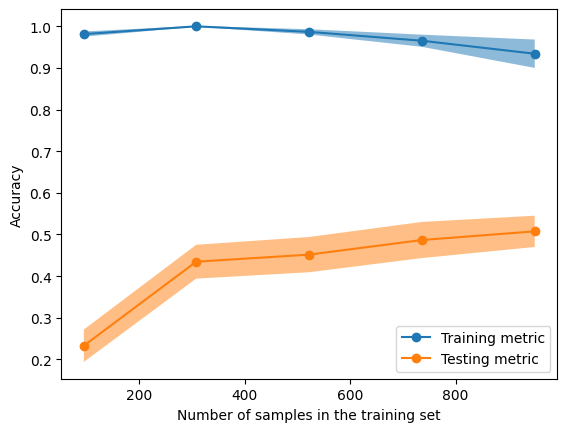

In [10]:
display_hue = LearningCurveDisplay.from_estimator(model_SVM_hue, X_train_h, y_train,
                                              verbose=1, random_state=0, score_name="Accuracy",
                                              score_type="both", line_kw={"marker": "o"}, 
                                              std_display_style="fill_between", cv=10)

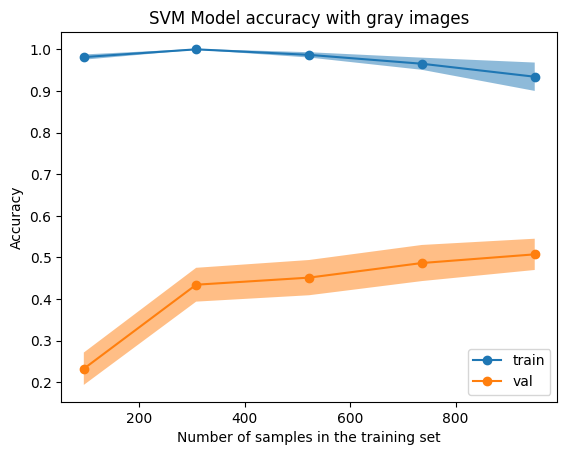

In [14]:
fig, ax = plt.subplots()
lc = LearningCurveDisplay(train_sizes=display_hue.train_sizes, train_scores=display_hue.train_scores,
                    test_scores=display_hue.test_scores, score_name="Accuracy")
lc.plot(score_type="both", line_kw={"marker": "o"}, std_display_style="fill_between", ax=ax)
ax.legend(["train","val"])
ax.set_title("SVM Model accuracy with gray images")
fig.savefig("SVM_gray_accuracy.png")